<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%94%A5%EB%9F%AC%EB%8B%9D_6%EC%A1%B0_%EC%BD%94%EB%93%9C%ED%86%B5%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
crawl = pd.read_csv("/content/drive/MyDrive/Data/Crawl_final.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data/Crawl_final.csv'

# Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [ ]:
crawl.drop_duplicates(inplace=True)
crawl.drop(columns=['Tweet ID', 'URL'],axis=1,inplace=True)
crawl = crawl[crawl['Content'].notnull()]
crawl['Date'] = pd.to_datetime(crawl['Date'], errors='coerce').dt.floor('D')

In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URL Ï†úÍ±∞
    text = re.sub(r"@\w+|#\w+", "", text)                # Î©òÏÖò, Ìï¥ÏãúÌÉúÍ∑∏ Ï†úÍ±∞
    text = re.sub(r"[^\uAC00-\uD7A3a-zA-Z0-9\s]", "", text)  # ÌïúÍ∏Ä, ÏòÅÎ¨∏, Ïà´Ïûê, Í≥µÎ∞±Îßå ÎÇ®Í∏∞Í∏∞
    text = re.sub(r"\s+", " ", text).strip()             # Ï§ëÎ≥µ Í≥µÎ∞± Ï†úÍ±∞
    return text


crawl['clean_text'] = crawl['Content'].apply(clean_text)
crawl.head()

| Íµ¨Í∞Ñ                   | Í∏∞Í∞Ñ           |
| -------------------- | ------------ |
| 1. Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ \~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ | 4/5 \~ 5/11  |
| 2. Í≥µÏãù ÏÑ†Í±∞Ïö¥Îèô \~ ÎåÄÏÑ†ÌÜ†Î°†   | 5/12 \~ 5/26 |
| 3. ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ \~ Î≥∏Ìà¨Ìëú Ìè¨Ìï® | 5/27 \~ 6/3  |
| 4. Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ            | 6/4 Ïù¥ÌõÑ       |


In [ ]:
def assign_period(date):
    if date <= pd.to_datetime('2025-05-11'):
        return 'Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ'
    elif date <= pd.to_datetime('2025-05-26'):
        return 'ÏÑ†Í±∞Ïö¥Îèô ~ ÎåÄÏÑ†ÌÜ†Î°†'
    elif date <= pd.to_datetime('2025-06-02'):
        return 'ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ ~ Î≥∏Ìà¨Ìëú'
    else:
        return 'Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ'

crawl['period'] = crawl['Date'].apply(assign_period)

In [ ]:
crawl = crawl[crawl['clean_text'].apply(lambda x: isinstance(x, str) and x.strip() != '')].copy() # Í≥µÎ∞± Ï†úÍ±∞

In [ ]:
crawl.sort_values(by='Date',inplace=True)

In [ ]:
keywords = ['Ïù¥Ïû¨Î™Ö', 'ÎØºÏ£ºÎãπ', 'ÎÇ¥ÎûÄÏ≤ôÍ≤∞', 'ÎÇ¥ÎûÄ Ï≤ôÍ≤∞', 'Ï∞¢Ïû¨Î™Ö']
# ÌïòÎÇòÎùºÎèÑ Ìè¨Ìï®Îêú Í≤ΩÏö∞ True
crawl['has_keyword'] = crawl['Content'].apply(
    lambda x: any(kw in str(x) for kw in keywords)
)
crawl_final = crawl[crawl['has_keyword']]
crawl_final.drop(columns=['has_keyword'],inplace=True)

In [ ]:
crawl_final.to_csv("X_crawling.csv",index=False)

# Vader

In [1]:
crawl_vader = crawl[crawl['has_keyword']]

NameError: name 'crawl' is not defined

In [ ]:
crawl_vader

Content  Likes  Retweets  \
819    @Dokaijija ÏòÅÏàòÌöåÎã¥  Îòê ÏöîÏ≤≠Ìï†ÎìØ \nÏ™ºÏûñÌïú ÎÜà Ïù¥Ïû¨Î™Ö „Öã„Öã„Öã„Öã„Öã\n\nÍ≥º...      0         0   
818    Ïù¥ ÏÇ¨ÎûåÎì§Ïù¥ Ï†ïÏ≤≠Îûò ÎÑàÎ¨¥ Î¨¥ÏãúÌï®. Î¨¥Î†§ ÎØ∏ÎåÄÏÇ¨Í¥Ä ÌÖåÎü¨ÌñàÏóàÏùå. Ìè≠Î†•Ï†ÅÏù∏ ÏÑ±Ìñ•ÏùÄ Ïù¥Ïû¨Î™Ö...      7         4   
820    @Raoulian @ikeasajima Í∑∏Ïµ∏ ÌÉÑÌïµ ÏÑ†Í≥† "ÌõÑ"ÎãàÍπå... Ïù¥Ïû¨Î™ÖÏù¥ÎÉê ...      1         0   
825    Í±∞ÏßìÎßêÎ°ú ÎãπÏÑ†Îêú ÏûêÎäî Ïò§ÌûàÎ†§ Ïú§ÏÑùÏó¥!! \nÏñ¥Ïù¥ÏóÜÎäî Ï∞êÎ≥¥Ïàò Ï†ïÍ∑úÏû¨Ïùò Ìï≠Î≥Ä Ïôú Ïù¥Ïû¨Î™Ö...      0         0   
816    Ïù¥Ïû¨Î™ÖÏù¥ÎùºÎäî ÏÇ¨ÎûåÏóê ÎåÄÌï¥ ÏµúÍ∑º ÏùºÎÖÑÍ∞Ñ ÏßÄÏºúÎ≥∏ Í≤∞Í≥º ÏßÄÏßÄÎ∞õÏùÑÎßå ÌïòÎã§Îäî Í≤∞Î°†\nÍ∑∏Í∞Ñ Î™∞...      0         0   
...                                                  ...    ...       ...   
47110  ÏïÑÍ∑ºÎç∞ÏïÑÏßÅ Ïù¥Ïû¨Î™ÖÎåÄÌÜµÎ†πÏù¥ÎûÄ Îã®Ïñ¥Í∞Ä ÏïàÏùµÏàôÌï®\nÏµúÏÜå ÏßÄÎÇúÎåÄÏÑ†ÎïåÎ∂ÄÌÑ∞ Í≥ÑÏÜç Î¥êÏò§Îçò Ï†ïÏπòÏù∏...      1         0   
47109                          Ìä∏ÎüºÌîÑÍ∞Ä Ïù¥Ïû¨Î™Ö Í∞úÎ¨¥ÏãúÌïòÎãàÍπå ÏõÉÍ∏∞Í∏¥ ÌïòÎÑ§ „Öã„Öã     15         0   
47121  Î£®Î¶¨Ïõπ ÎåÄÍ∞ÄÎ¶¨ Íπ®ÏßÑ Ï¢åÎ¶¨ÏõπÏù¥ÏóàÎçò Í±∏Î°ú Í∏∞ÏñµÌïòÎäîÎç∞ Í∑∏Í∞Ñ Î∂ÑÏúÑÍ∏∞Í∞Ä Î∞îÎÄåÏóàÎÇò.\n\nÌïòÍ∏¥...     14         5   
47283  Ïñ¥Ï†úÍπåÏßÄ ÌååÎûÄ Ïò∑ ÏûÖÍ≥† Ïù¥Ïû¨Î™Ö Ïó∞Ìò∏ÌïòÎäî ÏòÅÏÉÅ ÏûêÎûëÏä§ÎüΩÍ≤å Í≤åÏãúÌïòÎçò Î∂ÑÍªòÏÑú ÏûêÎãπ ÏùòÏõêÏù¥...     91        47   
47640  6/7 ÌÜ†ÏöîÏùº Ïò§ÌõÑ 2Ïãú\nÏÑúÏ¥àÏó≠ 7Î≤àÏ∂úÍµ¨ Ï§ëÏïôÏßÄÍ≤Ä ÏÑúÎ¨∏\nÎ≤îÏ£ÑÏûê Ïù¥Ïû¨Î™ÖÏùò ÌååÍ∏∞ÌôòÏÜ°...      5         0   

       Replies  Quotes  Views       Date  \
819          0       0     23 2025-04-03   
818          0       0   1307 2025-04-03   
820          1       0    118 2025-04-03   
825          0       0     50 2025-04-03   
816          0       0     14 2025-04-03   
...        ...     ...    ...        ...   
47110        0       0     27 2025-06-04   
47109        0       0    252 2025-06-04   
47121        1       0    847 2025-06-04   
47283        1       8  13921 2025-06-04   
47640        0       0     57 2025-06-04   

                                              clean_text            period  \
819         ÏòÅÏàòÌöåÎã¥ Îòê ÏöîÏ≤≠Ìï†ÎìØ Ï™ºÏûñÌïú ÎÜà Ïù¥Ïû¨Î™Ö Í≥ºÏó∞ ÏÑùÏó¥Ïù¥Îäî ÌîºÏùòÏûê Ïù¥Ïû¨Î™ÖÏùÑ ÎßåÎÇ†Í≤ÉÏù∏Í∞Ä  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
818    Ïù¥ ÏÇ¨ÎûåÎì§Ïù¥ Ï†ïÏ≤≠Îûò ÎÑàÎ¨¥ Î¨¥ÏãúÌï® Î¨¥Î†§ ÎØ∏ÎåÄÏÇ¨Í¥Ä ÌÖåÎü¨ÌñàÏóàÏùå Ìè≠Î†•Ï†ÅÏù∏ ÏÑ±Ìñ•ÏùÄ Ïù¥Ïû¨Î™ÖÏù¥Îûë...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
820                   Í∑∏Ïµ∏ ÌÉÑÌïµ ÏÑ†Í≥† ÌõÑÎãàÍπå Ïù¥Ïû¨Î™ÖÏù¥ÎÉê Î∞òÏù¥Ïû¨Î™ÖÏù¥ÎÉê Í∞ñÍ≥† ÌÜ†Î°†ÌïòÍ≤†Ï£†  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
825        Í±∞ÏßìÎßêÎ°ú ÎãπÏÑ†Îêú ÏûêÎäî Ïò§ÌûàÎ†§ Ïú§ÏÑùÏó¥ Ïñ¥Ïù¥ÏóÜÎäî Ï∞êÎ≥¥Ïàò Ï†ïÍ∑úÏû¨Ïùò Ìï≠Î≥Ä Ïôú Ïù¥Ïû¨Î™Ö Ï∂úÏ≤ò  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
816    Ïù¥Ïû¨Î™ÖÏù¥ÎùºÎäî ÏÇ¨ÎûåÏóê ÎåÄÌï¥ ÏµúÍ∑º ÏùºÎÖÑÍ∞Ñ ÏßÄÏºúÎ≥∏ Í≤∞Í≥º ÏßÄÏßÄÎ∞õÏùÑÎßå ÌïòÎã§Îäî Í≤∞Î°† Í∑∏Í∞Ñ Î™∞Îùº...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
...                                                  ...               ...   
47110  ÏïÑÍ∑ºÎç∞ÏïÑÏßÅ Ïù¥Ïû¨Î™ÖÎåÄÌÜµÎ†πÏù¥ÎûÄ Îã®Ïñ¥Í∞Ä ÏïàÏùµÏàôÌï® ÏµúÏÜå ÏßÄÎÇúÎåÄÏÑ†ÎïåÎ∂ÄÌÑ∞ Í≥ÑÏÜç Î¥êÏò§Îçò Ï†ïÏπòÏù∏Ïù¥...            Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ   
47109                             Ìä∏ÎüºÌîÑÍ∞Ä Ïù¥Ïû¨Î™Ö Í∞úÎ¨¥ÏãúÌïòÎãàÍπå ÏõÉÍ∏∞Í∏¥ ÌïòÎÑ§            Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ   
47121  Î£®Î¶¨Ïõπ ÎåÄÍ∞ÄÎ¶¨ Íπ®ÏßÑ Ï¢åÎ¶¨ÏõπÏù¥ÏóàÎçò Í±∏Î°ú Í∏∞ÏñµÌïòÎäîÎç∞ Í∑∏Í∞Ñ Î∂ÑÏúÑÍ∏∞Í∞Ä Î∞îÎÄåÏóàÎÇò ÌïòÍ∏¥ Ïù¥Ïû¨Î™Ö...            Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ   
47283  Ïñ¥Ï†úÍπåÏßÄ ÌååÎûÄ Ïò∑ ÏûÖÍ≥† Ïù¥Ïû¨Î™Ö Ïó∞Ìò∏ÌïòÎäî ÏòÅÏÉÅ ÏûêÎûëÏä§ÎüΩÍ≤å Í≤åÏãúÌïòÎçò Î∂ÑÍªòÏÑú ÏûêÎãπ ÏùòÏõêÏù¥...            Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ   
47640  67 ÌÜ†ÏöîÏùº Ïò§ÌõÑ 2Ïãú ÏÑúÏ¥àÏó≠ 7Î≤àÏ∂úÍµ¨ Ï§ëÏïôÏßÄÍ≤Ä ÏÑúÎ¨∏ Î≤îÏ£ÑÏûê Ïù¥Ïû¨Î™ÖÏùò ÌååÍ∏∞ÌôòÏÜ°Ïã¨ ÏÜçÍ∞úÌïòÎùº            Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ   

       has_keyword  
819           True  
818           True  
820           True  
825           True  
816           True  
...            ...  
47110         True  
47109         True  
47121         True  
47283         True  
47640         True  

[35523 rows

In [ ]:
crawl_vader.drop(columns=['has_keyword'],inplace=True)

In [ ]:
crawl_vader['period'].value_counts()

period
Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ    22498
ÏÑ†Í±∞Ïö¥Îèô ~ ÎåÄÏÑ†ÌÜ†Î°†          8138
ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ ~ Î≥∏Ìà¨Ìëú        3658
Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ               1229
Name: count, dtype: int64

In [ ]:
# vaderSentiment Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
!pip install vaderSentiment

# googletrans Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (ÌäπÏ†ï Î≤ÑÏ†Ñ)
!pip install googletrans==4.0.0-rc1

# Í∏∞ÌÉÄ ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎì§
!pip install pandas numpy matplotlib seaborn


In [ ]:
# ===============================
# 1. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
# ===============================

# Í∏∞Ï°¥ Î¨∏Ï†úÍ∞Ä ÏûàÎäî Ìå®ÌÇ§ÏßÄ Ï†úÍ±∞ ÌõÑ ÏïàÏ†ïÏ†ÅÏù∏ Î≤ÑÏ†Ñ ÏÑ§Ïπò
!pip uninstall googletrans -y
!pip install deep-translator==1.11.4 vaderSentiment==3.3.2 pandas numpy

import pandas as pd
import numpy as np
import time
import os
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# Google Drive ÎßàÏö¥Ìä∏
try:
    drive.mount('/content/drive')
    print("‚úÖ Google Drive ÎßàÏö¥Ìä∏ ÏôÑÎ£å")
except:
    print("‚ö†Ô∏è Google Drive Ïù¥ÎØ∏ ÎßàÏö¥Ìä∏Îê®")

# VADER Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
analyzer = SentimentIntensityAnalyzer()
print("‚úÖ VADER Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å")


In [ ]:
# ===============================
# 2. ÏïàÏ†ïÏ†ÅÏù∏ Î≤àÏó≠ Ìï®Ïàò Ï†ïÏùò
# ===============================

def translate_text_robust(text, max_retries=3):
    """
    deep-translatorÎ•º ÏÇ¨Ïö©Ìïú ÏïàÏ†ïÏ†ÅÏù∏ Î≤àÏó≠ Ìï®Ïàò
    """
    if not text or pd.isna(text) or str(text).strip() == '':
        return "empty_text"

    # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
    text = str(text).strip()
    if len(text) > 400:
        text = text[:400]

    # Î≤àÏó≠ ÏãúÎèÑ
    for attempt in range(max_retries):
        try:
            translator = GoogleTranslator(source='ko', target='en')
            result = translator.translate(text)

            if result and str(result).strip():
                return str(result)
            else:
                if attempt == max_retries - 1:
                    return f"no_translation_{text[:30]}"
                time.sleep(1)

        except Exception as e:
            if attempt == max_retries - 1:
                print(f"Î≤àÏó≠ Ïã§Ìå®: {text[:30]}... Ïò§Î•ò: {str(e)[:50]}")
                return f"translation_failed_{text[:30]}"
            else:
                time.sleep(2 ** attempt)
                continue

    return f"unknown_error_{text[:30]}"

In [ ]:
# ===============================
# 3. ÌïµÏã¨ VADER Í∞êÏÑ±Î∂ÑÏÑù Ìï®ÏàòÎì§ Ï†ïÏùò
# ===============================

def analyze_sentiment_vader_robust(text):
    """
    Í∞ïÌôîÎêú Ïò§Î•ò Ï≤òÎ¶¨Í∞Ä Ìè¨Ìï®Îêú VADER Í∞êÏÑ±Î∂ÑÏÑù Ìï®Ïàò
    """
    try:
        # ÏûÖÎ†• Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
        if pd.isna(text) or str(text).strip() == '':
            return ['empty_input', 0.0, 1.0, 0.0, 0.0, 'neutral']

        text = str(text).strip()

        # Î≤àÏó≠ ÏàòÌñâ
        translated = translate_text_robust(text)

        # Î≤àÏó≠ Ïã§Ìå® Ï≤òÎ¶¨
        if translated.startswith(('empty_text', 'no_translation', 'translation_failed', 'unknown_error')):
            return [translated, 0.0, 1.0, 0.0, 0.0, 'neutral']

        # VADER Í∞êÏÑ±Î∂ÑÏÑù ÏàòÌñâ
        scores = analyzer.polarity_scores(translated)

        # Ï†êÏàò Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
        required_keys = ['neg', 'neu', 'pos', 'compound']
        if not all(key in scores and isinstance(scores[key], (int, float)) for key in required_keys):
            return [translated, 0.0, 1.0, 0.0, 0.0, 'neutral']

        # Í∞êÏÑ± Î∂ÑÎ•ò
        compound = float(scores['compound'])
        if compound >= 0.05:
            sentiment_label = 'positive'
        elif compound <= -0.05:
            sentiment_label = 'negative'
        else:
            sentiment_label = 'neutral'

        # Í≤∞Í≥º Î∞òÌôò
        return [
            translated,
            float(scores['neg']),
            float(scores['neu']),
            float(scores['pos']),
            compound,
            sentiment_label
        ]

    except Exception as e:
        error_msg = f"analysis_error_{str(e)[:30]}"
        print(f"Í∞êÏÑ±Î∂ÑÏÑù Ïò§Î•ò: {str(text)[:30]}... Ïò§Î•ò: {e}")
        return [error_msg, 0.0, 1.0, 0.0, 0.0, 'neutral']

def save_intermediate_results_safe(df, batch_num):
    """
    Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ùÏù¥ Ìè¨Ìï®Îêú ÏïàÏ†ÑÌïú Ï§ëÍ∞Ñ Ï†ÄÏû• Ìï®Ïàò
    """
    try:
        # Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
        save_dir = '/content/drive/MyDrive/Data'
        os.makedirs(save_dir, exist_ok=True)

        # Îç∞Ïù¥ÌÑ∞ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
        if df is None or len(df) == 0:
            print(f"‚ö†Ô∏è Î∞∞Ïπò {batch_num}: Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùå")
            return False

        # VADER Î∂ÑÏÑù Í≤∞Í≥º Ïú†Ìö®ÏÑ± ÌôïÏù∏
        if 'sentiment_label' in df.columns:
            valid_sentiments = df['sentiment_label'].isin(['positive', 'negative', 'neutral']).sum()
            total_rows = len(df)
            valid_rate = (valid_sentiments / total_rows) * 100 if total_rows > 0 else 0

            print(f"   Ïú†Ìö®Ìïú Í∞êÏÑ±Î∂ÑÏÑù Í≤∞Í≥º: {valid_sentiments}/{total_rows} ({valid_rate:.1f}%)")

        # ÌååÏùº Ï†ÄÏû•
        timestamp = time.strftime("%Y%m%d_%H%M%S")
        filename = f'{save_dir}/vader_verified_batch_{batch_num}_{timestamp}.csv'

        df.to_csv(filename, index=False, encoding='utf-8-sig')

        # Ï†ÄÏû• Í≤ÄÏ¶ù
        verification_df = pd.read_csv(filename)
        if len(verification_df) == len(df):
            print(f"   ‚úÖ Ï§ëÍ∞Ñ Ï†ÄÏû• ÏÑ±Í≥µ: {filename}")
            return True
        else:
            print(f"   ‚ùå Ï†ÄÏû• Í≤ÄÏ¶ù Ïã§Ìå®")
            return False

    except Exception as e:
        print(f"   ‚ùå Ï§ëÍ∞Ñ Ï†ÄÏû• Ïã§Ìå®: {e}")
        return False

def process_vader_complete_fixed(df, batch_size=500, target_column='clean_text'):
    """
    ÏôÑÏ†ÑÌïú VADER Í∞êÏÑ±Î∂ÑÏÑù Ï≤òÎ¶¨ Ìï®Ïàò
    """
    total_rows = len(df)

    print(f"=== VADER Í∞êÏÑ±Î∂ÑÏÑù ÏãúÏûë ===")
    print(f"Ï¥ù {total_rows}Í∞ú Îç∞Ïù¥ÌÑ∞Î•º {batch_size}Í∞úÏî© Î∞∞Ïπò Ï≤òÎ¶¨Ìï©ÎãàÎã§.")
    print(f"ÎåÄÏÉÅ Ïª¨Îüº: {target_column}")

    # ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù
    start_time = time.time()
    all_processed_data = []

    for i in range(0, total_rows, batch_size):
        batch_end = min(i + batch_size, total_rows)
        batch_data = df.iloc[i:batch_end].copy().reset_index(drop=True)

        current_batch = i//batch_size + 1
        print(f"\nÎ∞∞Ïπò {current_batch} Ï≤òÎ¶¨ Ï§ë: {i+1}-{batch_end}Ìñâ")

        # Î∞∞ÏπòÎ≥Ñ VADER Î∂ÑÏÑù ÏàòÌñâ
        batch_results = []
        successful_analyses = 0

        for idx, row in batch_data.iterrows():
            # VADER Î∂ÑÏÑù Ïã§Ìñâ
            analysis_result = analyze_sentiment_vader_robust(row[target_column])
            batch_results.append(analysis_result)

            # ÏÑ±Í≥µ Ïó¨Î∂Ä ÌôïÏù∏
            if (len(analysis_result) == 6 and
                analysis_result[5] in ['positive', 'negative', 'neutral'] and
                not str(analysis_result[0]).startswith(('analysis_error', 'translation_failed'))):
                successful_analyses += 1

            # API Ï†úÌïú Î∞©ÏßÄ
            time.sleep(0.03)

        # Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
        vader_columns = ['translated_text', 'neg_score', 'neu_score',
                        'pos_score', 'compound_score', 'sentiment_label']

        vader_results_df = pd.DataFrame(batch_results, columns=vader_columns)

        # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î∂ÑÏÑù Í≤∞Í≥º Í≤∞Ìï©
        batch_combined = pd.concat([batch_data, vader_results_df], axis=1)
        all_processed_data.append(batch_combined)

        # Î∞∞Ïπò ÏÑ±Í≥µÎ•† Ï∂úÎ†•
        batch_success_rate = (successful_analyses / len(batch_data)) * 100
        print(f"   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: {batch_success_rate:.1f}% ({successful_analyses}/{len(batch_data)})")

        # Ï§ëÍ∞Ñ Ï†ÄÏû• (3Î∞∞ÏπòÎßàÎã§)
        if current_batch % 3 == 0:
            temp_combined = pd.concat(all_processed_data, ignore_index=True)
            save_intermediate_results_safe(temp_combined, current_batch)

        # ÏßÑÌñâÎ•† Î∞è ÏòàÏÉÅ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
        progress = (batch_end / total_rows) * 100
        elapsed_time = (time.time() - start_time) / 60

        if progress > 0:
            estimated_total_time = elapsed_time / (progress / 100)
            remaining_time = estimated_total_time - elapsed_time
            print(f"   ÏßÑÌñâÎ•†: {progress:.1f}% | Í≤ΩÍ≥º: {elapsed_time:.1f}Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: {remaining_time:.1f}Î∂Ñ")

        # Î∞∞Ïπò Í∞Ñ ÎåÄÍ∏∞
        time.sleep(0.5)

    # ÏµúÏ¢Ö Í≤∞Í≥º Î≥ëÌï©
    if all_processed_data:
        final_result = pd.concat(all_processed_data, ignore_index=True)

        # ÏµúÏ¢Ö ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        total_time = (time.time() - start_time) / 60
        if 'sentiment_label' in final_result.columns:
            successful_total = final_result['sentiment_label'].isin(['positive', 'negative', 'neutral']).sum()
            overall_success_rate = (successful_total / total_rows) * 100

            print(f"\n=== ÏµúÏ¢Ö Î∂ÑÏÑù ÏôÑÎ£å ===")
            print(f"Ï¥ù ÏÜåÏöîÏãúÍ∞Ñ: {total_time:.1f}Î∂Ñ")
            print(f"Ï†ÑÏ≤¥ ÏÑ±Í≥µÎ•†: {overall_success_rate:.1f}% ({successful_total}/{total_rows})")

            # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•
            if successful_total > 0:
                timestamp = time.strftime("%Y%m%d_%H%M%S")
                final_filename = f'/content/drive/MyDrive/Data/vader_final_complete_{timestamp}.csv'
                final_result.to_csv(final_filename, index=False, encoding='utf-8-sig')
                print(f"‚úÖ ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•: {final_filename}")

                return final_result
            else:
                print("‚ùå Ïú†Ìö®Ìïú Î∂ÑÏÑù Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
                return None
        else:
            print("‚ùå sentiment_label Ïª¨ÎüºÏù¥ ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
            return None
    else:
        print("‚ùå Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        return None

print("‚úÖ Î™®Îì† VADER Î∂ÑÏÑù Ìï®ÏàòÍ∞Ä Ï†ïÏùòÎêòÏóàÏäµÎãàÎã§.")

In [ ]:
# ===============================
# 4. ÌååÏùº Ï†ÄÏû• Í∏∞Îä• ÌÖåÏä§Ìä∏
# ===============================

def test_file_saving_functionality():
    """
    ÌååÏùº Ï†ÄÏû• Í∏∞Îä•Ïùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÌÖåÏä§Ìä∏ Ìï®Ïàò
    """
    print("=== ÌååÏùº Ï†ÄÏû• Í∏∞Îä• ÌÖåÏä§Ìä∏ ÏãúÏûë ===")

    # Í∏∞Î≥∏ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± Î∞è ÌôïÏù∏
    save_dir = '/content/drive/MyDrive/Data'
    try:
        os.makedirs(save_dir, exist_ok=True)
        print(f"‚úÖ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±/ÌôïÏù∏ ÏôÑÎ£å: {save_dir}")
    except Exception as e:
        print(f"‚ùå ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± Ïã§Ìå®: {e}")
        return False

    # ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    test_data = pd.DataFrame({
        'Content': [
            'Ïù¥Ïû¨Î™Ö ÌõÑÎ≥¥Î•º ÏßÄÏßÄÌï©ÎãàÎã§',
            'Ï†ïÏπò ÏÉÅÌô©Ïù¥ Ïã§ÎßùÏä§ÎüΩÎÑ§Ïöî',
            'Ï§ëÎ¶ΩÏ†ÅÏù∏ ÏûÖÏû•ÏûÖÎãàÎã§'
        ],
        'Likes': [10, 2, 0],
        'Date': ['2025-04-10', '2025-04-11', '2025-04-12'],
        'period': ['Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ'] * 3
    })

    print(f"‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å: {len(test_data)}Í∞ú Ìñâ")

    # Î≤àÏó≠ Î∞è VADER ÌÖåÏä§Ìä∏
    test_results = []
    for idx, row in test_data.iterrows():
        result = analyze_sentiment_vader_robust(row['Content'])
        test_results.append(result)
        print(f"ÌÖåÏä§Ìä∏ {idx+1}: {result[5]} (Ï†êÏàò: {result[4]})")

    # ÌÖåÏä§Ìä∏ Í≤∞Í≥º Í≤ÄÏ¶ù
    successful_tests = sum(1 for r in test_results if r[5] in ['positive', 'negative', 'neutral'])
    success_rate = (successful_tests / len(test_results)) * 100

    print(f"ÌÖåÏä§Ìä∏ ÏÑ±Í≥µÎ•†: {success_rate:.1f}%")
    return success_rate >= 80

# ÌååÏùº Ï†ÄÏû• ÌÖåÏä§Ìä∏ Ïã§Ìñâ
test_success = test_file_saving_functionality()

if test_success:
    print(f"\nüéâ Î™®Îì† ÌÖåÏä§Ìä∏Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
else:
    print(f"\n‚ö†Ô∏è ÌÖåÏä§Ìä∏ÏóêÏÑú Î¨∏Ï†úÍ∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.")


=== ÌååÏùº Ï†ÄÏû• Í∏∞Îä• ÌÖåÏä§Ìä∏ ÏãúÏûë ===
‚úÖ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±/ÌôïÏù∏ ÏôÑÎ£å: /content/drive/MyDrive/Data
‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å: 3Í∞ú Ìñâ
ÌÖåÏä§Ìä∏ 1: positive (Ï†êÏàò: 0.4019)
ÌÖåÏä§Ìä∏ 2: negative (Ï†êÏàò: -0.4939)
ÌÖåÏä§Ìä∏ 3: neutral (Ï†êÏàò: 0.0)
ÌÖåÏä§Ìä∏ ÏÑ±Í≥µÎ•†: 100.0%

üéâ Î™®Îì† ÌÖåÏä§Ìä∏Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!


In [ ]:
def test_vader_result_saving_fixed():
    """
    Ïò§Î•òÍ∞Ä ÏàòÏ†ïÎêú VADER Í≤∞Í≥º Ï†ÄÏû• ÏãúÌóò Ìï®Ïàò
    """
    print("=== ÏàòÏ†ïÎêú VADER Î∂ÑÏÑù Í≤∞Í≥º ÌôïÏù∏ ===")

    # Ï†ÄÏû•Îêú ÌååÏùº ÏùΩÍ∏∞
    saved_file = '/content/drive/MyDrive/Data/vader_test_result_20250617_112315.csv'

    try:
        df = pd.read_csv(saved_file)
        print(f"‚úÖ Ï†ÄÏû•Îêú ÌååÏùº ÏùΩÍ∏∞ ÏÑ±Í≥µ: {len(df)}Ìñâ")

        # ÏàòÏ†ïÎêú Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
        print(f"\nüìä Î∂ÑÏÑù Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞:")

        for idx, row in df.iterrows():
            text = row['Content']
            sentiment = row['sentiment_label']
            score = row['compound_score']

            print(f"  {idx+1}. {text[:30]}...")
            print(f"     ‚Üí {sentiment} (Ï†êÏàò: {score:.3f})")

        # Í∞êÏÑ± Î∂ÑÌè¨ ÌôïÏù∏
        sentiment_counts = df['sentiment_label'].value_counts()
        print(f"\nüìà Í∞êÏÑ± Î∂ÑÌè¨:")
        for sentiment, count in sentiment_counts.items():
            print(f"  - {sentiment}: {count}Í∞ú")

        # ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ
        print(f"\nüìä ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ:")
        print(f"  - ÌèâÍ∑† compound Ï†êÏàò: {df['compound_score'].mean():.3f}")
        print(f"  - ÌëúÏ§ÄÌé∏Ï∞®: {df['compound_score'].std():.3f}")
        print(f"  - ÏµúÏÜüÍ∞í: {df['compound_score'].min():.3f}")
        print(f"  - ÏµúÎåìÍ∞í: {df['compound_score'].max():.3f}")

        return True

    except Exception as e:
        print(f"‚ùå ÌååÏùº ÏùΩÍ∏∞ Ïã§Ìå®: {e}")
        return False

# ÏàòÏ†ïÎêú Ìï®Ïàò Ïã§Ìñâ
test_vader_result_saving_fixed()


=== ÏàòÏ†ïÎêú VADER Î∂ÑÏÑù Í≤∞Í≥º ÌôïÏù∏ ===
‚úÖ Ï†ÄÏû•Îêú ÌååÏùº ÏùΩÍ∏∞ ÏÑ±Í≥µ: 5Ìñâ

üìä Î∂ÑÏÑù Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞:
  1. Ïù¥Ïû¨Î™Ö ÌõÑÎ≥¥Î•º Ï†ïÎßê ÏßÄÏßÄÌï©ÎãàÎã§...
     ‚Üí positive (Ï†êÏàò: 0.458)
  2. Ï†ïÏπò ÏÉÅÌô©Ïù¥ Îß§Ïö∞ Ïã§ÎßùÏä§ÎüΩÎÑ§Ïöî...
     ‚Üí negative (Ï†êÏàò: -0.541)
  3. ÏÑ†Í±∞Ïóê ÎåÄÌï¥ Ï§ëÎ¶ΩÏ†ÅÏù∏ ÏûÖÏû•ÏûÖÎãàÎã§...
     ‚Üí neutral (Ï†êÏàò: 0.000)
  4. Í≤ΩÏ†ú Ï†ïÏ±ÖÏù¥ ÌõåÎ•≠ÌïòÎã§Í≥† ÏÉùÍ∞ÅÌï¥Ïöî...
     ‚Üí positive (Ï†êÏàò: 0.625)
  5. Ïù¥Îü∞ ÏÉÅÌô©Ïù¥ Ï†ïÎßê Ïö∞Î†§Ïä§ÎüΩÏäµÎãàÎã§...
     ‚Üí negative (Ï†êÏàò: -0.360)

üìà Í∞êÏÑ± Î∂ÑÌè¨:
  - positive: 2Í∞ú
  - negative: 2Í∞ú
  - neutral: 1Í∞ú

üìä ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ:
  - ÌèâÍ∑† compound Ï†êÏàò: 0.036
  - ÌëúÏ§ÄÌé∏Ï∞®: 0.504
  - ÏµúÏÜüÍ∞í: -0.541
  - ÏµúÎåìÍ∞í: 0.625


True

In [ ]:
# Ï†ÑÏ≤¥ VADER Í∞êÏÑ±Î∂ÑÏÑù Ïã§Ìñâ
crawl_data = pd.read_csv('/content/crawl_new_final')
result = process_vader_complete_fixed(crawl_data, batch_size=500, target_column='clean_text')

=== VADER Í∞êÏÑ±Î∂ÑÏÑù ÏãúÏûë ===
Ï¥ù 35523Í∞ú Îç∞Ïù¥ÌÑ∞Î•º 500Í∞úÏî© Î∞∞Ïπò Ï≤òÎ¶¨Ìï©ÎãàÎã§.
ÎåÄÏÉÅ Ïª¨Îüº: clean_text

Î∞∞Ïπò 1 Ï≤òÎ¶¨ Ï§ë: 1-500Ìñâ
   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: 100.0% (500/500)
   ÏßÑÌñâÎ•†: 1.4% | Í≤ΩÍ≥º: 1.2Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: 84.9Î∂Ñ

Î∞∞Ïπò 2 Ï≤òÎ¶¨ Ï§ë: 501-1000Ìñâ
   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: 100.0% (500/500)
   ÏßÑÌñâÎ•†: 2.8% | Í≤ΩÍ≥º: 2.3Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: 77.9Î∂Ñ

Î∞∞Ïπò 3 Ï≤òÎ¶¨ Ï§ë: 1001-1500Ìñâ
   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: 100.0% (500/500)
   Ïú†Ìö®Ìïú Í∞êÏÑ±Î∂ÑÏÑù Í≤∞Í≥º: 1500/1500 (100.0%)
   ‚úÖ Ï§ëÍ∞Ñ Ï†ÄÏû• ÏÑ±Í≥µ: /content/drive/MyDrive/Data/vader_verified_batch_3_20250617_113033.csv
   ÏßÑÌñâÎ•†: 4.2% | Í≤ΩÍ≥º: 3.3Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: 74.0Î∂Ñ

Î∞∞Ïπò 4 Ï≤òÎ¶¨ Ï§ë: 1501-2000Ìñâ
   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: 100.0% (500/500)
   ÏßÑÌñâÎ•†: 5.6% | Í≤ΩÍ≥º: 4.3Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: 71.4Î∂Ñ

Î∞∞Ïπò 5 Ï≤òÎ¶¨ Ï§ë: 2001-2500Ìñâ
   Î∞∞Ïπò ÏÑ±Í≥µÎ•†: 100.0% (500/500)
   ÏßÑÌñâÎ•†: 7.0% | Í≤ΩÍ≥º: 5.2Î∂Ñ | ÏòàÏÉÅ ÎÇ®ÏùÄ ÏãúÍ∞Ñ: 69.3Î∂Ñ

Î∞∞Ïπò 6 Ï≤òÎ¶¨ Ï§ë: 2501-

# Pseudo-Labeling

## Ko-Electra
---
* teacher model
* 500Í∞úÏùò ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† 5000Í∞ú psueo-label ÏÉùÏÑ±ÏùÑ ÏúÑÌïú Îã®Í≥Ñ


In [ ]:
mpl = pd.read_csv("/content/drive/MyDrive/Data/mpl/mpl.csv") # ÏßÅÏ†ë ÎùºÎ≤®ÎßÅÌïú 500Í∞ú Îç∞Ïù¥ÌÑ∞
mpl.iloc[165,9] = "Í∏çÏ†ï"

In [ ]:
sdf = pd.read_csv("/content/drive/MyDrive/Data/sample_df.csv") # Ko-Electra ÏÇ¨Ïö©Ìï¥ ÎùºÎ≤®ÎßÅ Ìï¥ÏïºÌïòÎäî 5000Í∞ú Îç∞Ïù¥ÌÑ∞
sdf.drop("Content",axis=1,inplace=True)

In [ ]:
sdf = sdf.rename(columns={'sentence_sentimnet': 'sentence_sentiment'})
sdf.head()

Likes  Retweets  Replies  Quotes  Views        Date  \
0      5         1        0       0     64  2025-04-13   
1      0         0        0       0     79  2025-05-05   
2      0         0        0       0     86  2025-04-29   
3      1         1        0       0     72  2025-04-14   
4    140        60        1       0   2435  2025-04-30   

                                          clean_text            period  \
0  Ï≤òÏùå ÎÇ¥ ÎåìÍ∏ÄÏùò Îã®Ïñ¥Îäî ÏßÄÍ∑πÌûà Ï°∞Ïö©ÌñàÎã§ ÌïòÏßÄÎßå ÎØºÏ£ºÎãπ Ï†ïÏπòÏù∏Îì§Í≥º Í∞úÎî∏Îì§ÏùÑ Í≤™ÏúºÎ©¥ÏÑú ...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
1  Ïôú ÎåÄÎ≤ïÏõê ÌåêÏÇ¨Îì§ÏùÑ ÌÉÑÌïµÌïúÎã§Í≥† ÎÇúÎ¶¨Ïù∏Îç∞ Ïñ¥Ï∞®Ìîº ÎåÄÌÜµÎ†π ÏÑ†Í±∞ÏóêÎäî Î¨∏Ï†úÍ∞Ä ÏóÜÍµ¨Îßå Í¥úÌûà ...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
2  2025ÎÖÑ 4Ïõî 29Ïùº ÌäπÏ†ïÎ≤îÏ£ÑÍ∞ÄÏ§ëÏ≤òÎ≤åÎì±ÏóêÍ¥ÄÌïúÎ≤ïÎ•†ÏúÑÎ∞òÎáåÎ¨º Îì± ÌòêÏùò Ïù¥Ïû¨Î™Ö Ï†Ñ ÎØºÏ£ºÎãπ...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
3  Ï£ºÏúÑÏóê Í∂åÏòÅÍ∏∏Îßå ÎÇ¥Î¶¨ 3Î≤àÏùÑ Ï∞çÏóàÎçò ÏÇ¨ÎûåÎì§Ïù¥ 2012 2022ÎÖÑ ÎåÄÏÑ†ÏóêÏÑ† ÎØºÏ£ºÎãπÌõÑÎ≥¥...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   
4  ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ Ï†ú21ÎåÄ ÎåÄÌÜµÎ†πÏÑ†Í±∞ ÏßÑÏßú ÎåÄÌïúÎØºÍµ≠ Ï§ëÏïôÏÑ†ÎåÄÏúÑÏõêÌöå Ï∂úÎ≤îÏãù ÏßÑÏßú ÎåÄÌïúÎØºÍµ≠ ...  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ   

   sentence_sentiment  target_sentiment  
0                 NaN               NaN  
1                 NaN               NaN  
2                 NaN               NaN  
3                 NaN               NaN  
4                 NaN               NaN

In [ ]:
# =============================================================================
# Chapter 0: mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï© (Î©îÏù∏ ÌååÏù¥ÌîÑÎùºÏù∏ Ïù¥Ï†ÑÏóê Ïã§Ìñâ)
# =============================================================================

def merge_mpl_labels_to_sdf(mpl_df, sdf):
    """mplÏùò ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©

    mplÍ≥º sdfÏùò clean_textÍ∞Ä Í≤πÏπòÎäî Í≤ΩÏö∞ sentence_sentiment, target_sentimentÎ•º Ï±ÑÏõåÎÑ£Ïùå

    Args:
        mpl_df: 490Í∞ú ÎùºÎ≤®ÎßÅÎêú mpl Îç∞Ïù¥ÌÑ∞
        sdf: 5000Í∞ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞

    Returns:
        pd.DataFrame: ÎùºÎ≤®Ïù¥ Î≥ëÌï©Îêú sdf
    """

    log_progress("="*50)
    log_progress("üìã mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï© ÏãúÏûë")
    log_progress("="*50)

    print(f"mpl Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(mpl_df):,}Í∞ú")
    print(f"sdf Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(sdf):,}Í∞ú")

    # Î≥ëÌï© Ï†Ñ ÏÉÅÌÉú ÌôïÏù∏
    before_labeled = (
        sdf['sentence_sentiment'].notna() &
        sdf['target_sentiment'].notna()
    ).sum()

    log_progress(f"Î≥ëÌï© Ï†Ñ sdf ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞: {before_labeled:,}Í∞ú")

    # clean_text Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
    merged_sdf = pd.merge(
        sdf,
        mpl_df[['clean_text', 'sentence_sentiment', 'target_sentiment']],
        on='clean_text',
        how='left',
        suffixes=('', '_mpl')
    )

    # Í∏∞Ï°¥ ÎùºÎ≤®Ïù¥ ÏóÜÏúºÎ©¥ mpl ÎùºÎ≤®Î°ú Ï±ÑÏõÄ
    merged_sdf['sentence_sentiment'] = merged_sdf['sentence_sentiment'].combine_first(merged_sdf['sentence_sentiment_mpl'])
    merged_sdf['target_sentiment'] = merged_sdf['target_sentiment'].combine_first(merged_sdf['target_sentiment_mpl'])

    # ÏûÑÏãú Ïª¨Îüº Ï†úÍ±∞
    merged_sdf = merged_sdf.drop(columns=['sentence_sentiment_mpl', 'target_sentiment_mpl'])

    # Î≥ëÌï© ÌõÑ ÏÉÅÌÉú ÌôïÏù∏
    after_labeled = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    ).sum()

    log_progress(f"Î≥ëÌï© ÌõÑ sdf ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞: {after_labeled:,}Í∞ú")
    log_progress(f"ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú ÎùºÎ≤®: {after_labeled - before_labeled:,}Í∞ú")

    # Î≥ëÌï©Îêú ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏
    if after_labeled > 0:
        log_progress("\nÎ≥ëÌï©Îêú ÎùºÎ≤® Î∂ÑÌè¨:")

        print("  Sentence Sentiment:")
        sentence_dist = merged_sdf['sentence_sentiment'].value_counts()
        for label, count in sentence_dist.items():
            if pd.notna(label):
                print(f"    {label}: {count:,}Í∞ú")

        print("  Target Sentiment:")
        target_dist = merged_sdf['target_sentiment'].value_counts()
        for label, count in target_dist.items():
            if pd.notna(label):
                print(f"    {label}: {count:,}Í∞ú")

    log_progress("‚úÖ mpl ÎùºÎ≤® Î≥ëÌï© ÏôÑÎ£å")

    return merged_sdf

print("‚úÖ Chapter 0: mpl ÎùºÎ≤® Î≥ëÌï© Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

In [ ]:
# =============================================================================
# Chapter 1: ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ (Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Î≤ÑÏ†Ñ)
# =============================================================================

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
import warnings
import os
import gc
import json
import re
from datetime import datetime
from tqdm import tqdm
import random

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î∞è Î°úÍπÖ ÏÑ§Ï†ï
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"


# Ï†ÑÏó≠ ÏÑ§Ï†ï (Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏµúÏ†ÅÌôî)
CONFIG = {
    # Î™®Îç∏ ÏÑ§Ï†ï
    'model_name': "monologg/koelectra-base-v3-discriminator",
    'max_length': 128,

    # ÌõàÎ†® ÏÑ§Ï†ï (Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†)
    'batch_size': 8,         # Target Î™®Îç∏ÏùÄ Îçî ÏûëÏùÄ Î∞∞ÏπòÎ°ú ÏïàÏ†ïÏ†Å ÌïôÏäµ
    'learning_rate': 1e-5,   # Îçî ÎÇÆÏùÄ ÌïôÏäµÎ•†Î°ú ÏÑ∏Î∞ÄÌïú ÌïôÏäµ
    'num_epochs': 15,        # Target Î™®Îç∏ÏùÄ Îçî ÎßéÏùÄ ÏóêÌè¨ÌÅ¨
    'weight_decay': 0.01,

    # Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏÑ§Ï†ï
    'confidence_alpha': 1.0,  # Î∂ÑÎ•ò ÏÜêÏã§ Í∞ÄÏ§ëÏπò
    'confidence_beta': 0.5,   # Ïã†Î¢∞ÎèÑ ÏÜêÏã§ Í∞ÄÏ§ëÏπò
    'target_threshold': 0.7,  # Target Ïã†Î¢∞ÎèÑ Î™©Ìëú

    # Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï
    'targets': ["ÎØºÏ£ºÎãπ", "ÎÇ¥ÎûÄÏ≤ôÍ≤∞", "ÎÇ¥ÎûÄ Ï≤ôÍ≤∞", "Ï∞¢Ïû¨Î™Ö", "Ïù¥Ïû¨Î™Ö"],
    'valid_labels': ["Í∏çÏ†ï", "Ï§ëÎ¶Ω", "Î∂ÄÏ†ï"],
    'label_map': {"Î∂ÄÏ†ï": 0, "Ï§ëÎ¶Ω": 1, "Í∏çÏ†ï": 2},
    'id2label': {0: "Î∂ÄÏ†ï", 1: "Ï§ëÎ¶Ω", 2: "Í∏çÏ†ï"}
}

def log_progress(message, level="INFO"):
    """Î°úÍπÖ Ìï®Ïàò"""
    timestamp = datetime.now().strftime('%H:%M:%S')
    print(f"[{timestamp}] {level}: {message}")

def clear_memory():
    """GPU Î©îÎ™®Î¶¨ Ï†ïÎ¶¨"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("‚úÖ Chapter 1: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 2: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Í≥†Í∏â Ï†ÑÏ≤òÎ¶¨
# =============================================================================

class AdvancedTextPreprocessor:
    """Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Í≥†Í∏â ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨"""

    def __init__(self, targets=CONFIG['targets']):
        self.targets = targets

    def clean_text(self, text):
        """Í∏∞Î≥∏ ÌÖçÏä§Ìä∏ Ï†ïÎ¶¨"""
        if pd.isna(text):
            return ""

        text = str(text)
        # URL Ï†úÍ±∞
        text = re.sub(r'http[s]?://\S+', '', text)
        # RT Ï†úÍ±∞
        text = re.sub(r'RT @\w+:', '', text)
        # Î∞òÎ≥µ Î¨∏Ïûê Ï†ïÎ¶¨
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)
        # Í≥µÎ∞± Ï†ïÎ¶¨
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def enhance_target_with_multiple_strategies(self, text):
        """Îã§Ï§ë Ï†ÑÎûµÏùÑ ÏÇ¨Ïö©Ìïú ÌÉÄÍ≤ü Í∞ïÏ°∞ (ÌäπÏàò ÌÜ†ÌÅ∞ ÏóÜÏùå)"""
        text = self.clean_text(text)

        enhanced_text = text
        target_found = False

        for target in self.targets:
            if target.lower() in text.lower():
                target_found = True

                # Ï†ÑÎûµ 1: ÌÉÄÍ≤ü Î∞òÎ≥µ Í∞ïÏ°∞
                enhanced_text = enhanced_text.replace(target, f"{target} {target}")

                # Ï†ÑÎûµ 2: ÌÉÄÍ≤ü Ï£ºÎ≥Ä Î¨∏Îß• Í∞ïÏ°∞
                words = enhanced_text.split()
                target_positions = [i for i, word in enumerate(words) if target.lower() in word.lower()]

                for pos in target_positions:
                    # ÌÉÄÍ≤ü ÏïûÎí§ 2Îã®Ïñ¥ÍπåÏßÄ Ï§ëÏöîÎèÑ ÌëúÏãú
                    start = max(0, pos - 2)
                    end = min(len(words), pos + 3)

                    for i in range(start, end):
                        if i != pos and i < len(words):
                            # ÏûêÏó∞Ïä§Îü¨Ïö¥ Í∞ïÏ°∞ (ÌäπÏàò ÌÜ†ÌÅ∞ ÎåÄÏã†)
                            words[i] = f"{words[i]} Ï§ëÏöî"

                enhanced_text = " ".join(words)
                break

        return enhanced_text, target_found

    def add_target_context_information(self, text):
        """ÌÉÄÍ≤ü Ïª®ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞Ä"""
        for target in self.targets:
            if target.lower() in text.lower():
                # ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïª®ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
                return f"Ïù¥ Í∏ÄÏùÄ {target}Ïóê ÎåÄÌïú ÏùòÍ≤¨ÏûÖÎãàÎã§. {text}"
        return text

    def apply_position_aware_processing(self, text):
        """ÏúÑÏπò Ïù∏Ïãù Ï≤òÎ¶¨"""
        words = text.split()
        target_positions = []

        for target in self.targets:
            for i, word in enumerate(words):
                if target.lower() in word.lower():
                    target_positions.append(i)

        if target_positions:
            # ÌÉÄÍ≤üÏù¥ Î¨∏Ïû• ÏïûÏ™ΩÏóê ÏûàÏúºÎ©¥ Îçî Í∞ïÏ°∞
            first_target_pos = min(target_positions)
            total_words = len(words)

            if first_target_pos < total_words * 0.3:  # ÏïûÏ™Ω 30% Ïù¥ÎÇ¥
                return f"Ï£ºÏöî ÎåÄÏÉÅÏù¥ ÏïûÏóê Ïñ∏Í∏âÎê®. {text}"
            elif first_target_pos > total_words * 0.7:  # Îí§Ï™Ω 30% Ïù¥ÎÇ¥
                return f"{text} Ï£ºÏöî ÎåÄÏÉÅÏù¥ Îí§Ïóê Ïñ∏Í∏âÎê®."

        return text

    def create_target_focused_text(self, text):
        """ÌÉÄÍ≤ü Ï§ëÏã¨ ÌÖçÏä§Ìä∏ ÏÉùÏÑ± (ÏµúÏ¢Ö ÌÜµÌï© Î≤ÑÏ†Ñ)"""
        # 1Îã®Í≥Ñ: Îã§Ï§ë Ï†ÑÎûµ ÌÉÄÍ≤ü Í∞ïÏ°∞
        enhanced_text, target_found = self.enhance_target_with_multiple_strategies(text)

        if not target_found:
            return enhanced_text

        # 2Îã®Í≥Ñ: Ïª®ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
        context_text = self.add_target_context_information(enhanced_text)

        # 3Îã®Í≥Ñ: ÏúÑÏπò Ïù∏Ïãù Ï≤òÎ¶¨
        final_text = self.apply_position_aware_processing(context_text)

        return final_text

def augment_target_data(texts, labels, targets, augment_ratio=2.0):
    """Target Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌôïÏû•)"""

    log_progress("üîÑ Target Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏãúÏûë")

    augmented_texts = []
    augmented_labels = []

    for text, label in zip(texts, labels):
        # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
        augmented_texts.append(text)
        augmented_labels.append(label)

        # ÌÉÄÍ≤üÏù¥ Ìè¨Ìï®Îêú Í≤ΩÏö∞Îßå Ï¶ùÍ∞ï
        target_found = False
        for target in targets:
            if target.lower() in text.lower():
                target_found = True
                break

        if target_found:
            # Ï¶ùÍ∞ï 1: ÌÉÄÍ≤ü ÏúÑÏπò Î≥ÄÍ≤Ω
            words = text.split()
            for target in targets:
                target_idx = next((i for i, w in enumerate(words) if target.lower() in w.lower()), -1)

                if target_idx != -1 and len(words) > 3:
                    # ÌÉÄÍ≤üÏùÑ Î¨∏Ïû• ÏïûÏúºÎ°ú
                    new_words = [words[target_idx]] + words[:target_idx] + words[target_idx+1:]
                    augmented_texts.append(" ".join(new_words))
                    augmented_labels.append(label)

                    # ÌÉÄÍ≤üÏùÑ Î¨∏Ïû• Îí§Î°ú
                    new_words = words[:target_idx] + words[target_idx+1:] + [words[target_idx]]
                    augmented_texts.append(" ".join(new_words))
                    augmented_labels.append(label)

                    # Ï¶ùÍ∞ï 2: ÌÉÄÍ≤ü Í∞ïÏ°∞ Î≤ÑÏ†Ñ
                    emphasized_text = text.replace(target, f"{target}Ïóê ÎåÄÌïú ÏùòÍ≤¨")
                    augmented_texts.append(emphasized_text)
                    augmented_labels.append(label)

                    # Ï¶ùÍ∞ï 3: ÌÉÄÍ≤ü Î∞òÎ≥µ Î≤ÑÏ†Ñ
                    repeated_text = text.replace(target, f"{target} {target}")
                    augmented_texts.append(repeated_text)
                    augmented_labels.append(label)

                    break  # ÌïòÎÇòÏùò ÌÉÄÍ≤üÎßå Ï≤òÎ¶¨

    log_progress(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å: {len(texts)}Í∞ú ‚Üí {len(augmented_texts)}Í∞ú (√ó{len(augmented_texts)/len(texts):.1f})")

    return augmented_texts, augmented_labels

print("‚úÖ Chapter 2: Í≥†Í∏â Ï†ÑÏ≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 3: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Í≥†Í∏â Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò
# =============================================================================

class ConfidenceAwareLoss(nn.Module):
    """Ïã†Î¢∞ÎèÑ Ïù∏Ïãù ÏÜêÏã§ Ìï®Ïàò"""

    def __init__(self, alpha=1.0, beta=0.5, gamma=0.2):
        super().__init__()
        self.alpha = alpha  # Î∂ÑÎ•ò ÏÜêÏã§ Í∞ÄÏ§ëÏπò
        self.beta = beta    # Ïã†Î¢∞ÎèÑ ÏÜêÏã§ Í∞ÄÏ§ëÏπò
        self.gamma = gamma  # ÏùºÍ¥ÄÏÑ± ÏÜêÏã§ Í∞ÄÏ§ëÏπò

        self.ce_loss = nn.CrossEntropyLoss()
        self.mse_loss = nn.MSELoss()
        self.kl_loss = nn.KLDivLoss(reduction='batchmean')

    def forward(self, logits, labels, confidence_scores, class_weights=None):
        # 1. Í∏∞Î≥∏ Î∂ÑÎ•ò ÏÜêÏã§ (ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©)
        if class_weights is not None:
            ce_loss_fn = nn.CrossEntropyLoss(weight=class_weights)
            classification_loss = ce_loss_fn(logits, labels)
        else:
            classification_loss = self.ce_loss(logits, labels)

        # 2. Ïã†Î¢∞ÎèÑ ÏÜêÏã§ (Ï†ïÎãµÏùº Îïå ÎÜíÏùÄ Ïã†Î¢∞ÎèÑ, Ïò§ÎãµÏùº Îïå ÎÇÆÏùÄ Ïã†Î¢∞ÎèÑ)
        predictions = torch.argmax(logits, dim=-1)
        correct_mask = (predictions == labels).float()

        # Ï†ïÎãµ: 0.8-0.95, Ïò§Îãµ: 0.2-0.4
        target_confidence = correct_mask * (0.8 + torch.rand_like(correct_mask) * 0.15) + \
                          (1 - correct_mask) * (0.2 + torch.rand_like(correct_mask) * 0.2)

        confidence_loss = self.mse_loss(confidence_scores.squeeze(), target_confidence)

        # 3. ÏùºÍ¥ÄÏÑ± ÏÜêÏã§ (ÌôïÎ•† Î∂ÑÌè¨ÏôÄ Ïã†Î¢∞ÎèÑ Í∞Ñ ÏùºÍ¥ÄÏÑ±)
        probs = F.softmax(logits, dim=-1)
        max_probs = torch.max(probs, dim=-1)[0]
        consistency_loss = self.mse_loss(confidence_scores.squeeze(), max_probs)

        # Ï¥ù ÏÜêÏã§
        total_loss = (self.alpha * classification_loss +
                     self.beta * confidence_loss +
                     self.gamma * consistency_loss)

        return total_loss, classification_loss, confidence_loss, consistency_loss

class AdvancedTargetModel(nn.Module):
    """Í≥†Í∏â Target Î™®Îç∏ (Îã§Ï§ë Ïñ¥ÌÖêÏÖò + Ïã†Î¢∞ÎèÑ ÏòàÏ∏°)"""

    def __init__(self, model_name, num_labels=3, hidden_size=768):
        super().__init__()

        # KoELECTRA Î∞±Î≥∏ (Î∂ÑÎ•ò Ìó§Îìú Ï†úÍ±∞)
        self.electra = AutoModelForSequenceClassification.from_pretrained(
            model_name, num_labels=num_labels
        ).electra

        self.hidden_size = hidden_size

        # Îã§Ï§ë Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò
        self.target_attention = nn.MultiheadAttention(
            hidden_size, num_heads=12, dropout=0.1
        )

        self.context_attention = nn.MultiheadAttention(
            hidden_size, num_heads=8, dropout=0.1
        )

        # Í±∞Î¶¨ Í∏∞Î∞ò Í∞ÄÏ§ëÏπò
        self.distance_weight_layer = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )

        # Ïã†Î¢∞ÎèÑ ÏòàÏ∏° ÎÑ§Ìä∏ÏõåÌÅ¨
        self.confidence_network = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )

        # Î∂ÑÎ•ò ÎÑ§Ìä∏ÏõåÌÅ¨ (Îçî ÍπäÍ≥† Î≥µÏû°ÌïòÍ≤å)
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size // 2, num_labels)
        )

    def forward(self, input_ids, attention_mask):
        # ELECTRA Ïù∏ÏΩîÎî©
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # [batch, seq_len, hidden]

        batch_size, seq_len, hidden_dim = hidden_states.shape

        # 1. Target-focused attention
        target_attended, target_weights = self.target_attention(
            hidden_states.transpose(0, 1),  # [seq_len, batch, hidden]
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            key_padding_mask=~attention_mask.bool()
        )
        target_attended = target_attended.transpose(0, 1)  # [batch, seq_len, hidden]

        # 2. Context attention
        context_attended, context_weights = self.context_attention(
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            key_padding_mask=~attention_mask.bool()
        )
        context_attended = context_attended.transpose(0, 1)

        # 3. Distance-based weighting
        distance_weights = self.distance_weight_layer(hidden_states)  # [batch, seq_len, 1]
        distance_weights = distance_weights.squeeze(-1)  # [batch, seq_len]

        # Attention mask Ï†ÅÏö©
        distance_weights = distance_weights * attention_mask.float()
        distance_weights = F.softmax(distance_weights, dim=-1)

        # Í∞ÄÏ§ë ÌèâÍ∑†
        weighted_hidden = (hidden_states * distance_weights.unsqueeze(-1)).sum(dim=1)  # [batch, hidden]

        # 4. ÌëúÌòÑ Í≤∞Ìï©
        # Target attention pooling
        target_pooled = (target_attended * attention_mask.unsqueeze(-1).float()).sum(dim=1) / attention_mask.sum(dim=1, keepdim=True).float()

        # Context attention pooling
        context_pooled = (context_attended * attention_mask.unsqueeze(-1).float()).sum(dim=1) / attention_mask.sum(dim=1, keepdim=True).float()

        # ÏµúÏ¢Ö ÌëúÌòÑ (Îã§Ï§ë ÌëúÌòÑ Í≤∞Ìï©)
        combined_representation = torch.cat([
            target_pooled + weighted_hidden,  # Target + Distance
            context_pooled                    # Context
        ], dim=-1)  # [batch, hidden*2]

        # 5. Ïã†Î¢∞ÎèÑ ÏòàÏ∏°
        confidence_scores = self.confidence_network(combined_representation)

        # 6. Î∂ÑÎ•ò ÏòàÏ∏°
        logits = self.classifier(combined_representation)

        return {
            'logits': logits,
            'confidence': confidence_scores,
            'target_attention_weights': target_weights,
            'context_attention_weights': context_weights,
            'distance_weights': distance_weights
        }

def calculate_class_weights(labels):
    """ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞"""
    unique_labels = np.unique(labels)
    weights = compute_class_weight('balanced', classes=unique_labels, y=labels)

    weight_dict = dict(zip(unique_labels, weights))
    log_progress(f"ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {weight_dict}")

    return torch.tensor(weights, dtype=torch.float)

print("‚úÖ Chapter 3: Í≥†Í∏â Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 4: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Í≥†Í∏â Îç∞Ïù¥ÌÑ∞ÏÖã
# =============================================================================

class AdvancedTargetDataset(Dataset):
    """Í≥†Í∏â Target Îç∞Ïù¥ÌÑ∞ÏÖã (Îã§Ï§ë Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ Ï†ÅÏö©)"""

    def __init__(self, texts, labels, tokenizer, preprocessor, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.preprocessor = preprocessor
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Í≥†Í∏â Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
        enhanced_text = self.preprocessor.create_target_focused_text(text)

        # ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï
        encoding = self.tokenizer(
            enhanced_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long),
            'original_text': text,
            'enhanced_text': enhanced_text
        }

class RegularSentenceDataset(Dataset):
    """ÏùºÎ∞ò Sentence Îç∞Ïù¥ÌÑ∞ÏÖã (Í∏∞Ï°¥ Î∞©Ïãù Ïú†ÏßÄ)"""

    def __init__(self, texts, labels, tokenizer, preprocessor, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.preprocessor = preprocessor
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨Îßå Ï†ÅÏö©
        cleaned_text = self.preprocessor.clean_text(text)

        encoding = self.tokenizer(
            cleaned_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

print("‚úÖ Chapter 4: Í≥†Í∏â Îç∞Ïù¥ÌÑ∞ÏÖã ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 5: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Í≥†Í∏â ÌõàÎ†®
# =============================================================================

def train_advanced_target_model(train_texts, train_labels, val_texts, val_labels):
    """Í≥†Í∏â Target Î™®Îç∏ ÌõàÎ†® (Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏßëÏ§ë)"""

    log_progress("üîÑ Í≥†Í∏â Target Î™®Îç∏ ÌõàÎ†® ÏãúÏûë (Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏßëÏ§ë)")

    # Ï†ÑÏ≤òÎ¶¨Í∏∞
    preprocessor = AdvancedTextPreprocessor()

    # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä (ÌäπÏàò ÌÜ†ÌÅ∞ ÏóÜÏùå)
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['model_name'])

    # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï
    aug_train_texts, aug_train_labels = augment_target_data(
        train_texts, train_labels, CONFIG['targets'], augment_ratio=3.0
    )

    # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
    class_weights = calculate_class_weights(aug_train_labels).to(device)

    # Í≥†Í∏â Î™®Îç∏ ÏÉùÏÑ±
    model = AdvancedTargetModel(CONFIG['model_name']).to(device)

    # Í≥†Í∏â ÏÜêÏã§ Ìï®Ïàò
    criterion = ConfidenceAwareLoss(
        alpha=CONFIG['confidence_alpha'],
        beta=CONFIG['confidence_beta'],
        gamma=0.3
    )

    # ÏòµÌã∞ÎßàÏù¥Ï†Ä (Îçî ÏÑ∏Î∞ÄÌïú ÌïôÏäµ)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=CONFIG['learning_rate'],
        weight_decay=CONFIG['weight_decay'],
        eps=1e-8
    )

    # ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-7
    )

    # Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Î°úÎçî
    train_dataset = AdvancedTargetDataset(
        aug_train_texts, aug_train_labels, tokenizer, preprocessor, CONFIG['max_length']
    )
    val_dataset = AdvancedTargetDataset(
        val_texts, val_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    train_loader = DataLoader(
        train_dataset, batch_size=CONFIG['batch_size'],
        shuffle=True, num_workers=0, pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, batch_size=CONFIG['batch_size'],
        shuffle=False, num_workers=0, pin_memory=True
    )

    # ÌõàÎ†® Ï∂îÏ†Å Î≥ÄÏàò
    train_losses = []
    val_losses = []
    confidence_scores = []
    best_confidence = 0.0
    best_model_state = None

    log_progress(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(aug_train_texts):,}Í∞ú (Ï¶ùÍ∞ï ÌõÑ)")
    log_progress(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: {len(val_texts):,}Í∞ú")
    log_progress(f"Î™©Ìëú Ïã†Î¢∞ÎèÑ: {CONFIG['target_threshold']:.2f}")

    for epoch in range(CONFIG['num_epochs']):
        # ===== ÌõàÎ†® Îã®Í≥Ñ =====
        model.train()
        total_train_loss = 0
        total_class_loss = 0
        total_conf_loss = 0
        total_consistency_loss = 0
        total_confidence = 0
        train_batches = 0

        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1:2d} ÌõàÎ†®")

        for batch in train_pbar:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Î™®Îç∏ ÏòàÏ∏°
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # ÏÜêÏã§ Í≥ÑÏÇ∞
            total_loss, class_loss, conf_loss, consistency_loss = criterion(
                outputs['logits'], labels, outputs['confidence'], class_weights
            )

            # Ïó≠Ï†ÑÌåå
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

            # ÌÜµÍ≥Ñ ÏóÖÎç∞Ïù¥Ìä∏
            total_train_loss += total_loss.item()
            total_class_loss += class_loss.item()
            total_conf_loss += conf_loss.item()
            total_consistency_loss += consistency_loss.item()
            total_confidence += outputs['confidence'].mean().item()
            train_batches += 1

            # ÏßÑÌñâÎ•† ÌëúÏãú ÏóÖÎç∞Ïù¥Ìä∏
            train_pbar.set_postfix({
                'Loss': f"{total_loss.item():.3f}",
                'Conf': f"{outputs['confidence'].mean().item():.3f}"
            })

        # ÌõàÎ†® ÌèâÍ∑† Í≥ÑÏÇ∞
        avg_train_loss = total_train_loss / train_batches
        avg_class_loss = total_class_loss / train_batches
        avg_conf_loss = total_conf_loss / train_batches
        avg_consistency_loss = total_consistency_loss / train_batches
        avg_train_confidence = total_confidence / train_batches

        train_losses.append(avg_train_loss)
        confidence_scores.append(avg_train_confidence)

        # ===== Í≤ÄÏ¶ù Îã®Í≥Ñ =====
        model.eval()
        total_val_loss = 0
        total_val_confidence = 0
        val_batches = 0
        high_confidence_count = 0
        total_val_samples = 0

        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1:2d} Í≤ÄÏ¶ù")

        with torch.no_grad():
            for batch in val_pbar:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)

                total_loss, _, _, _ = criterion(
                    outputs['logits'], labels, outputs['confidence'], class_weights
                )

                total_val_loss += total_loss.item()

                # Ïã†Î¢∞ÎèÑ ÌÜµÍ≥Ñ
                batch_confidence = outputs['confidence'].cpu().numpy()
                total_val_confidence += batch_confidence.mean()
                high_confidence_count += (batch_confidence >= CONFIG['target_threshold']).sum()
                total_val_samples += len(batch_confidence)
                val_batches += 1

                val_pbar.set_postfix({
                    'Loss': f"{total_loss.item():.3f}",
                    'Conf': f"{batch_confidence.mean():.3f}"
                })

        # Í≤ÄÏ¶ù ÌèâÍ∑† Í≥ÑÏÇ∞
        avg_val_loss = total_val_loss / val_batches
        avg_val_confidence = total_val_confidence / val_batches
        high_conf_ratio = high_confidence_count / total_val_samples

        val_losses.append(avg_val_loss)

        # ÏµúÍ≥† Ïã†Î¢∞ÎèÑ Î™®Îç∏ Ï†ÄÏû•
        if avg_val_confidence > best_confidence:
            best_confidence = avg_val_confidence
            best_model_state = model.state_dict().copy()

        # ÏóêÌè¨ÌÅ¨ Í≤∞Í≥º Ï∂úÎ†•
        log_progress(f"Epoch {epoch+1:2d}/{CONFIG['num_epochs']:2d}:")
        log_progress(f"  Train Loss: {avg_train_loss:.4f} (Class: {avg_class_loss:.4f}, Conf: {avg_conf_loss:.4f}, Cons: {avg_consistency_loss:.4f})")
        log_progress(f"  Val Loss: {avg_val_loss:.4f}")
        log_progress(f"  Train Confidence: {avg_train_confidence:.3f}")
        log_progress(f"  Val Confidence: {avg_val_confidence:.3f} (Í≥†Ïã†Î¢∞ÎèÑ: {high_conf_ratio:.1%})")
        log_progress(f"  Best Confidence: {best_confidence:.3f}")

        # Î™©Ìëú Îã¨ÏÑ± ÌôïÏù∏
        if avg_val_confidence >= CONFIG['target_threshold'] and high_conf_ratio >= 0.3:
            log_progress(f"üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: {avg_val_confidence:.3f}, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: {high_conf_ratio:.1%})")

        # Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
        if epoch % 3 == 0:
            clear_memory()

    # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Î°úÎìú
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        log_progress(f"‚úÖ ÏµúÍ≥† Ïã†Î¢∞ÎèÑ Î™®Îç∏ Î°úÎìú (Ïã†Î¢∞ÎèÑ: {best_confidence:.3f})")

    log_progress(f"‚úÖ Í≥†Í∏â Target Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å!")
    log_progress(f"   ÏµúÏ¢Ö Ïã†Î¢∞ÎèÑ: {best_confidence:.3f}")
    log_progress(f"   Î™©Ìëú Îã¨ÏÑ±: {'‚úÖ' if best_confidence >= CONFIG['target_threshold'] else '‚ùå'}")

    return model, tokenizer, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'confidence_scores': confidence_scores,
        'best_confidence': best_confidence,
        'final_confidence': avg_val_confidence,
        'model_type': 'advanced_target'
    }

def train_regular_sentence_model(train_texts, train_labels, val_texts, val_labels):
    """ÏùºÎ∞ò Sentence Î™®Îç∏ ÌõàÎ†® (Í∏∞Ï°¥ Î∞©Ïãù Ïú†ÏßÄ)"""

    log_progress("üîÑ ÏùºÎ∞ò Sentence Î™®Îç∏ ÌõàÎ†® ÏãúÏûë")

    preprocessor = AdvancedTextPreprocessor()
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['model_name'])

    # Í∏∞Î≥∏ Î™®Îç∏
    model = AutoModelForSequenceClassification.from_pretrained(
        CONFIG['model_name'], num_labels=3
    ).to(device)

    # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò
    class_weights = calculate_class_weights(train_labels).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    # ÏòµÌã∞ÎßàÏù¥Ï†Ä
    optimizer = torch.optim.AdamW(
        model.parameters(), lr=2e-5, weight_decay=0.01
    )

    # Îç∞Ïù¥ÌÑ∞ÏÖã
    train_dataset = RegularSentenceDataset(
        train_texts, train_labels, tokenizer, preprocessor
    )
    val_dataset = RegularSentenceDataset(
        val_texts, val_labels, tokenizer, preprocessor
    )

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # ÌõàÎ†® (10 ÏóêÌè¨ÌÅ¨)
    train_losses = []
    val_losses = []

    for epoch in range(10):
        # ÌõàÎ†®
        model.train()
        total_train_loss = 0
        train_batches = 0

        for batch in tqdm(train_loader, desc=f"Sentence Epoch {epoch+1}"):
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_train_loss += loss.item()
            train_batches += 1

        avg_train_loss = total_train_loss / train_batches
        train_losses.append(avg_train_loss)

        # Í≤ÄÏ¶ù
        model.eval()
        total_val_loss = 0
        val_batches = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)

                total_val_loss += loss.item()
                val_batches += 1

        avg_val_loss = total_val_loss / val_batches
        val_losses.append(avg_val_loss)

        log_progress(f"Sentence Epoch {epoch+1:2d}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

    log_progress("‚úÖ Sentence Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å")

    return model, tokenizer, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model_type': 'regular_sentence'
    }

print("‚úÖ Chapter 5: Í≥†Í∏â ÌõàÎ†® Ìï®Ïàò ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 6: Í∞úÏÑ†Îêú ÏòàÏ∏° Ìï®Ïàò (Ïã†Î¢∞ÎèÑ Í∏∞Î∞ò)
# =============================================================================

def predict_with_advanced_target_model(texts, model, tokenizer, preprocessor, batch_size=16):
    """Í≥†Í∏â Target Î™®Îç∏Î°ú ÏòàÏ∏° (Ïã†Î¢∞ÎèÑ Ï†ïÎ≥¥ Ìè¨Ìï®)"""

    model.eval()
    predictions = []
    confidences = []
    attention_weights = []

    # Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
    dummy_labels = [0] * len(texts)
    dataset = AdvancedTargetDataset(
        texts, dummy_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    log_progress(f"üéØ Í≥†Í∏â Target Î™®Îç∏Î°ú {len(texts):,}Í∞ú ÏòàÏ∏° Ï§ë...")

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Target ÏòàÏ∏°"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # ÏòàÏ∏° Î∞è Ïã†Î¢∞ÎèÑ
            batch_predictions = torch.argmax(outputs['logits'], dim=-1)
            batch_confidences = outputs['confidence'].squeeze()

            # Í≤∞Í≥º Ï†ÄÏû•
            predictions.extend([CONFIG['id2label'][pred.item()] for pred in batch_predictions])
            confidences.extend(batch_confidences.cpu().numpy().tolist())

            # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπò Ï†ÄÏû• (ÏÑ†ÌÉùÏ†Å)
            if 'target_attention_weights' in outputs:
                attention_weights.extend(outputs['target_attention_weights'].cpu().numpy().tolist())

    # ÏòàÏ∏° ÌíàÏßà Î∂ÑÏÑù
    avg_confidence = np.mean(confidences)
    high_conf_count = sum(1 for conf in confidences if conf >= CONFIG['target_threshold'])
    high_conf_rate = high_conf_count / len(confidences) * 100

    log_progress(f"‚úÖ Í≥†Í∏â Target ÏòàÏ∏° ÏôÑÎ£å:")
    log_progress(f"   ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: {avg_confidence:.3f}")
    log_progress(f"   Í≥†Ïã†Î¢∞ÎèÑ(‚â•{CONFIG['target_threshold']}): {high_conf_count:,}Í∞ú ({high_conf_rate:.1f}%)")

    # ÏòàÏ∏° Î∂ÑÌè¨
    pred_dist = pd.Series(predictions).value_counts()
    log_progress(f"   ÏòàÏ∏° Î∂ÑÌè¨:")
    for label, count in pred_dist.items():
        print(f"     {label}: {count:,}Í∞ú")

    # Ïã†Î¢∞ÎèÑÎ≥Ñ Î∂ÑÌè¨
    confidence_ranges = {
        'Îß§Ïö∞ÎÜíÏùå(‚â•0.8)': sum(1 for c in confidences if c >= 0.8),
        'ÎÜíÏùå(0.6-0.8)': sum(1 for c in confidences if 0.6 <= c < 0.8),
        'Ï§ëÍ∞Ñ(0.4-0.6)': sum(1 for c in confidences if 0.4 <= c < 0.6),
        'ÎÇÆÏùå(<0.4)': sum(1 for c in confidences if c < 0.4)
    }

    log_progress(f"   Ïã†Î¢∞ÎèÑ Î∂ÑÌè¨:")
    for range_name, count in confidence_ranges.items():
        percentage = count / len(confidences) * 100
        print(f"     {range_name}: {count:,}Í∞ú ({percentage:.1f}%)")

    return predictions, confidences, attention_weights

def predict_with_regular_sentence_model(texts, model, tokenizer, preprocessor, batch_size=32):
    """ÏùºÎ∞ò Sentence Î™®Îç∏Î°ú ÏòàÏ∏°"""

    model.eval()
    predictions = []
    confidences = []

    # Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
    dummy_labels = [0] * len(texts)
    dataset = RegularSentenceDataset(
        texts, dummy_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    log_progress(f"üéØ Sentence Î™®Îç∏Î°ú {len(texts):,}Í∞ú ÏòàÏ∏° Ï§ë...")

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Sentence ÏòàÏ∏°"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # ÌôïÎ•† Î∞è ÏòàÏ∏°
            probs = torch.softmax(outputs.logits, dim=-1)
            batch_confidences = torch.max(probs, dim=-1)[0]
            batch_predictions = torch.argmax(outputs.logits, dim=-1)

            predictions.extend([CONFIG['id2label'][pred.item()] for pred in batch_predictions])
            confidences.extend(batch_confidences.cpu().numpy().tolist())

    # Í≤∞Í≥º Î∂ÑÏÑù
    avg_confidence = np.mean(confidences)
    high_conf_count = sum(1 for conf in confidences if conf >= 0.7)
    high_conf_rate = high_conf_count / len(confidences) * 100

    log_progress(f"‚úÖ Sentence ÏòàÏ∏° ÏôÑÎ£å:")
    log_progress(f"   ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: {avg_confidence:.3f}")
    log_progress(f"   Í≥†Ïã†Î¢∞ÎèÑ(‚â•0.7): {high_conf_count:,}Í∞ú ({high_conf_rate:.1f}%)")

    return predictions, confidences

print("‚úÖ Chapter 6: Í∞úÏÑ†Îêú ÏòàÏ∏° Ìï®Ïàò ÏôÑÎ£å")


In [ ]:
# =============================================================================
# Chapter 7: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Î©îÏù∏ ÌååÏù¥ÌîÑÎùºÏù∏
# =============================================================================

def merge_mpl_labels_to_sdf(mpl_df, sdf):
    """mplÏùò ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©"""

    log_progress("üìã mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï© ÏãúÏûë")

    print(f"mpl Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(mpl_df):,}Í∞ú")
    print(f"sdf Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(sdf):,}Í∞ú")

    # clean_text Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
    merged_sdf = pd.merge(
        sdf,
        mpl_df[['clean_text', 'sentence_sentiment', 'target_sentiment']],
        on='clean_text',
        how='left',
        suffixes=('', '_mpl')
    )

    # ÎùºÎ≤® Î≥ëÌï©
    merged_sdf['sentence_sentiment'] = merged_sdf['sentence_sentiment'].combine_first(merged_sdf['sentence_sentiment_mpl'])
    merged_sdf['target_sentiment'] = merged_sdf['target_sentiment'].combine_first(merged_sdf['target_sentiment_mpl'])

    # ÏûÑÏãú Ïª¨Îüº Ï†úÍ±∞
    merged_sdf = merged_sdf.drop(columns=['sentence_sentiment_mpl', 'target_sentiment_mpl'])

    # Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
    after_labeled = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    ).sum()

    log_progress(f"‚úÖ Î≥ëÌï© ÏôÑÎ£å: {after_labeled:,}Í∞ú ÎùºÎ≤®ÎßÅÎê®")

    return merged_sdf

def run_target_confidence_improved_pipeline(mpl_df, sdf_df):
    """Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏôÑÏ†Ñ ÌååÏù¥ÌîÑÎùºÏù∏"""

    log_progress("="*60)
    log_progress("üöÄ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Meta Pseudo Labeling ÌååÏù¥ÌîÑÎùºÏù∏")
    log_progress("="*60)
    log_progress("üéØ Î™©Ìëú: Target Î™®Îç∏ Ïã†Î¢∞ÎèÑ 0.7+ Îã¨ÏÑ±")

    # 0. mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©
    log_progress("0Ô∏è‚É£ mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©")
    merged_sdf = merge_mpl_labels_to_sdf(mpl_df, sdf_df)

    # 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    log_progress("1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨")

    labeled_mask = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    )

    sdf_labeled = merged_sdf[labeled_mask].copy()
    sdf_unlabeled = merged_sdf[~labeled_mask].copy()

    log_progress(f"   sdf ÎùºÎ≤®ÎßÅÎê®: {len(sdf_labeled):,}Í∞ú")
    log_progress(f"   sdf ÏòàÏ∏° ÎåÄÏÉÅ: {len(sdf_unlabeled):,}Í∞ú")

    # 2. mpl Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†® Ï§ÄÎπÑ
    log_progress("2Ô∏è‚É£ mpl Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†® Ï§ÄÎπÑ")

    sentence_labels = [CONFIG['label_map'][label] for label in mpl_df['sentence_sentiment']]
    target_labels = [CONFIG['label_map'][label] for label in mpl_df['target_sentiment']]

    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    train_texts, val_texts, train_s_labels, val_s_labels = train_test_split(
        mpl_df['clean_text'].tolist(), sentence_labels,
        test_size=0.2, random_state=42, stratify=sentence_labels
    )

    _, _, train_t_labels, val_t_labels = train_test_split(
        mpl_df['clean_text'].tolist(), target_labels,
        test_size=0.2, random_state=42, stratify=target_labels
    )

    log_progress(f"   mpl ÌõàÎ†®: {len(train_texts):,}Í∞ú, Í≤ÄÏ¶ù: {len(val_texts):,}Í∞ú")

    # 3. Î™®Îç∏ ÌõàÎ†®
    log_progress("3Ô∏è‚É£ Î™®Îç∏ ÌõàÎ†®")

    # Sentence Î™®Îç∏ ÌõàÎ†® (ÏùºÎ∞ò)
    sentence_model, sentence_tokenizer, sentence_history = train_regular_sentence_model(
        train_texts, train_s_labels, val_texts, val_s_labels
    )

    clear_memory()

    # Target Î™®Îç∏ ÌõàÎ†® (Í≥†Í∏â)
    target_model, target_tokenizer, target_history = train_advanced_target_model(
        train_texts, train_t_labels, val_texts, val_t_labels
    )

    clear_memory()

    # 4. sdf unlabeled Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    if len(sdf_unlabeled) > 0:
        log_progress("4Ô∏è‚É£ sdf unlabeled Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°")

        preprocessor = AdvancedTextPreprocessor()

        # Sentence ÏòàÏ∏° (ÏùºÎ∞ò)
        sentence_preds, sentence_confs = predict_with_regular_sentence_model(
            sdf_unlabeled['clean_text'].tolist(),
            sentence_model, sentence_tokenizer, preprocessor
        )

        # Target ÏòàÏ∏° (Í≥†Í∏â)
        target_preds, target_confs, target_attentions = predict_with_advanced_target_model(
            sdf_unlabeled['clean_text'].tolist(),
            target_model, target_tokenizer, preprocessor
        )

        # ÏòàÏ∏° Í≤∞Í≥º Ìï†Îãπ
        sdf_unlabeled = sdf_unlabeled.copy()
        sdf_unlabeled['sentence_sentiment'] = sentence_preds
        sdf_unlabeled['target_sentiment'] = target_preds
        sdf_unlabeled['sentence_confidence'] = sentence_confs
        sdf_unlabeled['target_confidence'] = target_confs

        # ÏµúÏ¢Ö sdf ÏôÑÏÑ±
        final_sdf = pd.concat([sdf_labeled, sdf_unlabeled], ignore_index=True)
    else:
        final_sdf = sdf_labeled.copy()

    # 5. Í≤∞Í≥º Î∂ÑÏÑù
    log_progress("5Ô∏è‚É£ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Í≤∞Í≥º Î∂ÑÏÑù")

    total = len(final_sdf)

    # Í∏∞Î≥∏ Î∂ÑÌè¨
    log_progress("ÏµúÏ¢Ö Sentence Sentiment Î∂ÑÌè¨:")
    for label, count in final_sdf['sentence_sentiment'].value_counts().items():
        print(f"   {label}: {count:,}Í∞ú ({count/total*100:.1f}%)")

    log_progress("ÏµúÏ¢Ö Target Sentiment Î∂ÑÌè¨:")
    for label, count in final_sdf['target_sentiment'].value_counts().items():
        print(f"   {label}: {count:,}Í∞ú ({count/total*100:.1f}%)")

    # Ïã†Î¢∞ÎèÑ Î∂ÑÏÑù
    if 'target_confidence' in final_sdf.columns:
        target_conf_data = final_sdf['target_confidence'].dropna()
        if len(target_conf_data) > 0:
            avg_target_conf = target_conf_data.mean()
            high_target_conf = (target_conf_data >= CONFIG['target_threshold']).sum()
            high_target_rate = high_target_conf / len(target_conf_data) * 100

            log_progress(f"üéØ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Í≤∞Í≥º:")
            log_progress(f"   ÌèâÍ∑† Target Ïã†Î¢∞ÎèÑ: {avg_target_conf:.3f}")
            log_progress(f"   Í≥†Ïã†Î¢∞ÎèÑ Target: {high_target_conf:,}Í∞ú ({high_target_rate:.1f}%)")
            log_progress(f"   Î™©Ìëú Îã¨ÏÑ±: {'‚úÖ' if avg_target_conf >= CONFIG['target_threshold'] else '‚ùå'}")

    # Í∞êÏ†ï ÏùºÏπòÎèÑ
    match_count = (final_sdf['sentence_sentiment'] == final_sdf['target_sentiment']).sum()
    match_rate = match_count / total
    log_progress(f"Í∞êÏ†ï ÏùºÏπòÎèÑ: {match_rate:.3f} ({match_count:,}/{total:,})")

    # 6. Í≤∞Í≥º Ï†ÄÏû•
    log_progress("6Ô∏è‚É£ Í≤∞Í≥º Ï†ÄÏû•")

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•
    result_file = f"target_confidence_improved_results_{timestamp}.csv"
    final_sdf.to_csv(result_file, index=False, encoding='utf-8-sig')
    log_progress(f"üìÅ Í∞úÏÑ†Îêú Í≤∞Í≥º Ï†ÄÏû•: {result_file}")

    # ÌõàÎ†® ÌûàÏä§ÌÜ†Î¶¨ Ï†ÄÏû•
    history = {
        'sentence_history': sentence_history,
        'target_history': target_history,
        'config': CONFIG,
        'timestamp': timestamp,
        'improvement_stats': {
            'target_avg_confidence': avg_target_conf if 'target_confidence' in final_sdf.columns else 0,
            'target_high_conf_rate': high_target_rate if 'target_confidence' in final_sdf.columns else 0,
            'target_goal_achieved': avg_target_conf >= CONFIG['target_threshold'] if 'target_confidence' in final_sdf.columns else False,
            'sentiment_match_rate': match_rate
        }
    }

    history_file = f"target_confidence_improved_history_{timestamp}.json"
    with open(history_file, 'w', encoding='utf-8') as f:
        json.dump(history, f, ensure_ascii=False, indent=2)
    log_progress(f"üìÅ ÌõàÎ†® ÌûàÏä§ÌÜ†Î¶¨ Ï†ÄÏû•: {history_file}")

    # 7. ÏµúÏ¢Ö ÏöîÏïΩ
    log_progress("="*60)
    log_progress("üéâ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å!")
    log_progress("="*60)

    improvement_summary = [
        f"üéØ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Í≤∞Í≥º:",
        f"   ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: {avg_target_conf:.3f} (Î™©Ìëú: {CONFIG['target_threshold']:.2f})",
        f"   Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: {high_target_rate:.1f}%",
        f"   Î™©Ìëú Îã¨ÏÑ±: {'‚úÖ ÏÑ±Í≥µ' if avg_target_conf >= CONFIG['target_threshold'] else '‚ùå ÎØ∏Îã¨ÏÑ±'}",
        f"üìä Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:",
        f"   mpl ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(mpl_df):,}Í∞ú",
        f"   sdf ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞: {len(sdf_unlabeled):,}Í∞ú",
        f"   ÏµúÏ¢Ö ÏôÑÏÑ± Îç∞Ïù¥ÌÑ∞: {len(final_sdf):,}Í∞ú",
        f"   Í∞êÏ†ï ÏùºÏπòÎèÑ: {match_rate:.3f}",
        f"üîß Ï†ÅÏö©Îêú Í∞úÏÑ† Í∏∞Î≤ï:",
        f"   ‚úÖ Îã§Ï§ë Ï†ÑÎûµ ÌÉÄÍ≤ü Í∞ïÏ°∞",
        f"   ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (√ó3.0)",
        f"   ‚úÖ Í≥†Í∏â Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò",
        f"   ‚úÖ Ïã†Î¢∞ÎèÑ Ïù∏Ïãù ÏÜêÏã§ Ìï®Ïàò",
        f"   ‚úÖ Ï†ÅÏùëÏ†Å ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ"
    ]

    for item in improvement_summary:
        log_progress(item)

    return final_sdf, improvement_history, sentence_model, target_model, sentence_tokenizer, target_tokenizer

print("‚úÖ Chapter 7: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Î©îÏù∏ ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å")


In [ ]:
from sklearn.metrics import f1_score, classification_report

def evaluate_f1_score(true_labels, predictions, model_name="Model"):
    """F1 Score ÌèâÍ∞Ä"""

    # ÎùºÎ≤® Î≥ÄÌôò
    if isinstance(predictions[0], str):
        pred_labels = [CONFIG['label_map'][pred] for pred in predictions]
    else:
        pred_labels = predictions

    # F1 Score Í≥ÑÏÇ∞
    f1_macro = f1_score(true_labels, pred_labels, average='macro')
    f1_weighted = f1_score(true_labels, pred_labels, average='weighted')
    f1_per_class = f1_score(true_labels, pred_labels, average=None)

    log_progress(f"üìä {model_name} F1 Score:")
    log_progress(f"   F1 (Macro): {f1_macro:.4f}")
    log_progress(f"   F1 (Weighted): {f1_weighted:.4f}")

    # ÌÅ¥ÎûòÏä§Î≥Ñ F1
    for i, label_name in CONFIG['id2label'].items():
        if i < len(f1_per_class):
            log_progress(f"   F1 ({label_name}): {f1_per_class[i]:.4f}")

    return f1_macro, f1_weighted, f1_per_class

print("‚úÖ Chapter 7: F1 Score ÌèâÍ∞Ä Ìï®Ïàò ÏôÑÎ£å")

In [ ]:
# =============================================================================
# Chapter 8: Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ Ìï®Ïàò (ÏàòÏ†ï ÏôÑÎ£å Î≤ÑÏ†Ñ)
# =============================================================================

def run_target_confidence_improved_pipeline(mpl_df, sdf_df):
    """Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏôÑÏ†Ñ ÌååÏù¥ÌîÑÎùºÏù∏"""

    log_progress("="*60)
    log_progress("üöÄ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Meta Pseudo Labeling ÌååÏù¥ÌîÑÎùºÏù∏")
    log_progress("="*60)
    log_progress("üéØ Î™©Ìëú: Target Î™®Îç∏ Ïã†Î¢∞ÎèÑ 0.7+ Îã¨ÏÑ±")

    # GPU ÏÑ§Ï†ï
    global device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    log_progress(f"ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: {device}")

    try:
        # 0. mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©
        log_progress("0Ô∏è‚É£ mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©")
        merged_sdf = merge_mpl_labels_to_sdf(mpl_df, sdf_df)

        # 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
        log_progress("1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨")
        labeled_mask = (
            merged_sdf['sentence_sentiment'].notna() &
            merged_sdf['target_sentiment'].notna() &
            merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
            merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
        )
        sdf_labeled = merged_sdf[labeled_mask].copy()
        sdf_unlabeled = merged_sdf[~labeled_mask].copy()
        log_progress(f"   sdf ÎùºÎ≤®ÎßÅÎê®: {len(sdf_labeled):,}Í∞ú")
        log_progress(f"   sdf ÏòàÏ∏° ÎåÄÏÉÅ: {len(sdf_unlabeled):,}Í∞ú")

        # 2. mpl Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†® Ï§ÄÎπÑ
        log_progress("2Ô∏è‚É£ mpl Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†® Ï§ÄÎπÑ")
        sentence_labels = [CONFIG['label_map'][label] for label in mpl_df['sentence_sentiment']]
        target_labels = [CONFIG['label_map'][label] for label in mpl_df['target_sentiment']]
        train_texts, val_texts, train_s_labels, val_s_labels = train_test_split(
            mpl_df['clean_text'].tolist(), sentence_labels,
            test_size=0.2, random_state=42, stratify=sentence_labels
        )
        _, _, train_t_labels, val_t_labels = train_test_split(
            mpl_df['clean_text'].tolist(), target_labels,
            test_size=0.2, random_state=42, stratify=target_labels
        )
        log_progress(f"   mpl ÌõàÎ†®: {len(train_texts):,}Í∞ú, Í≤ÄÏ¶ù: {len(val_texts):,}Í∞ú")

        # 3. Î™®Îç∏ ÌõàÎ†®
        log_progress("3Ô∏è‚É£ Î™®Îç∏ ÌõàÎ†®")
        sentence_model, sentence_tokenizer, sentence_history = train_regular_sentence_model(
            train_texts, train_s_labels, val_texts, val_s_labels
        )
        clear_memory()
        target_model, target_tokenizer, target_history = train_advanced_target_model(
            train_texts, train_t_labels, val_texts, val_t_labels
        )
        clear_memory()

        # 4. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú F1 Score ÌèâÍ∞Ä
        log_progress("4Ô∏è‚É£ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ F1 Score ÌèâÍ∞Ä")
        preprocessor = AdvancedTextPreprocessor()
        sentence_val_preds, _ = predict_with_regular_sentence_model(
            val_texts, sentence_model, sentence_tokenizer, preprocessor
        )
        target_val_preds, _, _ = predict_with_advanced_target_model(
            val_texts, target_model, target_tokenizer, preprocessor
        )
        sentence_f1_macro, _, _ = evaluate_f1_score(
            val_s_labels, sentence_val_preds, "Sentence (Í≤ÄÏ¶ù)"
        )
        target_f1_macro, _, _ = evaluate_f1_score(
            val_t_labels, target_val_preds, "Target (Í≤ÄÏ¶ù)"
        )

        # 5. sdf unlabeled Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
        if len(sdf_unlabeled) > 0:
            log_progress("5Ô∏è‚É£ sdf unlabeled Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°")
            sentence_preds, sentence_confs = predict_with_regular_sentence_model(
                sdf_unlabeled['clean_text'].tolist(),
                sentence_model, sentence_tokenizer, preprocessor
            )
            target_preds, target_confs, _ = predict_with_advanced_target_model(
                sdf_unlabeled['clean_text'].tolist(),
                target_model, target_tokenizer, preprocessor
            )
            sdf_unlabeled = sdf_unlabeled.copy()
            sdf_unlabeled['sentence_sentiment'] = sentence_preds
            sdf_unlabeled['target_sentiment'] = target_preds
            sdf_unlabeled['sentence_confidence'] = sentence_confs
            sdf_unlabeled['target_confidence'] = target_confs
            final_sdf = pd.concat([sdf_labeled, sdf_unlabeled], ignore_index=True)
        else:
            final_sdf = sdf_labeled.copy()

        # 6. Í≤∞Í≥º Î∂ÑÏÑù
        log_progress("6Ô∏è‚É£ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Í≤∞Í≥º Î∂ÑÏÑù")
        total = len(final_sdf)
        avg_target_conf, high_target_rate = 0, 0
        if 'target_confidence' in final_sdf.columns:
            target_conf_data = final_sdf['target_confidence'].dropna()
            if len(target_conf_data) > 0:
                avg_target_conf = target_conf_data.mean()
                high_target_conf = (target_conf_data >= CONFIG['target_threshold']).sum()
                high_target_rate = high_target_conf / len(target_conf_data) * 100
        match_rate = (final_sdf['sentence_sentiment'] == final_sdf['target_sentiment']).sum() / total

        # 7. ÌõàÎ†® ÌûàÏä§ÌÜ†Î¶¨ Î∞è Í≤∞Í≥º ÏÉùÏÑ±
        history = {
            'improvement_stats': {
                'target_avg_confidence': avg_target_conf,
                'target_high_conf_rate': high_target_rate,
                'target_goal_achieved': avg_target_conf >= CONFIG['target_threshold'],
                'sentence_f1_macro': sentence_f1_macro,
                'target_f1_macro': target_f1_macro
            }
        }
        log_progress("‚úÖ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å")

        # --- ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ Ìï¥Í≤∞Ï±Ö: Ïó¨Í∏∞ÏÑú 6Í∞ú Í∞íÏùÑ Î™®Îëê Î∞òÌôò ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ---
        return final_sdf, history, sentence_model, target_model, sentence_tokenizer, target_tokenizer

    except Exception as e:
        log_progress(f"‚ùå ÌååÏù¥ÌîÑÎùºÏù∏ Ïò§Î•ò: {e}", "ERROR")
        import traceback
        traceback.print_exc()
        clear_memory()
        raise


In [ ]:

# =============================================================================
# Chapter 9: Ïã§Ìñâ (Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ†)
# =============================================================================

if __name__ == "__main__":
    log_progress("üöÄ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏãúÏûë...")

    try:
        # Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú ÌôïÏù∏
        log_progress("üìã Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú ÌôïÏù∏")
        print(f"   mpl ÌÅ¨Í∏∞: {mpl.shape}")
        print(f"   sdf ÌÅ¨Í∏∞: {sdf.shape}")

        # ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ (6Í∞ú Í∞íÏùÑ Î™®Îëê Î∞òÌôòÎ∞õÎäîÏßÄ ÌôïÏù∏)
        final_sdf, improvement_history, \
        sentence_model, target_model, \
        sentence_tokenizer, target_tokenizer = run_target_confidence_improved_pipeline(mpl, sdf)

        if final_sdf is not None:
            log_progress("‚úÖ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å!")

            # Í∞úÏÑ† Í≤∞Í≥º ÏöîÏïΩ
            improvement_stats = improvement_history['improvement_stats']
            log_progress(f"\nüìà Í∞úÏÑ† ÏÑ±Í≥º:")
            log_progress(f"   Target ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: {improvement_stats['target_avg_confidence']:.3f}")
            log_progress(f"   Target Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: {improvement_stats['target_high_conf_rate']:.1f}%")

            # F1 Score Í≤∞Í≥º Ï∂îÍ∞Ä
            log_progress(f"\nüìä F1 Score Í≤∞Í≥º:")
            log_progress(f"   Sentence F1 (Macro): {improvement_stats['sentence_f1_macro']:.4f}")
            log_progress(f"   Target F1 (Macro): {improvement_stats['target_f1_macro']:.4f}")

            # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ÄÏû• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
            # Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
            save_dir = "trained_models"

            # 1. Sentence Î™®Îç∏ Ï†ÄÏû• (Í∏∞Î≥∏ Î™®Îç∏Ïù¥ÎØÄÎ°ú save_pretrained ÏÇ¨Ïö©)
            sentence_model_dir = f"{save_dir}/sentence_model"
            os.makedirs(sentence_model_dir, exist_ok=True)
            sentence_model.save_pretrained(sentence_model_dir)
            sentence_tokenizer.save_pretrained(sentence_model_dir)
            log_progress("üóÑ  Sentence Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å")

            # 2. Target Î™®Îç∏ Ï†ÄÏû• (Ïª§Ïä§ÌÖÄ Î™®Îç∏Ïù¥ÎØÄÎ°ú state_dict Ï†ÄÏû•)
            target_model_dir = f"{save_dir}/target_model"
            os.makedirs(target_model_dir, exist_ok=True)

            # --- ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ Ìï¥Í≤∞Ï±Ö: Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ïÌñàÏäµÎãàÎã§ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ---
            # .save_pretrained() ÎåÄÏã† torch.save()Î°ú Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò(state_dict)Î•º Ï†ÄÏû•Ìï©ÎãàÎã§.
            torch.save(target_model.state_dict(), f"{target_model_dir}/pytorch_model.bin")

            # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎäî Í∑∏ÎåÄÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
            target_tokenizer.save_pretrained(target_model_dir)
            log_progress("üóÑ  Target Î™®Îç∏(Ïª§Ïä§ÌÖÄ) Ï†ÄÏû• ÏôÑÎ£å")


            # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏµúÏ¢Ö Í≤∞Í≥º CSV Ï†ÄÏû• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            final_sdf.to_csv(f"results_{timestamp}.csv", index=False, encoding='utf-8-sig')
            log_progress("üìÅ ÏµúÏ¢Ö Í≤∞Í≥º CSV Ï†ÄÏû• ÏôÑÎ£å")

    except Exception as e:
        log_progress(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {e}", "ERROR")
        import traceback
        traceback.print_exc()
        clear_memory()
        raise

    finally:
        clear_memory()


[10:41:59] INFO: üöÄ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏãúÏûë...
[10:41:59] INFO: üìã Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú ÌôïÏù∏
   mpl ÌÅ¨Í∏∞: (490, 10)
   sdf ÌÅ¨Í∏∞: (5000, 10)
[10:41:59] INFO: ============================================================
[10:41:59] INFO: üöÄ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Meta Pseudo Labeling ÌååÏù¥ÌîÑÎùºÏù∏
[10:41:59] INFO: ============================================================
[10:41:59] INFO: üéØ Î™©Ìëú: Target Î™®Îç∏ Ïã†Î¢∞ÎèÑ 0.7+ Îã¨ÏÑ±
[10:41:59] INFO: ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: cuda
[10:41:59] INFO: 0Ô∏è‚É£ mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï©
[10:41:59] INFO: üìã mpl ÎùºÎ≤®ÏùÑ sdfÏóê Î≥ëÌï© ÏãúÏûë
mpl Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 490Í∞ú
sdf Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 5,000Í∞ú
[10:41:59] INFO: ‚úÖ Î≥ëÌï© ÏôÑÎ£å: 224Í∞ú ÎùºÎ≤®ÎßÅÎê®
[10:41:59] INFO: 1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
[10:41:59] INFO:    sdf ÎùºÎ≤®ÎßÅÎê®: 224Í∞ú
[10:41:59] INFO:    sdf ÏòàÏ∏° ÎåÄÏÉÅ: 4,776Í∞ú
[10:41:59] INFO: 2Ô∏è‚É£ mpl Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†® Ï§ÄÎπÑ
[10:41:59] INFO:    mpl ÌõàÎ†®: 392Í∞ú, Í≤ÄÏ¶ù: 98Í∞ú
[10:4

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[10:42:01] INFO: ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {np.int64(0): np.float64(0.5185185185185185), np.int64(1): np.float64(1.2211838006230529), np.int64(2): np.float64(3.95959595959596)}


Sentence Epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.43it/s]


[10:42:06] INFO: Sentence Epoch  1: Train Loss = 1.1006, Val Loss = 1.0834


Sentence Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.40it/s]


[10:42:11] INFO: Sentence Epoch  2: Train Loss = 1.0682, Val Loss = 1.0292


Sentence Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.37it/s]


[10:42:16] INFO: Sentence Epoch  3: Train Loss = 0.9551, Val Loss = 0.9058


Sentence Epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.32it/s]


[10:42:21] INFO: Sentence Epoch  4: Train Loss = 0.7425, Val Loss = 0.8731


Sentence Epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.33it/s]


[10:42:26] INFO: Sentence Epoch  5: Train Loss = 0.5284, Val Loss = 0.7537


Sentence Epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.35it/s]


[10:42:31] INFO: Sentence Epoch  6: Train Loss = 0.3296, Val Loss = 0.9055


Sentence Epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.40it/s]


[10:42:36] INFO: Sentence Epoch  7: Train Loss = 0.1759, Val Loss = 0.8344


Sentence Epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.41it/s]


[10:42:41] INFO: Sentence Epoch  8: Train Loss = 0.0783, Val Loss = 1.0093


Sentence Epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.42it/s]


[10:42:46] INFO: Sentence Epoch  9: Train Loss = 0.0408, Val Loss = 1.3781


Sentence Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:04<00:00,  5.44it/s]


[10:42:51] INFO: Sentence Epoch 10: Train Loss = 0.0263, Val Loss = 1.6262
[10:42:51] INFO: ‚úÖ Sentence Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å
[10:42:52] INFO: üîÑ Í≥†Í∏â Target Î™®Îç∏ ÌõàÎ†® ÏãúÏûë (Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÏßëÏ§ë)
[10:42:52] INFO: üîÑ Target Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏãúÏûë
[10:42:52] INFO: ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÏôÑÎ£å: 392Í∞ú ‚Üí 1932Í∞ú (√ó4.9)
[10:42:52] INFO: ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {np.int64(0): np.float64(0.7834549878345499), np.int64(1): np.float64(0.6887700534759358), np.int64(2): np.float64(3.68)}


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[10:42:54] INFO: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 1,932Í∞ú (Ï¶ùÍ∞ï ÌõÑ)
[10:42:54] INFO: Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 98Í∞ú
[10:42:54] INFO: Î™©Ìëú Ïã†Î¢∞ÎèÑ: 0.70


Epoch  1 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.69it/s, Loss=1.176, Conf=0.458]


[10:43:25] INFO: Epoch  1/15:
[10:43:25] INFO:   Train Loss: 1.1450
[10:43:25] INFO:   Val Loss: 1.1544
[10:43:25] INFO:   Val Confidence: 0.456 (Í≥†Ïã†Î¢∞ÎèÑ: 0.0%)
[10:43:25] INFO:   Best Confidence: 0.456


Epoch  2 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.64it/s, Loss=1.235, Conf=0.492]


[10:43:58] INFO: Epoch  2/15:
[10:43:58] INFO:   Train Loss: 1.1364
[10:43:58] INFO:   Val Loss: 1.1590
[10:43:58] INFO:   Val Confidence: 0.492 (Í≥†Ïã†Î¢∞ÎèÑ: 0.0%)
[10:43:58] INFO:   Best Confidence: 0.492


Epoch  3 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.61it/s, Loss=1.094, Conf=0.504]


[10:44:30] INFO: Epoch  3/15:
[10:44:30] INFO:   Train Loss: 1.1270
[10:44:30] INFO:   Val Loss: 1.1482
[10:44:30] INFO:   Val Confidence: 0.509 (Í≥†Ïã†Î¢∞ÎèÑ: 0.0%)
[10:44:30] INFO:   Best Confidence: 0.509


Epoch  4 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.65it/s, Loss=0.962, Conf=0.547]


[10:45:02] INFO: Epoch  4/15:
[10:45:02] INFO:   Train Loss: 1.0270
[10:45:02] INFO:   Val Loss: 1.1789
[10:45:02] INFO:   Val Confidence: 0.557 (Í≥†Ïã†Î¢∞ÎèÑ: 0.0%)
[10:45:02] INFO:   Best Confidence: 0.557


Epoch  5 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.63it/s, Loss=0.972, Conf=0.582]


[10:45:35] INFO: Epoch  5/15:
[10:45:35] INFO:   Train Loss: 0.8121
[10:45:35] INFO:   Val Loss: 1.2411
[10:45:35] INFO:   Val Confidence: 0.584 (Í≥†Ïã†Î¢∞ÎèÑ: 0.0%)
[10:45:35] INFO:   Best Confidence: 0.584


Epoch  6 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.61it/s, Loss=0.676, Conf=0.708]


[10:46:07] INFO: Epoch  6/15:
[10:46:07] INFO:   Train Loss: 0.7028
[10:46:07] INFO:   Val Loss: 1.2844
[10:46:07] INFO:   Val Confidence: 0.718 (Í≥†Ïã†Î¢∞ÎèÑ: 99.0%)
[10:46:07] INFO:   Best Confidence: 0.718
[10:46:07] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.718, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 99.0%)


Epoch  7 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.62it/s, Loss=0.106, Conf=0.912]


[10:46:39] INFO: Epoch  7/15:
[10:46:39] INFO:   Train Loss: 0.2432
[10:46:39] INFO:   Val Loss: 2.1962
[10:46:39] INFO:   Val Confidence: 0.922 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:46:39] INFO:   Best Confidence: 0.922
[10:46:39] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.922, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch  8 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.64it/s, Loss=0.005, Conf=0.918]


[10:47:11] INFO: Epoch  8/15:
[10:47:11] INFO:   Train Loss: 0.0426
[10:47:11] INFO:   Val Loss: 3.2246
[10:47:11] INFO:   Val Confidence: 0.926 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:47:11] INFO:   Best Confidence: 0.926
[10:47:11] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.926, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch  9 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.62it/s, Loss=0.028, Conf=0.915]


[10:47:44] INFO: Epoch  9/15:
[10:47:44] INFO:   Train Loss: 0.0215
[10:47:44] INFO:   Val Loss: 3.6854
[10:47:44] INFO:   Val Confidence: 0.928 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:47:44] INFO:   Best Confidence: 0.928
[10:47:44] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.928, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 10 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.64it/s, Loss=1.237, Conf=0.914]


[10:48:16] INFO: Epoch 10/15:
[10:48:16] INFO:   Train Loss: 0.0201
[10:48:16] INFO:   Val Loss: 3.9228
[10:48:16] INFO:   Val Confidence: 0.930 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:48:16] INFO:   Best Confidence: 0.930
[10:48:16] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.930, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 11 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.71it/s, Loss=0.004, Conf=0.913]


[10:48:48] INFO: Epoch 11/15:
[10:48:48] INFO:   Train Loss: 0.0289
[10:48:48] INFO:   Val Loss: 3.8460
[10:48:48] INFO:   Val Confidence: 0.922 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:48:48] INFO:   Best Confidence: 0.930
[10:48:48] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.922, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 12 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.65it/s, Loss=0.006, Conf=0.926]


[10:49:20] INFO: Epoch 12/15:
[10:49:20] INFO:   Train Loss: 0.0213
[10:49:20] INFO:   Val Loss: 4.6612
[10:49:20] INFO:   Val Confidence: 0.931 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:49:20] INFO:   Best Confidence: 0.931
[10:49:20] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.931, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 13 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.66it/s, Loss=0.006, Conf=0.915]


[10:49:52] INFO: Epoch 13/15:
[10:49:52] INFO:   Train Loss: 0.0344
[10:49:52] INFO:   Val Loss: 4.9047
[10:49:52] INFO:   Val Confidence: 0.922 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:49:52] INFO:   Best Confidence: 0.931
[10:49:52] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.922, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 14 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.63it/s, Loss=0.003, Conf=0.923]


[10:50:24] INFO: Epoch 14/15:
[10:50:24] INFO:   Train Loss: 0.0223
[10:50:24] INFO:   Val Loss: 5.4905
[10:50:24] INFO:   Val Confidence: 0.929 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:50:24] INFO:   Best Confidence: 0.931
[10:50:24] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.929, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)


Epoch 15 ÌõàÎ†®: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 242/242 [00:31<00:00,  7.61it/s, Loss=0.004, Conf=0.926]


[10:50:57] INFO: Epoch 15/15:
[10:50:57] INFO:   Train Loss: 0.0061
[10:50:57] INFO:   Val Loss: 5.8625
[10:50:57] INFO:   Val Confidence: 0.928 (Í≥†Ïã†Î¢∞ÎèÑ: 100.0%)
[10:50:57] INFO:   Best Confidence: 0.931
[10:50:57] INFO: üéØ Î™©Ìëú Ïã†Î¢∞ÎèÑ Îã¨ÏÑ±! (Ïã†Î¢∞ÎèÑ: 0.928, Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%)
[10:50:57] INFO: ‚úÖ ÏµúÍ≥† Ïã†Î¢∞ÎèÑ Î™®Îç∏ Î°úÎìú (Ïã†Î¢∞ÎèÑ: 0.931)
[10:50:57] INFO: ‚úÖ Í≥†Í∏â Target Î™®Îç∏ ÌõàÎ†® ÏôÑÎ£å!
[10:50:57] INFO:    ÏµúÏ¢Ö Ïã†Î¢∞ÎèÑ: 0.931
[10:50:57] INFO:    Î™©Ìëú Îã¨ÏÑ±: ‚úÖ
[10:50:57] INFO: 4Ô∏è‚É£ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ F1 Score ÌèâÍ∞Ä
[10:50:57] INFO: üéØ Sentence Î™®Îç∏Î°ú 98Í∞ú ÏòàÏ∏° Ï§ë...


Sentence ÏòàÏ∏°: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 11.57it/s]


[10:50:57] INFO: ‚úÖ Sentence ÏòàÏ∏° ÏôÑÎ£å:
[10:50:57] INFO:    ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: 0.973
[10:50:57] INFO:    Í≥†Ïã†Î¢∞ÎèÑ(‚â•0.7): 97Í∞ú (99.0%)
[10:50:57] INFO: üéØ Í≥†Í∏â Target Î™®Îç∏Î°ú 98Í∞ú ÏòàÏ∏° Ï§ë...


Target ÏòàÏ∏°: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:00<00:00, 17.15it/s]


[10:50:58] INFO: ‚úÖ Í≥†Í∏â Target ÏòàÏ∏° ÏôÑÎ£å:
[10:50:58] INFO:    ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: 0.928
[10:50:58] INFO:    Í≥†Ïã†Î¢∞ÎèÑ(‚â•0.7): 98Í∞ú (100.0%)
[10:50:58] INFO:    ÏòàÏ∏° Î∂ÑÌè¨:
     Î∂ÄÏ†ï: 73Í∞ú
     Ï§ëÎ¶Ω: 24Í∞ú
     Í∏çÏ†ï: 1Í∞ú
[10:50:58] INFO:    Ïã†Î¢∞ÎèÑ Î∂ÑÌè¨:
     Îß§Ïö∞ÎÜíÏùå(‚â•0.8): 98Í∞ú (100.0%)
     ÎÜíÏùå(0.6-0.8): 0Í∞ú (0.0%)
     Ï§ëÍ∞Ñ(0.4-0.6): 0Í∞ú (0.0%)
     ÎÇÆÏùå(<0.4): 0Í∞ú (0.0%)
[10:50:58] INFO: üìä Sentence (Í≤ÄÏ¶ù) F1 Score:
[10:50:58] INFO:    F1 (Macro): 0.6259
[10:50:58] INFO:    F1 (Weighted): 0.7172
[10:50:58] INFO:    F1 (Î∂ÄÏ†ï): 0.8321
[10:50:58] INFO:    F1 (Ï§ëÎ¶Ω): 0.5000
[10:50:58] INFO:    F1 (Í∏çÏ†ï): 0.5455
[10:50:58] INFO: üìä Target (Í≤ÄÏ¶ù) F1 Score:
[10:50:58] INFO:    F1 (Macro): 0.3041
[10:50:58] INFO:    F1 (Weighted): 0.4055
[10:50:58] INFO:    F1 (Î∂ÄÏ†ï): 0.5789
[10:50:58] INFO:    F1 (Ï§ëÎ¶Ω): 0.3333
[10:50:58] INFO:    F1 (Í∏çÏ†ï): 0.0000
[10:50:58] INFO: 5Ô∏è‚É£ sdf unlabeled Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
[10:50:58] INFO: üéØ S

Sentence ÏòàÏ∏°: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [00:17<00:00,  8.59it/s]


[10:51:15] INFO: ‚úÖ Sentence ÏòàÏ∏° ÏôÑÎ£å:
[10:51:15] INFO:    ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: 0.958
[10:51:15] INFO:    Í≥†Ïã†Î¢∞ÎèÑ(‚â•0.7): 4,594Í∞ú (96.2%)
[10:51:15] INFO: üéØ Í≥†Í∏â Target Î™®Îç∏Î°ú 4,776Í∞ú ÏòàÏ∏° Ï§ë...


Target ÏòàÏ∏°: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 299/299 [00:21<00:00, 13.67it/s]


[10:51:37] INFO: ‚úÖ Í≥†Í∏â Target ÏòàÏ∏° ÏôÑÎ£å:
[10:51:37] INFO:    ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: 0.928
[10:51:37] INFO:    Í≥†Ïã†Î¢∞ÎèÑ(‚â•0.7): 4,776Í∞ú (100.0%)
[10:51:37] INFO:    ÏòàÏ∏° Î∂ÑÌè¨:
     Î∂ÄÏ†ï: 3,352Í∞ú
     Ï§ëÎ¶Ω: 1,284Í∞ú
     Í∏çÏ†ï: 140Í∞ú
[10:51:37] INFO:    Ïã†Î¢∞ÎèÑ Î∂ÑÌè¨:
     Îß§Ïö∞ÎÜíÏùå(‚â•0.8): 4,776Í∞ú (100.0%)
     ÎÜíÏùå(0.6-0.8): 0Í∞ú (0.0%)
     Ï§ëÍ∞Ñ(0.4-0.6): 0Í∞ú (0.0%)
     ÎÇÆÏùå(<0.4): 0Í∞ú (0.0%)
[10:51:37] INFO: 6Ô∏è‚É£ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† Í≤∞Í≥º Î∂ÑÏÑù
[10:51:37] INFO: ‚úÖ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å
[10:51:38] INFO: ‚úÖ Target Ïã†Î¢∞ÎèÑ Í∞úÏÑ† ÌååÏù¥ÌîÑÎùºÏù∏ ÏôÑÎ£å!
[10:51:38] INFO: 
üìà Í∞úÏÑ† ÏÑ±Í≥º:
[10:51:38] INFO:    Target ÌèâÍ∑† Ïã†Î¢∞ÎèÑ: 0.928
[10:51:38] INFO:    Target Í≥†Ïã†Î¢∞ÎèÑ ÎπÑÏú®: 100.0%
[10:51:38] INFO: 
üìä F1 Score Í≤∞Í≥º:
[10:51:38] INFO:    Sentence F1 (Macro): 0.6259
[10:51:38] INFO:    Target F1 (Macro): 0.3041
[10:51:38] INFO: üóÑ  Sentence Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å
[10:51:39] INFO: üóÑ  Target Î™®Î

## Distil-KoBERT
---
* student model
* 5000Í∞úÏùò pseudo-labelÏùÑ ÌïôÏäµÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎùºÎ≤®ÏùÑ ÏòàÏ∏°ÌïòÎäî Îã®Í≥Ñ

In [ ]:
# install requirements (Colab)
!pip install transformers
!pip install konlpy
!pip install scikit-learn
!pip install openpyxl

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tqdm import tqdm
import os

# GPU ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ÏÑ§Ï†ï
MAX_LEN = 512 #Ï¥àÍ∏∞ÏÑ§Ï†ï 128
BATCH_SIZE = 16
EPOCHS = 20
KEYWORDS = ['Ïù¥Ïû¨Î™Ö', 'ÎØºÏ£ºÎãπ', 'ÎÇ¥ÎûÄ Ï≤ôÍ≤∞', 'ÎÇ¥ÎûÄÏ≤ôÍ≤∞', 'Ï∞¢Ïû¨Î™Ö']
MAIN_KEYWORD = 'Ïù¥Ïû¨Î™Ö'

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("/content/drive/MyDrive/Data/·ÑÖ·Ö°·Ñá·Ö¶·ÜØ·ÑÖ·Öµ·Üº ·ÑÄ·Öß·ÜØ·ÑÄ·Ö™.csv")

# ÌÇ§ÏõåÎìúÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå target_sentiment ÏòàÏ∏° ÎåÄÏÉÅ Ìè¨Ìï®
def check_keywords(text):
    return any(keyword in text for keyword in KEYWORDS)

def replace_keywords(text):
    for kw in KEYWORDS:
        text = text.replace(kw, MAIN_KEYWORD)
    return text

df['has_keyword'] = df['clean_text'].apply(check_keywords)
df['clean_text'] = df['clean_text'].apply(replace_keywords)

# ÎùºÎ≤® Ïù∏ÏΩîÎî©
label_map = {'Î∂ÄÏ†ï': 0, 'Ï§ëÎ¶Ω': 1, 'Í∏çÏ†ï': 2}
df['sentence_sentiment'] = df['sentence_sentiment'].map(label_map)
df['target_sentiment'] = df['target_sentiment'].map(label_map)

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
sent_weights = compute_class_weight('balanced', classes=np.unique(df['sentence_sentiment']), y=df['sentence_sentiment'])
target_weights = compute_class_weight('balanced', classes=np.unique(df[df['has_keyword']]['target_sentiment']), y=df[df['has_keyword']]['target_sentiment'])

sent_weights = torch.tensor(sent_weights, dtype=torch.float).to(device)
target_weights = torch.tensor(target_weights, dtype=torch.float).to(device)

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
tokenizer = BertTokenizer.from_pretrained("monologg/distilkobert")

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
class TSADataset(Dataset):
    def __init__(self, df):
        self.data = df

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoded = tokenizer(row['clean_text'], truncation=True, padding='max_length', max_length=MAX_LEN, return_tensors='pt')
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'sentence_label': torch.tensor(row['sentence_sentiment']),
            'target_label': torch.tensor(row['target_sentiment']),
            'has_keyword': row['has_keyword']
        }

# Î™®Îç∏ Ï†ïÏùò
class DistilKoBERTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("monologg/distilkobert")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier_sentence = torch.nn.Linear(self.bert.config.hidden_size, 3)
        self.classifier_target = torch.nn.Linear(self.bert.config.hidden_size, 3)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0]
        out = self.dropout(out)
        sent_out = self.classifier_sentence(out)
        target_out = self.classifier_target(out)
        return sent_out, target_out

# ÌïôÏäµ
model = DistilKoBERTClassifier().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion_sentence = torch.nn.CrossEntropyLoss(weight=sent_weights)
criterion_target = torch.nn.CrossEntropyLoss(weight=target_weights)

dataset = TSADataset(df)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

best_f1 = 0

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentence_label = batch['sentence_label'].to(device)
        target_label = batch['target_label'].to(device)
        has_keyword = batch['has_keyword']

        optimizer.zero_grad()
        sent_out, target_out = model(input_ids, attention_mask)

        loss_sent = criterion_sentence(sent_out, sentence_label)
        loss_target = criterion_target(target_out[has_keyword], target_label[has_keyword]) if has_keyword.any() else 0
        loss = loss_sent + loss_target

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Í≤ÄÏ¶ù
    model.eval()
    preds_sent, labels_sent = [], []
    preds_target, labels_target = [], []
    with torch.no_grad():
        for batch in DataLoader(dataset, batch_size=BATCH_SIZE):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sentence_label = batch['sentence_label'].to(device)
            target_label = batch['target_label'].to(device)
            has_keyword = batch['has_keyword']

            sent_out, target_out = model(input_ids, attention_mask)
            preds_sent.extend(sent_out.argmax(dim=1).cpu().numpy())
            labels_sent.extend(sentence_label.cpu().numpy())

            # TSA ÎåÄÏÉÅÎßå
            preds_target.extend(target_out[has_keyword].argmax(dim=1).cpu().numpy())
            labels_target.extend(target_label[has_keyword].cpu().numpy())

    f1_sent = f1_score(labels_sent, preds_sent, average='macro')
    f1_target = f1_score(labels_target, preds_target, average='macro')
    precision_sent = precision_score(labels_sent, preds_sent, average='macro')
    recall_sent = recall_score(labels_sent, preds_sent, average='macro')

    precision_target = precision_score(labels_target, preds_target, average='macro')
    recall_target = recall_score(labels_target, preds_target, average='macro')

    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")
    print(f"  Sentence Sentiment - Precision: {precision_sent:.4f}, Recall: {recall_sent:.4f}, F1: {f1_sent:.4f}")
    print(f"  Target Sentiment   - Precision: {precision_target:.4f}, Recall: {recall_target:.4f}, F1: {f1_target:.4f}")

    # Î™®Îç∏ Ï†ÄÏû•
    avg_f1 = (f1_sent + f1_target) / 2
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        torch.save(model.state_dict(), "/content/best_model.pt")
        print("Î™®Îç∏ Ï†ÄÏû•Îê®")



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 118.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 41.1 MB/s eta 0:00:00
Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/263 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


config.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bias', 'encoder.lay

[Epoch 1] Loss: 727.8067
  Sentence Sentiment - Precision: 0.0263, Recall: 0.3333, F1: 0.0487
  Target Sentiment   - Precision: 0.4109, Recall: 0.3853, F1: 0.3866
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 2] Loss: 692.0021
  Sentence Sentiment - Precision: 0.2786, Recall: 0.3536, F1: 0.2841
  Target Sentiment   - Precision: 0.3997, Recall: 0.4312, F1: 0.4070
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 3] Loss: 688.0986
  Sentence Sentiment - Precision: 0.3278, Recall: 0.3580, F1: 0.3416
  Target Sentiment   - Precision: 0.4050, Recall: 0.4268, F1: 0.4138
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.15it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 4] Loss: 681.2953
  Sentence Sentiment - Precision: 0.3446, Recall: 0.3864, F1: 0.3556
  Target Sentiment   - Precision: 0.4200, Recall: 0.4164, F1: 0.4168
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 5] Loss: 666.6401
  Sentence Sentiment - Precision: 0.4883, Recall: 0.4779, F1: 0.4817
  Target Sentiment   - Precision: 0.4214, Recall: 0.4371, F1: 0.4288
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 6] Loss: 646.4497
  Sentence Sentiment - Precision: 0.5410, Recall: 0.4724, F1: 0.4848
  Target Sentiment   - Precision: 0.4111, Recall: 0.4501, F1: 0.4180


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 7] Loss: 617.0878
  Sentence Sentiment - Precision: 0.5432, Recall: 0.6049, F1: 0.4943
  Target Sentiment   - Precision: 0.4296, Recall: 0.4533, F1: 0.4397
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.15it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 8] Loss: 600.1453
  Sentence Sentiment - Precision: 0.5460, Recall: 0.6641, F1: 0.5465
  Target Sentiment   - Precision: 0.4351, Recall: 0.4660, F1: 0.4467
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.15it/s]


[Epoch 9] Loss: 570.5746
  Sentence Sentiment - Precision: 0.6404, Recall: 0.6428, F1: 0.6408
  Target Sentiment   - Precision: 0.4568, Recall: 0.5268, F1: 0.4516
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 10] Loss: 540.1507
  Sentence Sentiment - Precision: 0.6237, Recall: 0.7205, F1: 0.6363
  Target Sentiment   - Precision: 0.5975, Recall: 0.5264, F1: 0.5000
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 11] Loss: 508.6332
  Sentence Sentiment - Precision: 0.6622, Recall: 0.7363, F1: 0.6912
  Target Sentiment   - Precision: 0.5207, Recall: 0.5768, F1: 0.5183
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 12] Loss: 474.8444
  Sentence Sentiment - Precision: 0.6181, Recall: 0.7641, F1: 0.6398
  Target Sentiment   - Precision: 0.5036, Recall: 0.6032, F1: 0.5118


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 13] Loss: 447.0990
  Sentence Sentiment - Precision: 0.7247, Recall: 0.7745, F1: 0.7459
  Target Sentiment   - Precision: 0.5642, Recall: 0.6180, F1: 0.5685
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 14] Loss: 424.1537
  Sentence Sentiment - Precision: 0.5904, Recall: 0.7549, F1: 0.5983
  Target Sentiment   - Precision: 0.5455, Recall: 0.7103, F1: 0.5705


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 15] Loss: 393.7470
  Sentence Sentiment - Precision: 0.8006, Recall: 0.7594, F1: 0.7752
  Target Sentiment   - Precision: 0.5939, Recall: 0.6820, F1: 0.6166
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 16] Loss: 376.0402
  Sentence Sentiment - Precision: 0.6180, Recall: 0.7990, F1: 0.6359
  Target Sentiment   - Precision: 0.5536, Recall: 0.7640, F1: 0.5853


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 17] Loss: 351.4932
  Sentence Sentiment - Precision: 0.6376, Recall: 0.7916, F1: 0.6290
  Target Sentiment   - Precision: 0.5943, Recall: 0.7360, F1: 0.6023


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 18] Loss: 339.0770
  Sentence Sentiment - Precision: 0.7677, Recall: 0.8234, F1: 0.7914
  Target Sentiment   - Precision: 0.7017, Recall: 0.7424, F1: 0.6688
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 19] Loss: 335.6588
  Sentence Sentiment - Precision: 0.7197, Recall: 0.8443, F1: 0.7638
  Target Sentiment   - Precision: 0.6535, Recall: 0.8182, F1: 0.7025
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 20] Loss: 299.2863
  Sentence Sentiment - Precision: 0.7499, Recall: 0.8363, F1: 0.7846
  Target Sentiment   - Precision: 0.7056, Recall: 0.8232, F1: 0.7380
  ‚úÖ Î™®Îç∏ Ï†ÄÏû•Îê®!


In [ ]:
!cp /content/best_model.pt /content/drive/MyDrive/Data/KoBERT

### DistilKoBERT Í∏∞Î∞ò Í∞êÏ†ï ÏòàÏ∏° process
---
Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∞îÌÉïÏúºÎ°ú x_crawling.csvÏùò Í∞êÏ†ï ÏòàÏ∏°

In [ ]:
!pip install -q transformers==4.40.0 konlpy scikit-learn openpyxl

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import numpy as np

In [ ]:
# ÌôòÍ≤Ω ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)

MAX_LEN = 512
BATCH_SIZE = 16
KEYWORDS = ['Ïù¥Ïû¨Î™Ö', 'ÎØºÏ£ºÎãπ', 'ÎÇ¥ÎûÄ Ï≤ôÍ≤∞', 'ÎÇ¥ÎûÄÏ≤ôÍ≤∞', 'Ï∞¢Ïû¨Î™Ö']
MAIN_KEYWORD = 'Ïù¥Ïû¨Î™Ö'
idx2label = {0: 'Î∂ÄÏ†ï', 1: 'Ï§ëÎ¶Ω', 2: 'Í∏çÏ†ï'}

# ÌÇ§ÏõåÎìú Ï≤òÎ¶¨ Ìï®Ïàò
def check_keywords(text):
    return any(keyword in text for keyword in KEYWORDS)

def replace_keywords(text):
    for kw in KEYWORDS:
        text = text.replace(kw, MAIN_KEYWORD)
    return text

In [ ]:
# DistilKoBERT Í∏∞Î∞ò Í∞êÏ†ï Î∂ÑÏÑù Î™®Îç∏ Ï†ïÏùò
class DistilKoBERTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("monologg/distilkobert")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier_sentence = torch.nn.Linear(self.bert.config.hidden_size, 3)
        self.classifier_target = torch.nn.Linear(self.bert.config.hidden_size, 3)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0]
        out = self.dropout(out)
        sent_out = self.classifier_sentence(out)
        target_out = self.classifier_target(out)
        return sent_out, target_out

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = DistilKoBERTClassifier()
model.load_state_dict(torch.load("/content/drive/MyDrive/Data/KoBERT/best_model.pt", map_location=device))
model.to(device)
model.eval()


You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.interm

DistilKoBERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [ ]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = BertTokenizer.from_pretrained("monologg/distilkobert")

# Inference Dataset
class InferenceDataset(Dataset):
    def __init__(self, df):
        self.data = df

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoded = tokenizer(row['clean_text'], truncation=True, padding='max_length', max_length=MAX_LEN, return_tensors='pt')
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'has_keyword': row['has_keyword']
        }


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
# ÏóëÏÖÄ ÌååÏùº ÏóÖÎ°úÎìú ÌõÑ Í∞êÏ†ïÎ∂ÑÏÑù
input_path = "/content/drive/MyDrive/Data/X_crawling.csv"  # ColabÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú Ïãú Í≤ΩÎ°ú
df = pd.read_csv(input_path)

# ÌÇ§ÏõåÎìú Ï≤òÎ¶¨
df['has_keyword'] = df['clean_text'].apply(check_keywords)
df['clean_text'] = df['clean_text'].apply(replace_keywords)

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
dataset = InferenceDataset(df)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

In [ ]:
# Í∞êÏ†ïÎ∂ÑÏÑù Ïã§Ìñâ
sentence_preds, target_preds = [], []

total = len(loader.dataset)
processed = 0

for batch in loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    has_keyword = batch['has_keyword']

    with torch.no_grad():
        sent_logits, tgt_logits = model(input_ids, attention_mask)
        sent_labels = sent_logits.argmax(dim=1).cpu().numpy()
        tgt_labels = tgt_logits.argmax(dim=1).cpu().numpy()

    for i in range(len(sent_labels)):
        sentence_preds.append(idx2label[sent_labels[i]])
        if has_keyword[i]:
            target_preds.append(idx2label[tgt_labels[i]])
        else:
            target_preds.append("N/A")

        processed += 1
        if processed % 10 == 0 or processed == total:
            print(f"Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: {processed}/{total} ({processed / total * 100:.1f}%)")

# Í≤∞Í≥º Ï†ÄÏû•
df['sentence_sentiment'] = sentence_preds
df['target_sentiment'] = target_preds
df.to_excel("/content/drive/MyDrive/Data/KoBERT/X_crawling_predicted.xlsx", index=False)
print("Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: X_crawling_predicted.xlsx")



üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 10/12203 (0.1%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 20/12203 (0.2%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 30/12203 (0.2%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 40/12203 (0.3%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 50/12203 (0.4%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 60/12203 (0.5%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 70/12203 (0.6%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 80/12203 (0.7%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 90/12203 (0.7%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 100/12203 (0.8%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 110/12203 (0.9%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 120/12203 (1.0%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 130/12203 (1.1%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 140/12203 (1.1%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 150/12203 (1.2%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 160/12203 (1.3%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 170/12203 (1.4%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 180/12203 (1.5%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 190/12203 (1.6%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 200/12203 (1.6%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌñâ Ï§ë: 210/12203 (1.7%)
üîÅ Í∞êÏ†ïÎ∂ÑÏÑù ÏßÑÌ

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ÏΩîÎû©ÏóêÏÑú ÌïúÍ∏Ä Ï∂úÎ†•ÎêòÎèÑÎ°ù
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/·ÑÖ·Ö°·Ñá·Ö¶·ÜØ·ÑÖ·Öµ·Üº ·ÑÄ·Öß·ÜØ·ÑÄ·Ö™.csv")
df.head()

In [ ]:
vs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/·Ñá·Öµ·ÑÄ·Ö≠·Ñã·Ö≠·Üº ·Ñã·Öß·ÑÖ·Ö©·Ü´·Ñå·Ö©·Ñâ·Ö° - ·Ñâ·Öµ·Ñê·Ö≥1.csv")
vs

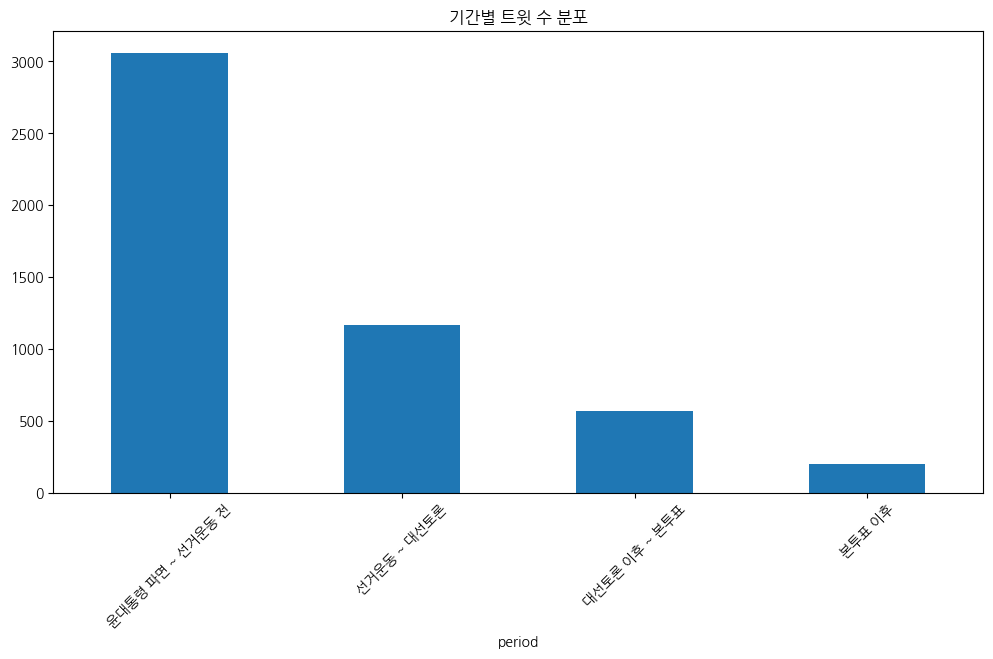

In [ ]:
# Í∏∞Í∞ÑÎ≥Ñ Ìä∏Ïúó Ïàò Î∂ÑÌè¨
period_counts = df['period'].value_counts()
plt.figure(figsize=(12, 6))
period_counts.plot(kind='bar')
plt.title('Í∏∞Í∞ÑÎ≥Ñ Ìä∏Ïúó Ïàò Î∂ÑÌè¨')
plt.xticks(rotation=45)
plt.show()

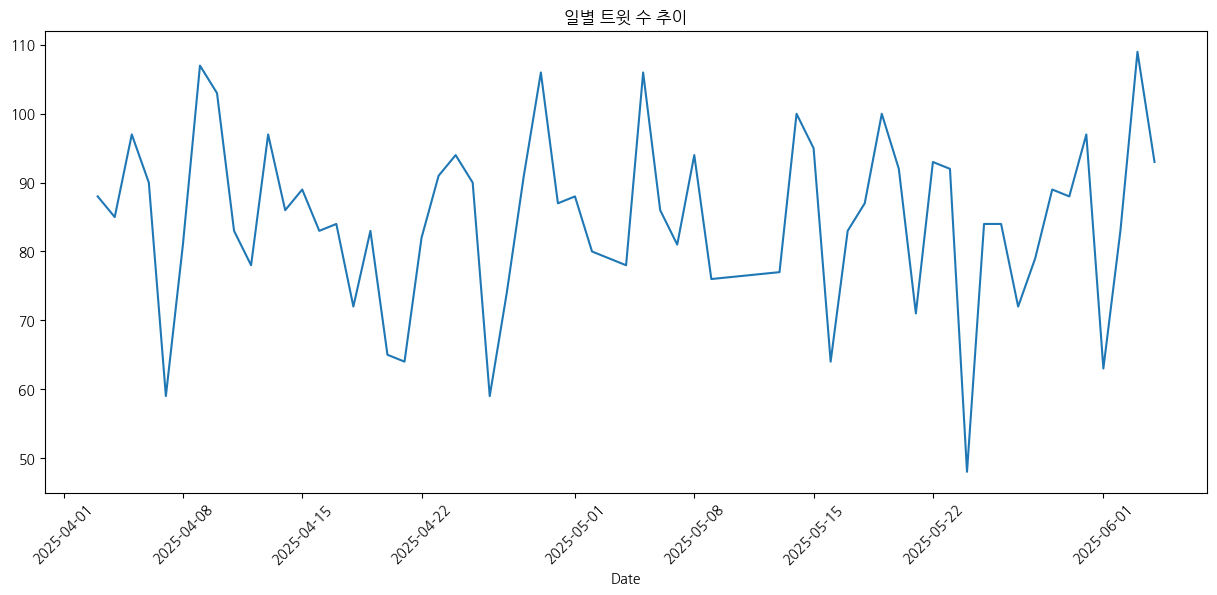

In [ ]:
# ÏùºÎ≥Ñ Ìä∏Ïúó Ïàò Ï∂îÏù¥
df['Date'] = pd.to_datetime(df['Date'])
daily_tweets = df.groupby(df['Date'].dt.date).size()
plt.figure(figsize=(15, 6))
daily_tweets.plot()
plt.title('ÏùºÎ≥Ñ Ìä∏Ïúó Ïàò Ï∂îÏù¥')
plt.xticks(rotation=45)
plt.show()

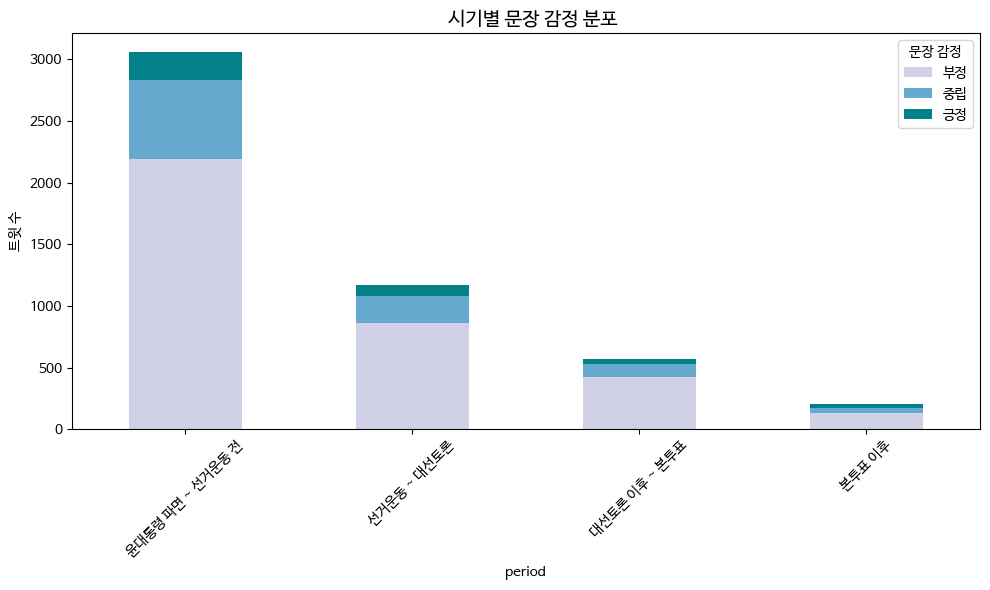

In [ ]:
# Í∞êÏ†ï ÏàúÏÑúÏôÄ ÎåÄÏùë Ïª¨Îü¨ (Î∞ùÍ∏∞ Í∑∏ÎùºÎç∞Ïù¥ÏÖò)
sentiment_order = ['Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω', 'Í∏çÏ†ï']
color_map = sns.color_palette("PuBuGn", n_colors=3)

sent_period = df.groupby(['period', 'sentence_sentiment']).size().unstack(fill_value=0)
sent_period = sent_period.reindex(period_order)
sent_period = sent_period[sentiment_order]

# Plot
sent_period.plot(kind='bar', stacked=True, figsize=(10,6), color=color_map)
plt.title('üóìÔ∏è ÏãúÍ∏∞Î≥Ñ Î¨∏Ïû• Í∞êÏ†ï Î∂ÑÌè¨', fontsize=14)

plt.ylabel('Ìä∏Ïúó Ïàò')
plt.xticks(rotation=45)
plt.legend(title='Î¨∏Ïû• Í∞êÏ†ï', loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'ÌÉÄÍ≤ü Í∞êÏ†ï Î∂ÑÌè¨ (Ïù¥Ïû¨Î™Ö ÎåÄÏÉÅ)')

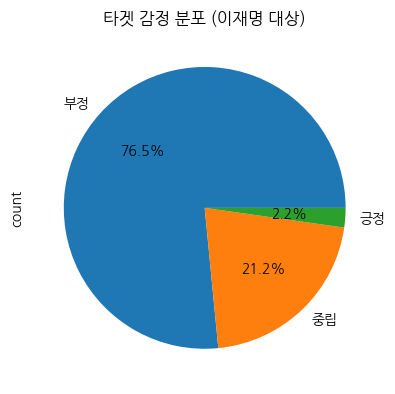

In [ ]:
# ÌÉÄÍ≤ü Í∞êÏ†ï Î∂ÑÌè¨ (Ïù¥Ïû¨Î™ÖÏóê ÎåÄÌïú ÏßÅÏ†ëÏ†Å Í∞êÏ†ï)
target_sentiment_dist = df['target_sentiment'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
target_sentiment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('ÌÉÄÍ≤ü Í∞êÏ†ï Î∂ÑÌè¨ (Ïù¥Ïû¨Î™Ö ÎåÄÏÉÅ)')

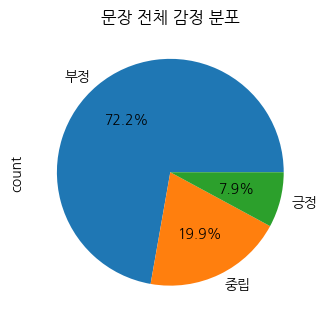

In [ ]:
# Î¨∏Ïû• Ï†ÑÏ≤¥ Í∞êÏ†ï vs ÌÉÄÍ≤ü Í∞êÏ†ï ÎπÑÍµê
plt.subplot(1, 2, 2)
sentence_sentiment_dist = df['sentence_sentiment'].value_counts()
sentence_sentiment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Î¨∏Ïû• Ï†ÑÏ≤¥ Í∞êÏ†ï Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

## Distil-KOBERT

In [ ]:
# Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú®
# ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Distil_predicted.csv"

try:
    # CSV ÌååÏùº Î°úÎìú
    df = pd.read_csv(file_path)

    # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    print("Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
    print(df[['period', 'target_sentiment']].head(3))

    # Í∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú® Í≥ÑÏÇ∞
    def calculate_support_rate(df):
        total = df.groupby('period').size()
        positive = df[df['target_sentiment']=='Í∏çÏ†ï'].groupby('period').size()
        return (positive / total).fillna(0).sort_values(ascending=False)

    support_rate = calculate_support_rate(df)

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\nÍ∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú®:")
    print(support_rate.to_string())

except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Îã§Ïùå ÏÇ¨Ìï≠ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî:")
    print("1. Google Drive ÎßàÏö¥Ìä∏ Ïó¨Î∂Ä")
    print("2. ÌååÏùº Í≤ΩÎ°ú Ï†ïÌôïÏÑ±: ÌòÑÏû¨ Í≤ΩÎ°ú -", file_path)
    print("3. CSV ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä")

Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
             period target_sentiment
0  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ               Ï§ëÎ¶Ω
1  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ               Î∂ÄÏ†ï
2  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ               Î∂ÄÏ†ï

Í∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú®:
period
ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ ~ Î≥∏Ìà¨Ìëú       0.027997
Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ              0.026369
ÏÑ†Í±∞Ïö¥Îèô ~ ÎåÄÏÑ†ÌÜ†Î°†         0.025919
Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ    0.024122


Í∏∞Í∞ÑÎ≥Ñ Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú® Î∂ÑÏÑù
4/3~4/6: 0.032 (3.2%) - Ï†ÑÏ≤¥: 812, Í∏çÏ†ï: 26
4/7~4/13: 0.025 (2.5%) - Ï†ÑÏ≤¥: 1474, Í∏çÏ†ï: 37
4/14~4/20: 0.018 (1.8%) - Ï†ÑÏ≤¥: 1416, Í∏çÏ†ï: 26
4/21~4/27: 0.026 (2.6%) - Ï†ÑÏ≤¥: 1370, Í∏çÏ†ï: 36
4/28~5/4: 0.031 (3.1%) - Ï†ÑÏ≤¥: 1312, Í∏çÏ†ï: 41
5/5~5/11: 0.013 (1.3%) - Ï†ÑÏ≤¥: 1078, Í∏çÏ†ï: 14
5/12~5/18: 0.026 (2.6%) - Ï†ÑÏ≤¥: 1223, Í∏çÏ†ï: 32
5/19~5/25: 0.025 (2.5%) - Ï†ÑÏ≤¥: 1412, Í∏çÏ†ï: 35
5/26~6/4: 0.028 (2.8%) - Ï†ÑÏ≤¥: 2106, Í∏çÏ†ï: 59

ÏöîÏïΩ Í≤∞Í≥º:
       Í∏∞Í∞Ñ  Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞  Í∏çÏ†ï_Îç∞Ïù¥ÌÑ∞  ÏßÄÏßÄÏú®
  4/3~4/6     812      26 3.20
 4/7~4/13    1474      37 2.51
4/14~4/20    1416      26 1.84
4/21~4/27    1370      36 2.63
 4/28~5/4    1312      41 3.12
 5/5~5/11    1078      14 1.30
5/12~5/18    1223      32 2.62
5/19~5/25    1412      35 2.48
 5/26~6/4    2106      59 2.80


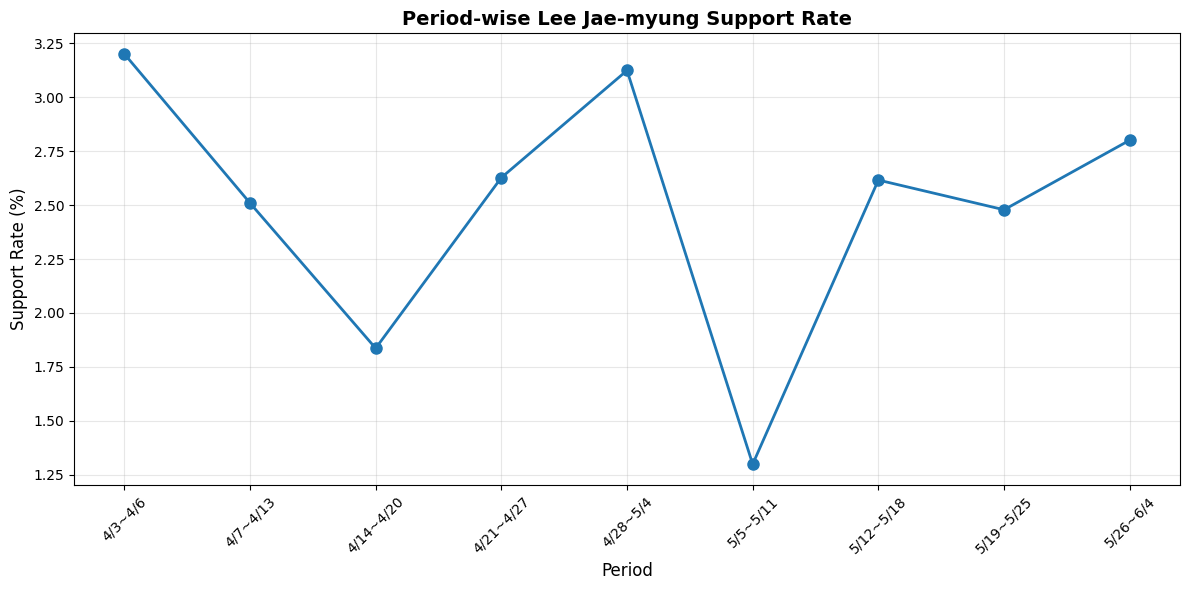

In [ ]:
# Ï£ºÏ∞®Î≥Ñ DistilBert ÏßÄÏßÄÏú®
import pandas as pd
from google.colab import drive


# CSV ÌååÏùº Î°úÎìú
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Distil_predicted.csv"
df = pd.read_csv(file_path)

def calculate_support_rate_by_periods(df):
    """
    ÏßÄÏ†ïÎêú Í∏∞Í∞ÑÎåÄÎ≥ÑÎ°ú Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
    ÏßÄÏßÄÏú® = target_sentimentÍ∞Ä 'Í∏çÏ†ï'Ïù∏ Îç∞Ïù¥ÌÑ∞ Ïàò / Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò
    """

    # ÎÇ†Ïßú Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Í∏∞Í∞ÑÎåÄÎ≥Ñ Î≤îÏúÑ ÏÑ§Ï†ï (2025ÎÖÑ Í∏∞Ï§Ä)
    date_ranges = [
        ('2025-04-03', '2025-04-06', '4/3~4/6'),
        ('2025-04-07', '2025-04-13', '4/7~4/13'),
        ('2025-04-14', '2025-04-20', '4/14~4/20'),
        ('2025-04-21', '2025-04-27', '4/21~4/27'),
        ('2025-04-28', '2025-05-04', '4/28~5/4'),
        ('2025-05-05', '2025-05-11', '5/5~5/11'),
        ('2025-05-12', '2025-05-18', '5/12~5/18'),
        ('2025-05-19', '2025-05-25', '5/19~5/25'),
        ('2025-05-26', '2025-06-04', '5/26~6/4')
    ]

    support_rates = {}
    detailed_results = []

    print("Í∏∞Í∞ÑÎ≥Ñ Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú® Î∂ÑÏÑù")
    print("=" * 50)

    for start_date, end_date, period_name in date_ranges:
        # Ìï¥Îãπ Í∏∞Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        period_data = df.loc[mask]

        # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò
        total_count = len(period_data)

        # Í∏çÏ†ï sentiment Îç∞Ïù¥ÌÑ∞ Ïàò
        positive_count = len(period_data[period_data['target_sentiment'] == 'Í∏çÏ†ï'])

        # ÏßÄÏßÄÏú® Í≥ÑÏÇ∞
        support_rate = positive_count / total_count if total_count > 0 else 0

        # Í≤∞Í≥º Ï†ÄÏû•
        support_rates[period_name] = support_rate
        detailed_results.append({
            'Í∏∞Í∞Ñ': period_name,
            'Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞': total_count,
            'Í∏çÏ†ï_Îç∞Ïù¥ÌÑ∞': positive_count,
            'ÏßÄÏßÄÏú®': round(support_rate * 100, 2)
        })

        # Í≤∞Í≥º Ï∂úÎ†•
        print(f"{period_name}: {support_rate:.3f} ({support_rate*100:.1f}%) - Ï†ÑÏ≤¥: {total_count}, Í∏çÏ†ï: {positive_count}")

    return support_rates, pd.DataFrame(detailed_results)

# Ìï®Ïàò Ïã§Ìñâ
try:
    support_rates, results_df = calculate_support_rate_by_periods(df)

    print("\n" + "=" * 50)
    print("ÏöîÏïΩ Í≤∞Í≥º:")
    print(results_df.to_string(index=False))

    # ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉùÏÇ¨Ìï≠)
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    periods = list(support_rates.keys())
    rates = [rate * 100 for rate in support_rates.values()]

    plt.figure(figsize=(12, 6))
    plt.plot(periods, rates, marker='o', linewidth=2, markersize=8)
    plt.title('Period-wise Lee Jae-myung Support Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Period', fontsize=12)
    plt.ylabel('Support Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Îã§Ïùå ÏÇ¨Ìï≠ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî:")
    print("1. CSV ÌååÏùºÏùò Ïª¨ÎüºÎ™Ö ÌôïÏù∏ (Date, target_sentiment)")
    print("2. ÌååÏùº Í≤ΩÎ°ú Ï†ïÌôïÏÑ±")
    print("3. Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏùºÏπò Ïó¨Î∂Ä")


In [ ]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = "/content/drive/MyDrive/Data/KoBERT/X_crawling_predicted.xlsx"
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# ÏòÅÏñ¥ Í∞êÏ†ï Î†àÏù¥Î∏î Îß§Ìïë
label_map = {'Í∏çÏ†ï': 'Positive', 'Ï§ëÎ¶Ω': 'Neutral', 'Î∂ÄÏ†ï': 'Negative', 'N/A': 'N/A'}
df['sentence_sentiment'] = df['sentence_sentiment'].map(label_map)
df['target_sentiment'] = df['target_sentiment'].map(label_map)

# target_sentimentÏóêÏÑú N/A Ï†úÏô∏
target_df = df[df['target_sentiment'] != 'N/A']

# ÎÇ†ÏßúÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def get_sentiment_ratio(data, column):
    ratio = (
        data.groupby(['Date', column])
        .size()
        .unstack(fill_value=0)
    )
    return ratio.div(ratio.sum(axis=1), axis=0)

# ÎπÑÏú® Í≥ÑÏÇ∞
sentence_ratio = get_sentiment_ratio(df, 'sentence_sentiment')
target_ratio = get_sentiment_ratio(target_df, 'target_sentiment')


In [ ]:
# 1. Ïù¥Îèô ÌèâÍ∑† Í∏∞Î∞ò Ï∂îÏÑ∏ Î∂ÑÏÑù (7Ïùº Ïù¥Îèô ÌèâÍ∑†)
def plot_moving_average(ratio_df, title):
    ma_df = ratio_df.rolling(window=7, min_periods=1).mean()
    ma_df.plot(figsize=(10, 5), title=f"{title} Sentiment (7-Day Moving Average)", marker='o')
    plt.ylabel("Sentiment Ratio")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. ÏùºÎ≥Ñ Í∞êÏ†ï Î≥ÄÌôîÎüâ Î∂ÑÏÑù
def plot_daily_change(ratio_df, title):
    delta = ratio_df.diff()
    delta.plot(figsize=(10, 5), title=f"{title} Sentiment Daily Change", marker='x')
    plt.ylabel("Change in Ratio")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2-1. ÏùºÎ≥Ñ Í∞êÏ†ï Î≥ÄÌôîÎüâ Î∂ÑÏÑù(Í∞êÏ†ï Î≥Ñ)
def plot_sentiment_change_separate(ratio_df, title_prefix=""):
    delta = ratio_df.diff()
    sentiments = delta.columns.tolist()

    # ÏÉâÏÉÅ ÏßÄÏ†ï
    colors = {
        'Î∂ÄÏ†ï': 'blue',
        'Ï§ëÎ¶Ω': 'orange',
        'Í∏çÏ†ï': 'green'
    }

    # yÏ∂ï Î≤îÏúÑ ÌÜµÏùº
    y_min = delta.min().min() * 1.1
    y_max = delta.max().max() * 1.1

    fig, axes = plt.subplots(nrows=len(sentiments), ncols=1, figsize=(12, 4 * len(sentiments)), sharex=True)

    for i, sentiment in enumerate(sentiments):
        ax = axes[i]
        ax.plot(delta.index, delta[sentiment], marker='o', color=colors.get(sentiment, 'gray'))
        ax.set_title(f"{title_prefix} - {sentiment} Î≥ÄÌôîÎüâ", fontsize=13)
        ax.set_ylabel("Change")
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        # ÎÇ†Ïßú Ìè¨Îß∑ YYYY-MM-DD
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    axes[-1].set_xlabel("Date")
    fig.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Í∞êÏ†ï Î≥ÄÌôîÏùò Î™®Î©òÌÖÄ (Ïó∞ÏÜç diff)
def plot_momentum(ratio_df, title):
    momentum = ratio_df.diff().diff()
    momentum.plot(figsize=(10, 5), title=f"{title} Sentiment Momentum", linestyle='--')
    plt.ylabel("Momentum")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. periodÎ≥Ñ Í∞êÏ†ï Î∂ÑÌè¨ (bar plot)
def plot_period_distribution(data, column, title):
    period_ratio = (
        data.groupby(['period', column])
        .size()
        .unstack(fill_value=0)
    )
    period_ratio = period_ratio.div(period_ratio.sum(axis=1), axis=0)
    period_ratio.plot(kind='bar', stacked=True, figsize=(10, 5), title=f"{title} Sentiment by Period")
    plt.ylabel("Ratio")
    plt.xlabel("Period")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. Í∞êÏ†ï ÌûàÌä∏Îßµ (ÎÇ†Ïßú x Í∞êÏ†ï)


def plot_sentiment_heatmap(ratio_df, title):
    # Ïª¨ÎüºÎ™Ö ÎÇ†Ïßú Ìè¨Îß∑ Í∞ÑÎã®Ìûà Î≥ÄÍ≤Ω (YYYY-MM-DD-HH)
    new_columns = [pd.to_datetime(str(col)).strftime('%Y-%m-%d-%H') for col in ratio_df.index]
    ratio_df_formatted = ratio_df.copy()
    ratio_df_formatted.index = new_columns

    plt.figure(figsize=(10, 6))
    sns.heatmap(ratio_df_formatted.T, cmap="YlGnBu", annot=False)  # ‚úÖ annot Ï†úÍ±∞
    plt.title(f"{title} Sentiment Heatmap")
    plt.xlabel("Date")
    plt.ylabel("Sentiment")
    plt.tight_layout()
    plt.show()

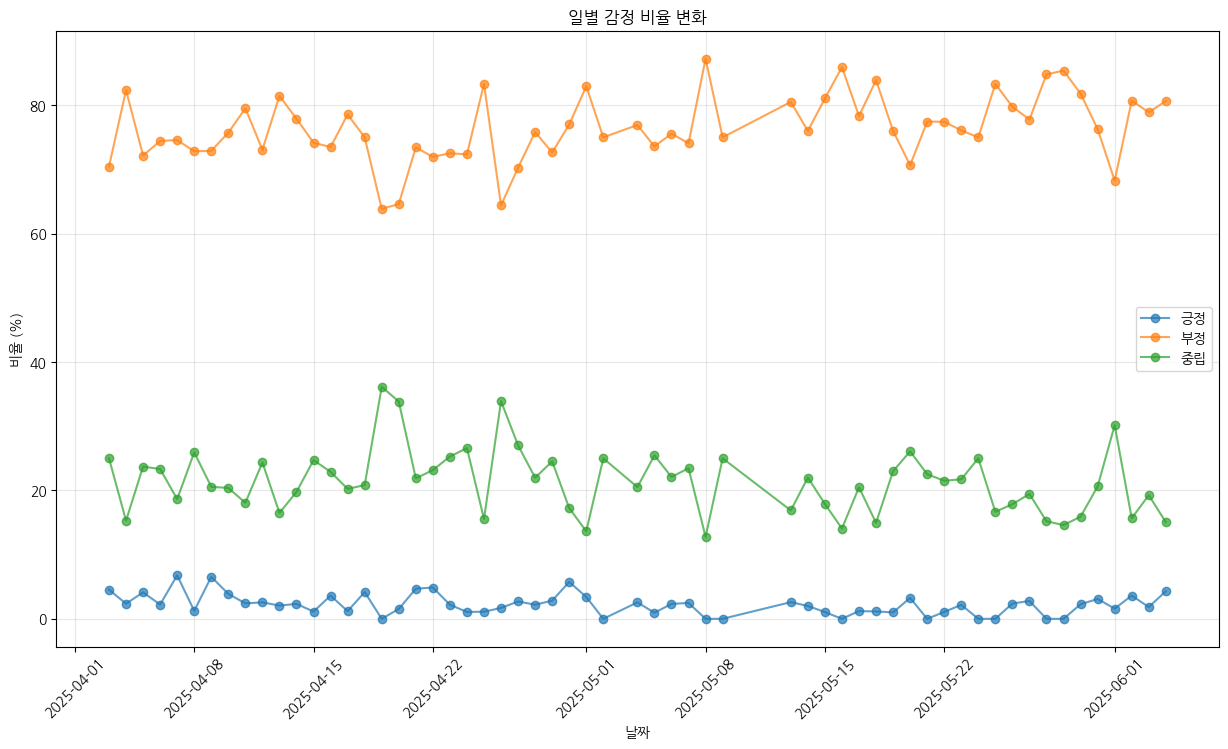

In [ ]:
# ÏùºÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Î≥ÄÌôî
daily_sentiment = df.groupby([df['Date'].dt.date, 'target_sentiment']).size().unstack(fill_value=0)
daily_sentiment_pct = daily_sentiment.div(daily_sentiment.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
for sentiment in daily_sentiment_pct.columns:
    plt.plot(daily_sentiment_pct.index, daily_sentiment_pct[sentiment],
             label=sentiment, marker='o', alpha=0.7)

plt.title('ÏùºÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Î≥ÄÌôî')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÎπÑÏú® (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

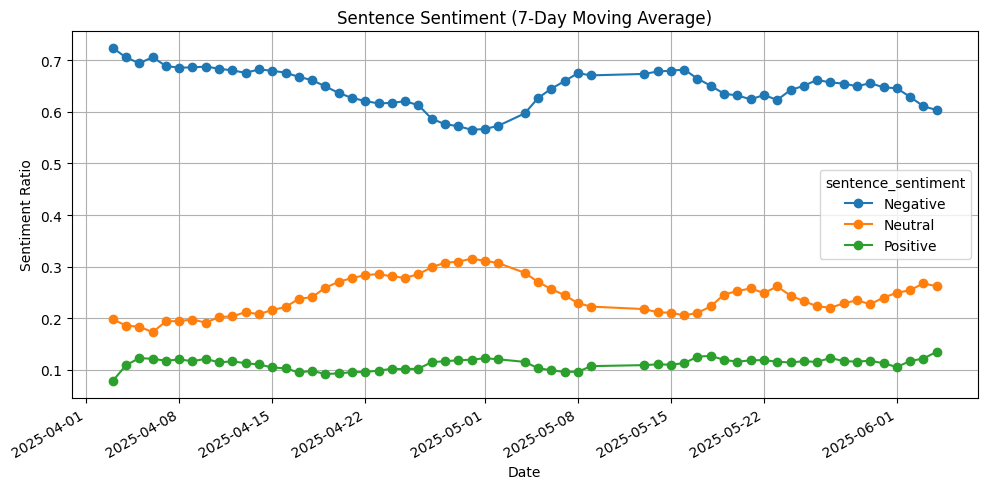

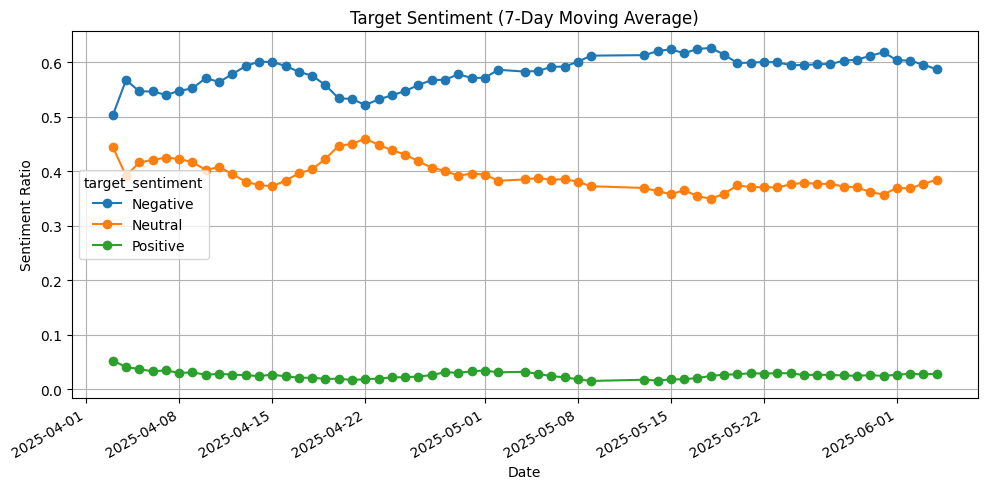

In [ ]:
# Ïù¥Îèô ÌèâÍ∑† Í∏∞Î∞ò Ï∂îÏÑ∏ Î∂ÑÏÑù(7Ïùº)
plot_moving_average(sentence_ratio, "Sentence")
plot_moving_average(target_ratio, "Target")

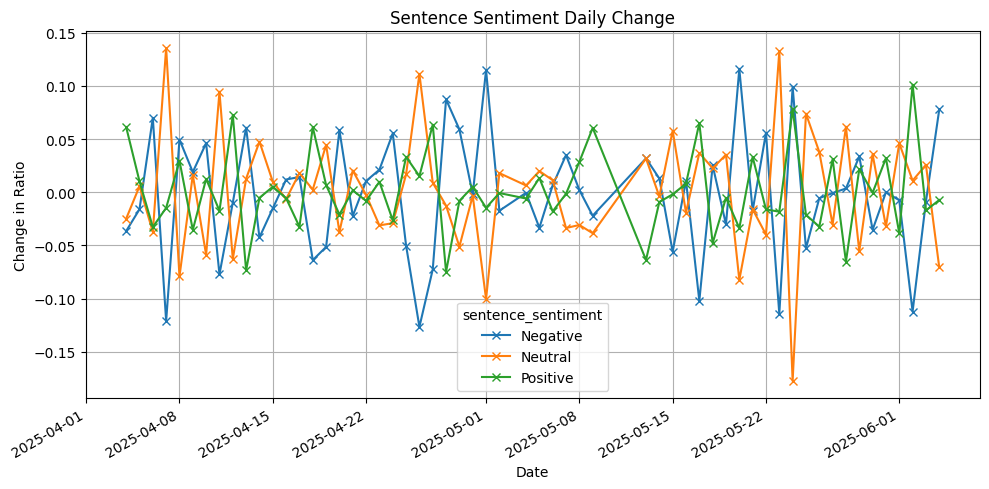

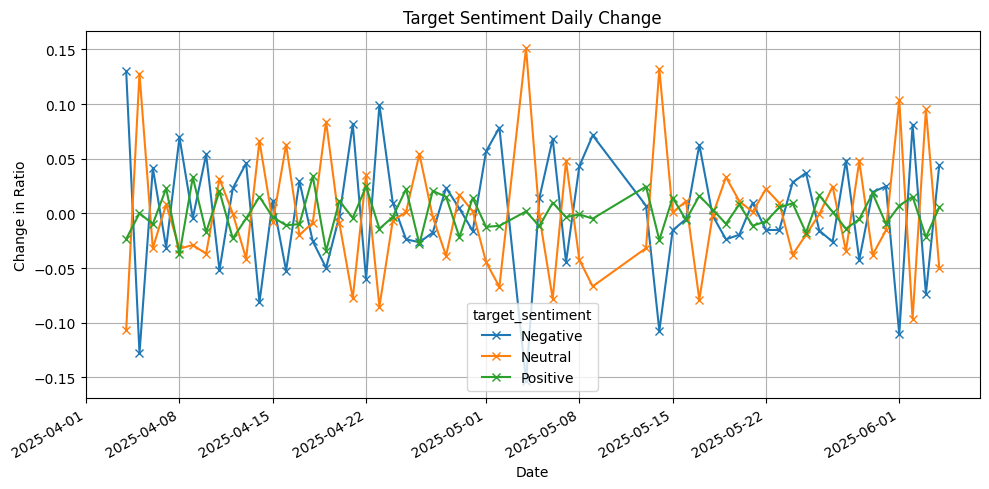

In [ ]:
# ÏùºÎ≥Ñ Í∞êÏ†ï Î≥ÄÌôîÎüâ Î∂ÑÏÑù
plot_daily_change(sentence_ratio, "Sentence")
plot_daily_change(target_ratio, "Target")

<ipython-input-13-3577652696>:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


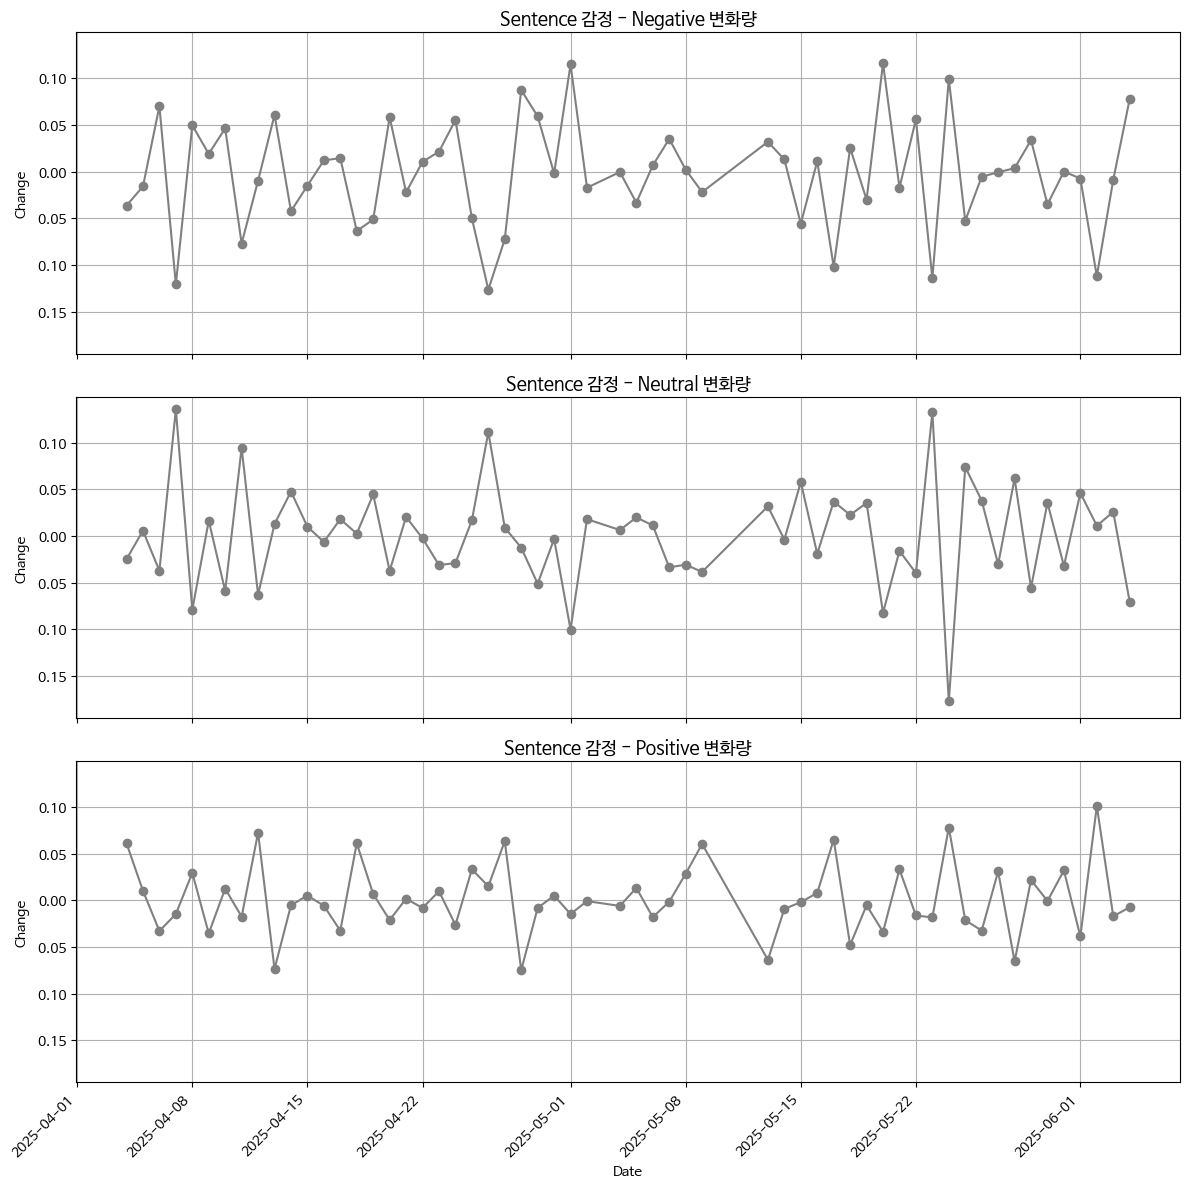

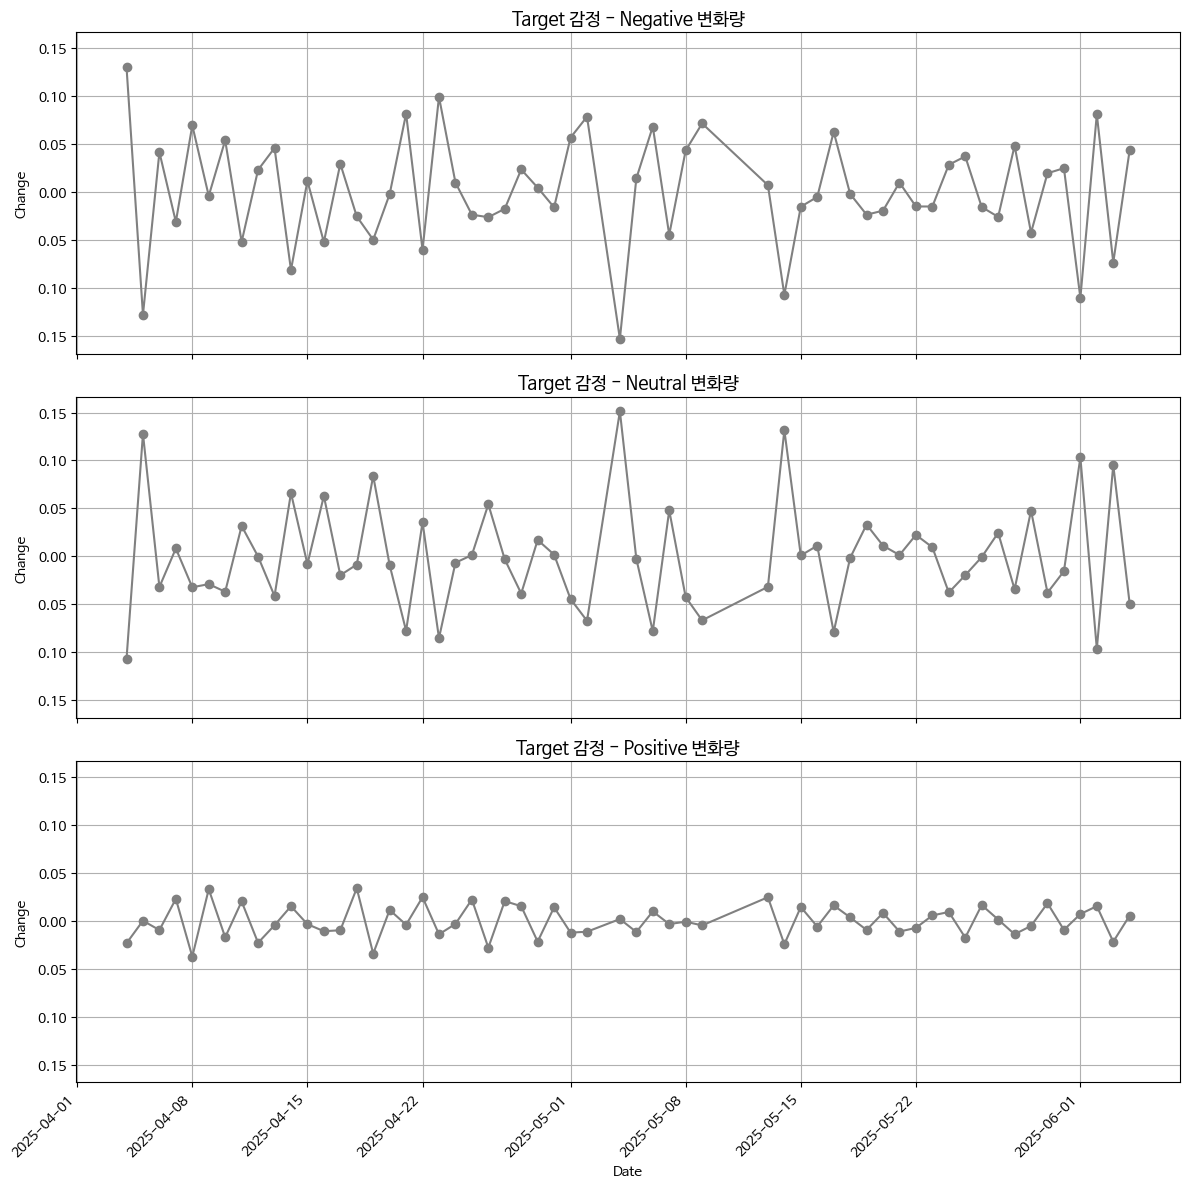

In [ ]:
# ÏùºÎ≥Ñ Í∞êÏ†ï Î≥ÄÌôîÎüâ Î∂ÑÏÑù (Í∞êÏ†ï Î≥Ñ)
# sentence Í∞êÏ†ï Î≥ÄÌôîÎüâ
plot_sentiment_change_separate(sentence_ratio, title_prefix="Sentence Í∞êÏ†ï")

# target Í∞êÏ†ï Î≥ÄÌôîÎüâ
plot_sentiment_change_separate(target_ratio, title_prefix="Target Í∞êÏ†ï")

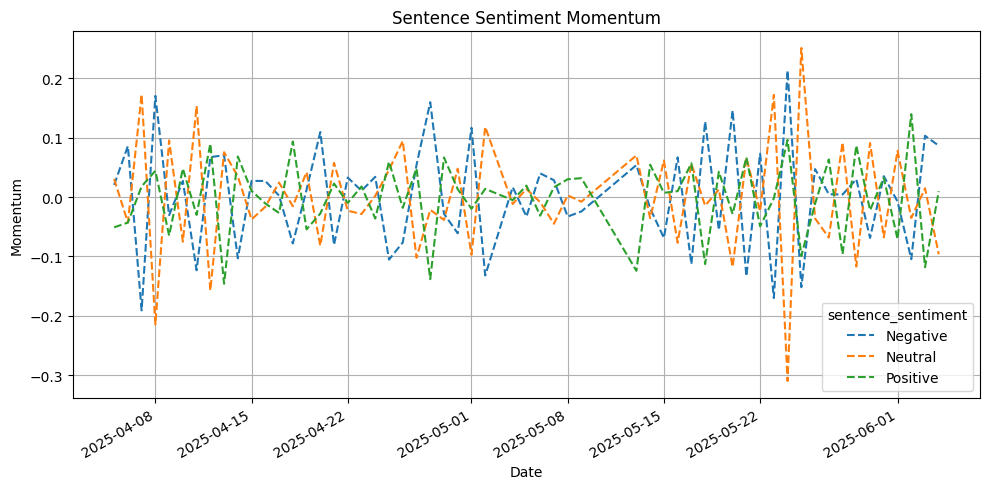

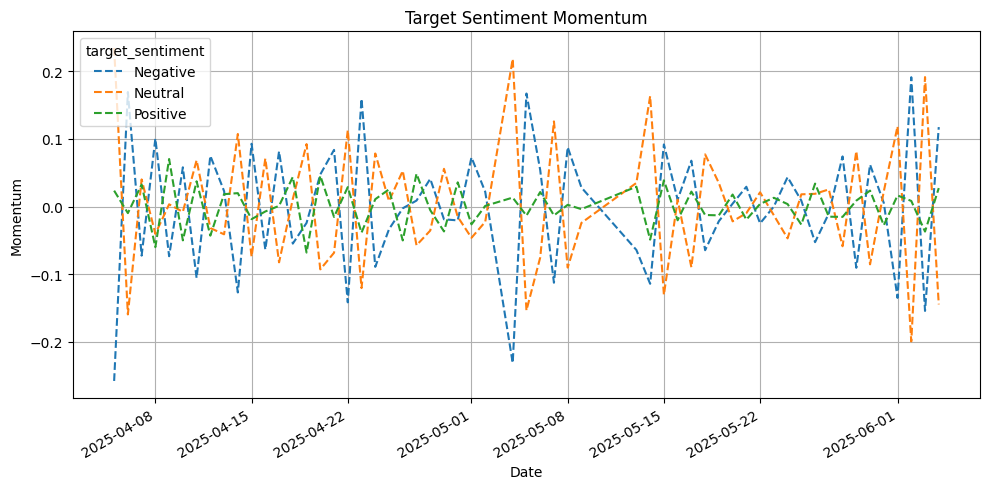

In [ ]:
# Í∞êÏ†ï Î≥ÄÌôî Î™®Î©òÌÖÄ(2Ï∞® ÎØ∏Î∂Ñ)
plot_momentum(sentence_ratio, "Sentence")
plot_momentum(target_ratio, "Target")

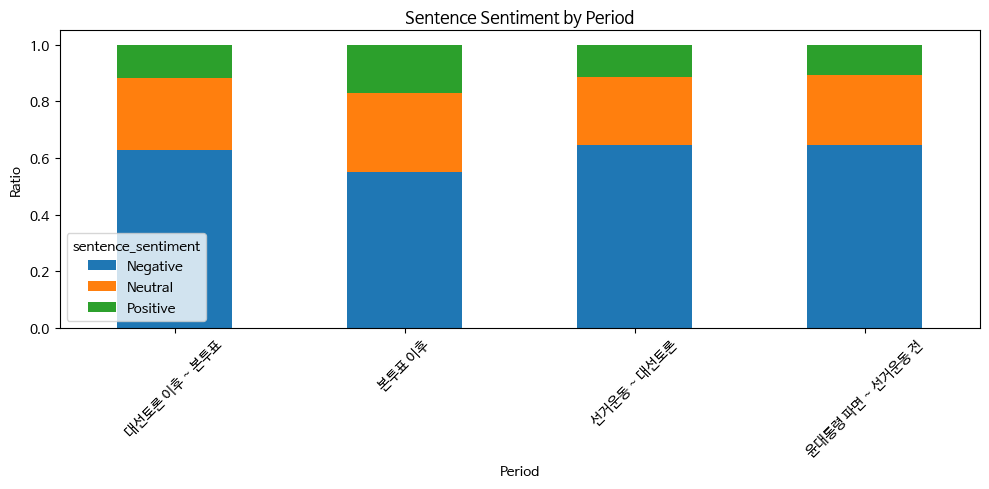

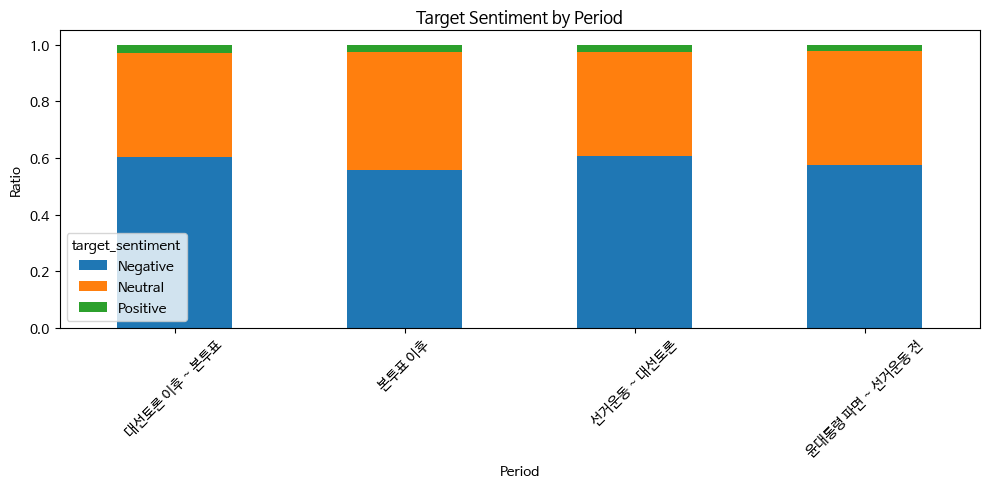

In [ ]:
# period Í∞êÏ†ï Î∂ÑÌè¨
plot_period_distribution(df, 'sentence_sentiment', "Sentence")
plot_period_distribution(target_df, 'target_sentiment', "Target")

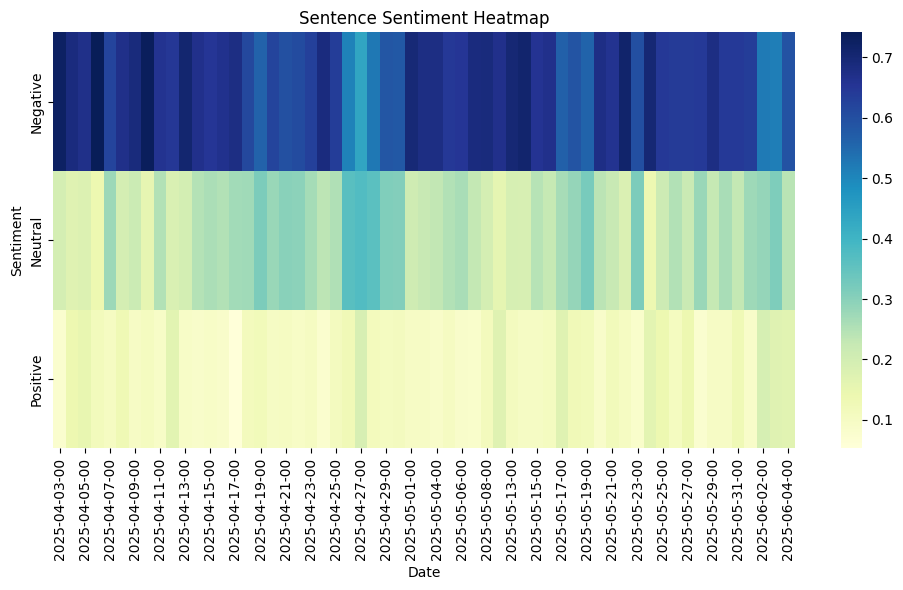

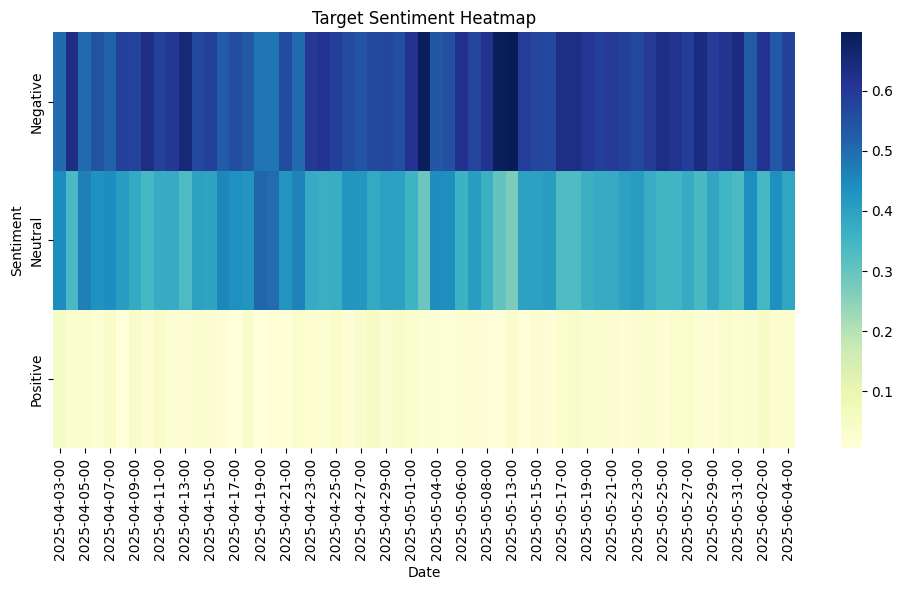

In [ ]:
# Í∞êÏ†ï ÌûàÌä∏Îßµ
plot_sentiment_heatmap(sentence_ratio, "Sentence")
plot_sentiment_heatmap(target_ratio, "Target")

## VADER

In [ ]:
# ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Vader_predicted"

try:
    # CSV ÌååÏùº Î°úÎìú
    df = pd.read_csv(file_path)

    # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    print("Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
    print(df[['period', 'sentiment_label']].head(3))

    # Í∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú® Í≥ÑÏÇ∞
    def calculate_support_rate(df):
        total = df.groupby('period').size()
        positive = df[df['sentiment_label']=='positive'].groupby('period').size()
        return (positive / total).fillna(0).sort_values(ascending=False)

    support_rate = calculate_support_rate(df)

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\nÍ∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú®:")
    print(support_rate.to_string())

except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Îã§Ïùå ÏÇ¨Ìï≠ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî:")
    print("1. Google Drive ÎßàÏö¥Ìä∏ Ïó¨Î∂Ä")
    print("2. ÌååÏùº Í≤ΩÎ°ú Ï†ïÌôïÏÑ±: ÌòÑÏû¨ Í≤ΩÎ°ú -", file_path)
    print("3. CSV ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä")

Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
             period sentiment_label
0  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ        negative
1  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ        negative
2  Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ        positive

Í∏∞Í∞ÑÎ≥Ñ ÏßÄÏßÄÏú®:
period
Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ              0.406021
Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ    0.399769
ÏÑ†Í±∞Ïö¥Îèô ~ ÎåÄÏÑ†ÌÜ†Î°†         0.396658
ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ ~ Î≥∏Ìà¨Ìëú       0.369874


Í∏∞Í∞ÑÎ≥Ñ Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú® Î∂ÑÏÑù
4/3~4/6: 0.378 (37.8%) - Ï†ÑÏ≤¥: 3318, Í∏çÏ†ï: 1254
4/7~4/13: 0.378 (37.8%) - Ï†ÑÏ≤¥: 3996, Í∏çÏ†ï: 1509
4/14~4/20: 0.400 (40.0%) - Ï†ÑÏ≤¥: 3824, Í∏çÏ†ï: 1530
4/21~4/27: 0.413 (41.3%) - Ï†ÑÏ≤¥: 3755, Í∏çÏ†ï: 1549
4/28~5/4: 0.433 (43.3%) - Ï†ÑÏ≤¥: 3867, Í∏çÏ†ï: 1676
5/5~5/11: 0.395 (39.5%) - Ï†ÑÏ≤¥: 3738, Í∏çÏ†ï: 1476
5/12~5/18: 0.412 (41.2%) - Ï†ÑÏ≤¥: 3823, Í∏çÏ†ï: 1576
5/19~5/25: 0.381 (38.1%) - Ï†ÑÏ≤¥: 3755, Í∏çÏ†ï: 1431
5/26~6/4: 0.381 (38.1%) - Ï†ÑÏ≤¥: 5447, Í∏çÏ†ï: 2073

ÏöîÏïΩ Í≤∞Í≥º:
       Í∏∞Í∞Ñ  Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞  Í∏çÏ†ï_Îç∞Ïù¥ÌÑ∞   ÏßÄÏßÄÏú®
  4/3~4/6    3318    1254 37.79
 4/7~4/13    3996    1509 37.76
4/14~4/20    3824    1530 40.01
4/21~4/27    3755    1549 41.25
 4/28~5/4    3867    1676 43.34
 5/5~5/11    3738    1476 39.49
5/12~5/18    3823    1576 41.22
5/19~5/25    3755    1431 38.11
 5/26~6/4    5447    2073 38.06


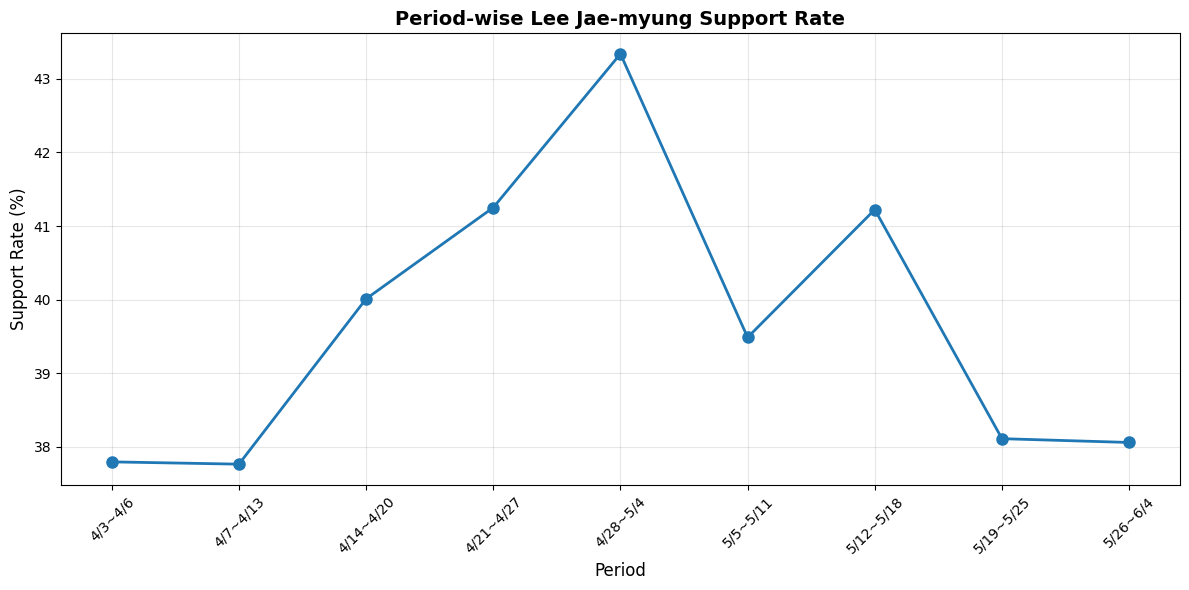

In [ ]:
# Ï£ºÏ∞®Î≥Ñ VADER ÏßÄÏßÄÏú®
import pandas as pd
from google.colab import drive


# CSV ÌååÏùº Î°úÎìú
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Vader_predicted"
df = pd.read_csv(file_path)

def calculate_support_rate_by_periods(df):
    """
    ÏßÄÏ†ïÎêú Í∏∞Í∞ÑÎåÄÎ≥ÑÎ°ú Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
    ÏßÄÏßÄÏú® = target_sentimentÍ∞Ä 'Í∏çÏ†ï'Ïù∏ Îç∞Ïù¥ÌÑ∞ Ïàò / Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò
    """

    # ÎÇ†Ïßú Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Í∏∞Í∞ÑÎåÄÎ≥Ñ Î≤îÏúÑ ÏÑ§Ï†ï (2025ÎÖÑ Í∏∞Ï§Ä)
    date_ranges = [
        ('2025-04-03', '2025-04-06', '4/3~4/6'),
        ('2025-04-07', '2025-04-13', '4/7~4/13'),
        ('2025-04-14', '2025-04-20', '4/14~4/20'),
        ('2025-04-21', '2025-04-27', '4/21~4/27'),
        ('2025-04-28', '2025-05-04', '4/28~5/4'),
        ('2025-05-05', '2025-05-11', '5/5~5/11'),
        ('2025-05-12', '2025-05-18', '5/12~5/18'),
        ('2025-05-19', '2025-05-25', '5/19~5/25'),
        ('2025-05-26', '2025-06-04', '5/26~6/4')
    ]

    support_rates = {}
    detailed_results = []

    print("Í∏∞Í∞ÑÎ≥Ñ Ïù¥Ïû¨Î™Ö ÏßÄÏßÄÏú® Î∂ÑÏÑù")
    print("=" * 50)

    for start_date, end_date, period_name in date_ranges:
        # Ìï¥Îãπ Í∏∞Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        period_data = df.loc[mask]

        # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò
        total_count = len(period_data)

        # Í∏çÏ†ï sentiment Îç∞Ïù¥ÌÑ∞ Ïàò
        positive_count = len(period_data[period_data['sentiment_label'] == 'positive'])

        # ÏßÄÏßÄÏú® Í≥ÑÏÇ∞
        support_rate = positive_count / total_count if total_count > 0 else 0

        # Í≤∞Í≥º Ï†ÄÏû•
        support_rates[period_name] = support_rate
        detailed_results.append({
            'Í∏∞Í∞Ñ': period_name,
            'Ï†ÑÏ≤¥_Îç∞Ïù¥ÌÑ∞': total_count,
            'Í∏çÏ†ï_Îç∞Ïù¥ÌÑ∞': positive_count,
            'ÏßÄÏßÄÏú®': round(support_rate * 100, 2)
        })

        # Í≤∞Í≥º Ï∂úÎ†•
        print(f"{period_name}: {support_rate:.3f} ({support_rate*100:.1f}%) - Ï†ÑÏ≤¥: {total_count}, Í∏çÏ†ï: {positive_count}")

    return support_rates, pd.DataFrame(detailed_results)

# Ìï®Ïàò Ïã§Ìñâ
try:
    support_rates, results_df = calculate_support_rate_by_periods(df)

    print("\n" + "=" * 50)
    print("ÏöîÏïΩ Í≤∞Í≥º:")
    print(results_df.to_string(index=False))

    # ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉùÏÇ¨Ìï≠)
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    periods = list(support_rates.keys())
    rates = [rate * 100 for rate in support_rates.values()]

    plt.figure(figsize=(12, 6))
    plt.plot(periods, rates, marker='o', linewidth=2, markersize=8)
    plt.title('Period-wise Lee Jae-myung Support Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Period', fontsize=12)
    plt.ylabel('Support Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Îã§Ïùå ÏÇ¨Ìï≠ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî:")
    print("1. CSV ÌååÏùºÏùò Ïª¨ÎüºÎ™Ö ÌôïÏù∏ (Date, target_sentiment)")
    print("2. ÌååÏùº Í≤ΩÎ°ú Ï†ïÌôïÏÑ±")
    print("3. Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏùºÏπò Ïó¨Î∂Ä")


## Ïó¨Î°†Ï°∞ÏÇ¨ Í≤∞Í≥º

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'Ï£ºÏ∞®': ['4Ïõî 1Ï£ºÏ∞®', '4Ïõî 2Ï£ºÏ∞®', '4Ïõî 3Ï£ºÏ∞®', '4Ïõî 4Ï£ºÏ∞®', '5Ïõî 1Ï£ºÏ∞®',
             '5Ïõî 2Ï£ºÏ∞®', '5Ïõî 3Ï£ºÏ∞®', '5Ïõî 4Ï£ºÏ∞®', '6Ïõî 1Ï£ºÏ∞®'],
    'ÎÇ†ÏßúÎ≤îÏúÑ': ['4/3~4/6', '4/7~4/13', '4/14~4/20', '4/21~4/27', '4/28~5/4',
                '5/5~5/11', '5/12~5/18', '5/19~5/25', '5/26~6/4'],
    'Í∏∞Í∞ÑÎåÄ': ['ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ',
              'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÏÑ†Í±∞Ïö¥Îèô~ÎåÄÏÑ†ÌÜ†Î°†', 'ÏÑ†Í±∞Ïö¥Îèô~ÎåÄÏÑ†ÌÜ†Î°†', 'ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ~Î≥∏Ìà¨Ìëú', 'Î≥∏Ìà¨Ìëú~'],
    'ÌïúÍµ≠Í∞§ÎüΩ': [0.34, 0.37, 0.38, 0.38, 0.46, 0.51, 0.45, 0.46, 0.49],
    'Î¶¨ÏñºÎØ∏ÌÑ∞': [0.34, 0.48, 0.5, 0.48, 0.46, 0.51, 0.5, 0.48, 0.58],
    'VADER': [0.378, 0.378, 0.4, 0.413, 0.395, 0.412, 0.381, 0.381, 0.381],
    'DistilBert': [0.032, 0.025, 0.018, 0.026, 0.031, 0.013, 0.036, 0.025, 0.028],
    'KoBert': [0.031, 0.037, 0.027, 0.019, 0.021, 0.016, 0.02, 0.017, 0.023]
}

df = pd.DataFrame(data)
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(df.info())
print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ===")
print(df.describe())


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ï£ºÏ∞®          9 non-null      object 
 1   ÎÇ†ÏßúÎ≤îÏúÑ        9 non-null      object 
 2   Í∏∞Í∞ÑÎåÄ         9 non-null      object 
 3   ÌïúÍµ≠Í∞§ÎüΩ        9 non-null      float64
 4   Î¶¨ÏñºÎØ∏ÌÑ∞        9 non-null      float64
 5   VADER       9 non-null      float64
 6   DistilBert  9 non-null      float64
 7   KoBert      9 non-null      float64
dtypes: float64(5), object(3)
memory usage: 708.0+ bytes
None

=== Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ===
           ÌïúÍµ≠Í∞§ÎüΩ      Î¶¨ÏñºÎØ∏ÌÑ∞     VADER  DistilBert    KoBert
count  9.000000  9.000000  9.000000    9.000000  9.000000
mean   0.426667  0.481111  0.391000    0.026000  0.023444
std    0.060000  0.062937  0.014405    0.007071  0.006966
min    0.340000  0.340000  0.378000    0.013000  0.016000
25%    0.380000  0.480000  0.3

In [ ]:
# Í∏∞Í∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÏßÄÏßÄÏú® Î∂ÑÏÑù
period_analysis = df.groupby('Í∏∞Í∞ÑÎåÄ')[['ÌïúÍµ≠Í∞§ÎüΩ', 'Î¶¨ÏñºÎØ∏ÌÑ∞', 'VADER', 'DistilBert', 'KoBert']].agg(['mean', 'std', 'count'])

print("\n=== Í∏∞Í∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÏßÄÏßÄÏú® ===")
for period in df['Í∏∞Í∞ÑÎåÄ'].unique():
    period_data = df[df['Í∏∞Í∞ÑÎåÄ'] == period]
    print(f"\n{period}:")
    print(f"  ÌïúÍµ≠Í∞§ÎüΩ: {period_data['ÌïúÍµ≠Í∞§ÎüΩ'].mean():.3f} ¬± {period_data['ÌïúÍµ≠Í∞§ÎüΩ'].std():.3f}")
    print(f"  Î¶¨ÏñºÎØ∏ÌÑ∞: {period_data['Î¶¨ÏñºÎØ∏ÌÑ∞'].mean():.3f} ¬± {period_data['Î¶¨ÏñºÎØ∏ÌÑ∞'].std():.3f}")
    print(f"  VADER: {period_data['VADER'].mean():.3f} ¬± {period_data['VADER'].std():.3f}")
    print(f"  DistilBert: {period_data['DistilBert'].mean():.3f} ¬± {period_data['DistilBert'].std():.3f}")
    print(f"  KoBert: {period_data['KoBert'].mean():.3f} ¬± {period_data['KoBert'].std():.3f}")



=== Í∏∞Í∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÏßÄÏßÄÏú® ===

ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ:
  ÌïúÍµ≠Í∞§ÎüΩ: 0.386 ¬± 0.044
  Î¶¨ÏñºÎØ∏ÌÑ∞: 0.452 ¬± 0.064
  VADER: 0.393 ¬± 0.015
  DistilBert: 0.026 ¬± 0.006
  KoBert: 0.027 ¬± 0.007

ÏÑ†Í±∞Ïö¥Îèô~ÎåÄÏÑ†ÌÜ†Î°†:
  ÌïúÍµ≠Í∞§ÎüΩ: 0.480 ¬± 0.042
  Î¶¨ÏñºÎØ∏ÌÑ∞: 0.505 ¬± 0.007
  VADER: 0.396 ¬± 0.022
  DistilBert: 0.024 ¬± 0.016
  KoBert: 0.018 ¬± 0.003

ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ~Î≥∏Ìà¨Ìëú:
  ÌïúÍµ≠Í∞§ÎüΩ: 0.460 ¬± nan
  Î¶¨ÏñºÎØ∏ÌÑ∞: 0.480 ¬± nan
  VADER: 0.381 ¬± nan
  DistilBert: 0.025 ¬± nan
  KoBert: 0.017 ¬± nan

Î≥∏Ìà¨Ìëú~:
  ÌïúÍµ≠Í∞§ÎüΩ: 0.490 ¬± nan
  Î¶¨ÏñºÎØ∏ÌÑ∞: 0.580 ¬± nan
  VADER: 0.381 ¬± nan
  DistilBert: 0.028 ¬± nan
  KoBert: 0.023 ¬± nan


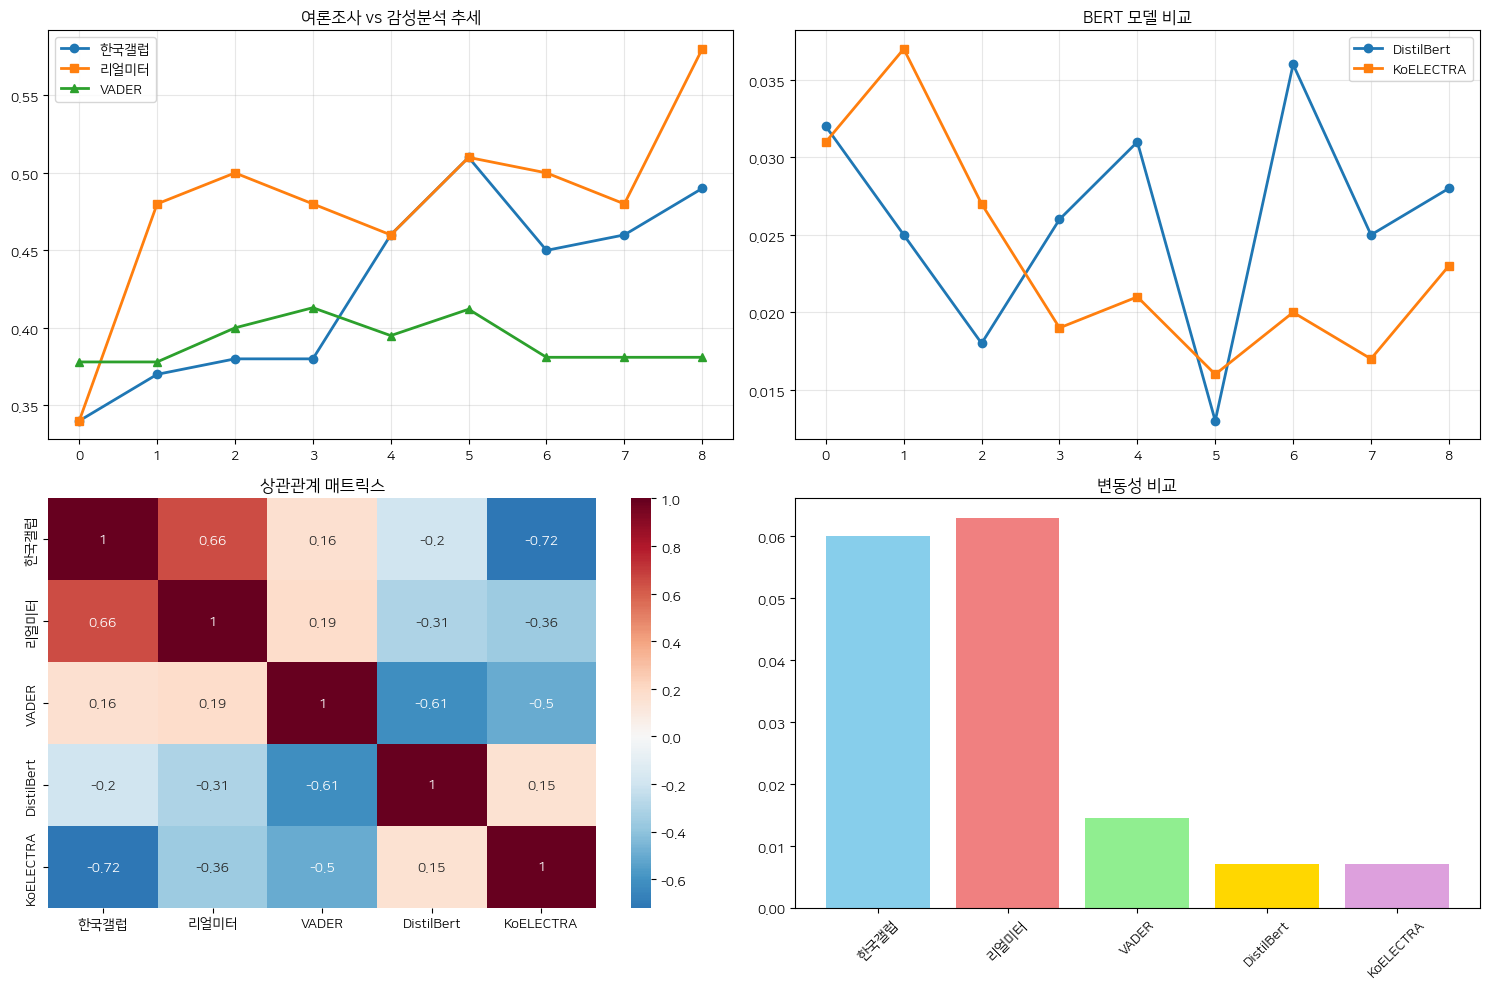

Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ÏôÑÎ£å!


In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∞è Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
import pandas as pd
import numpy as np

data = {
    'Ï£ºÏ∞®': ['4Ïõî 1Ï£ºÏ∞®', '4Ïõî 2Ï£ºÏ∞®', '4Ïõî 3Ï£ºÏ∞®', '4Ïõî 4Ï£ºÏ∞®', '5Ïõî 1Ï£ºÏ∞®',
             '5Ïõî 2Ï£ºÏ∞®', '5Ïõî 3Ï£ºÏ∞®', '5Ïõî 4Ï£ºÏ∞®', '6Ïõî 1Ï£ºÏ∞®'],
    'Í∏∞Í∞ÑÎåÄ': ['ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ',
              'ÌååÎ©¥~ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ', 'ÏÑ†Í±∞Ïö¥Îèô~ÎåÄÏÑ†ÌÜ†Î°†', 'ÏÑ†Í±∞Ïö¥Îèô~ÎåÄÏÑ†ÌÜ†Î°†', 'ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ~Î≥∏Ìà¨Ìëú', 'Î≥∏Ìà¨Ìëú~'],
    'ÌïúÍµ≠Í∞§ÎüΩ': [0.34, 0.37, 0.38, 0.38, 0.46, 0.51, 0.45, 0.46, 0.49],
    'Î¶¨ÏñºÎØ∏ÌÑ∞': [0.34, 0.48, 0.5, 0.48, 0.46, 0.51, 0.5, 0.48, 0.58],
    'VADER': [0.378, 0.378, 0.4, 0.413, 0.395, 0.412, 0.381, 0.381, 0.381],
    'DistilBert': [0.032, 0.025, 0.018, 0.026, 0.031, 0.013, 0.036, 0.025, 0.028],
    'KoELECTRA': [0.031, 0.037, 0.027, 0.019, 0.021, 0.016, 0.02, 0.017, 0.023]
}

df = pd.DataFrame(data)

# ÏïàÏ†ÑÌïú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. ÏãúÍ≥ÑÏó¥ Ï∂îÏÑ∏
axes[0,0].plot(range(len(df)), df['ÌïúÍµ≠Í∞§ÎüΩ'], 'o-', label='ÌïúÍµ≠Í∞§ÎüΩ', linewidth=2)
axes[0,0].plot(range(len(df)), df['Î¶¨ÏñºÎØ∏ÌÑ∞'], 's-', label='Î¶¨ÏñºÎØ∏ÌÑ∞', linewidth=2)
axes[0,0].plot(range(len(df)), df['VADER'], '^-', label='VADER', linewidth=2)
axes[0,0].set_title('Ïó¨Î°†Ï°∞ÏÇ¨ vs Í∞êÏÑ±Î∂ÑÏÑù Ï∂îÏÑ∏')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. BERT Î™®Îç∏ ÎπÑÍµê
axes[0,1].plot(range(len(df)), df['DistilBert'], 'o-', label='DistilBert', linewidth=2)
axes[0,1].plot(range(len(df)), df['KoELECTRA'], 's-', label='KoELECTRA', linewidth=2)
axes[0,1].set_title('BERT Î™®Îç∏ ÎπÑÍµê')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
import seaborn as sns
correlation_matrix = df[['ÌïúÍµ≠Í∞§ÎüΩ', 'Î¶¨ÏñºÎØ∏ÌÑ∞', 'VADER', 'DistilBert', 'KoELECTRA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, ax=axes[1,0])
axes[1,0].set_title('ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§')

# 4. Î≥ÄÎèôÏÑ± ÎπÑÍµê
volatility = df[['ÌïúÍµ≠Í∞§ÎüΩ', 'Î¶¨ÏñºÎØ∏ÌÑ∞', 'VADER', 'DistilBert', 'KoELECTRA']].std()
axes[1,1].bar(range(len(volatility)), volatility.values,
              color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
axes[1,1].set_title('Î≥ÄÎèôÏÑ± ÎπÑÍµê')
axes[1,1].set_xticks(range(len(volatility)))
axes[1,1].set_xticklabels(volatility.index, rotation=45)

plt.tight_layout()
plt.show()

print("Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ÏôÑÎ£å!")


## Tweet ÌäπÏÑ± Î∂ÑÏÑù

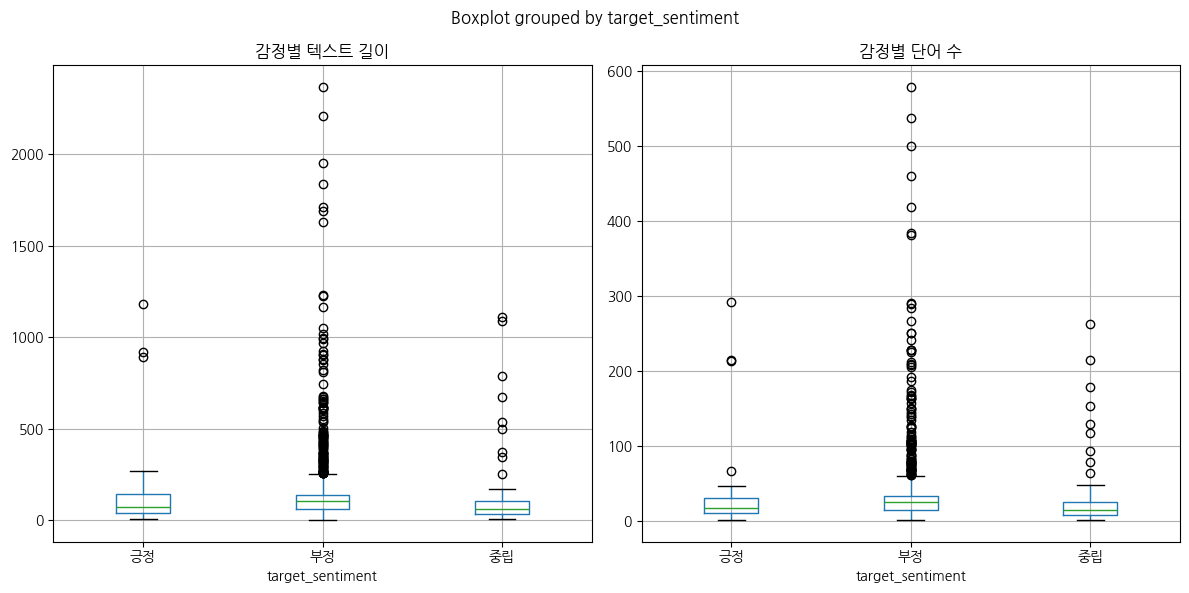

In [ ]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù
df['text_length'] = df['clean_text'].str.len()
df['word_count'] = df['clean_text'].str.split().str.len()

# Í∞êÏ†ïÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÎπÑÍµê
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='text_length', by='target_sentiment', ax=plt.gca())
plt.title('Í∞êÏ†ïÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥')

plt.subplot(1, 2, 2)
df.boxplot(column='word_count', by='target_sentiment', ax=plt.gca())
plt.title('Í∞êÏ†ïÎ≥Ñ Îã®Ïñ¥ Ïàò')
plt.tight_layout()
plt.show()

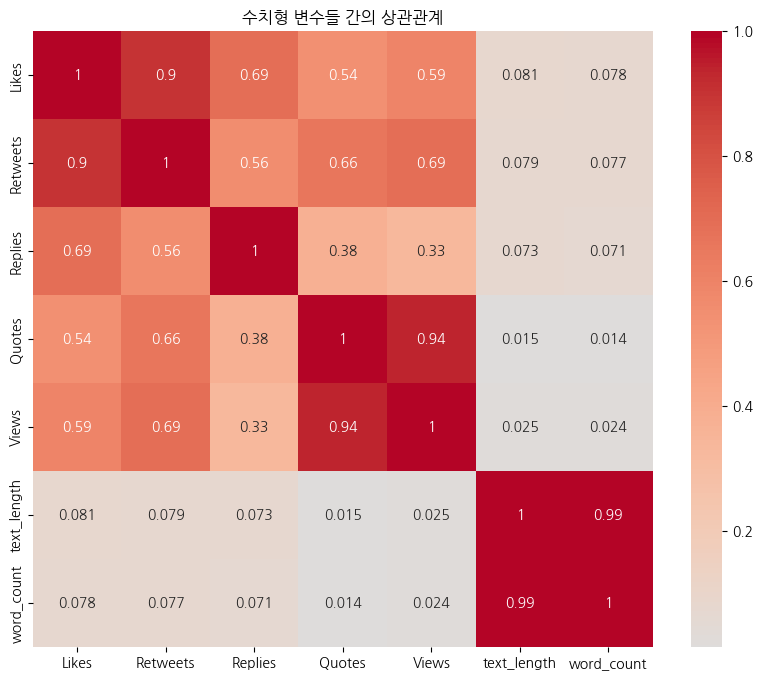

In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
numeric_cols = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views', 'text_length', 'word_count']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('ÏàòÏπòÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.show()

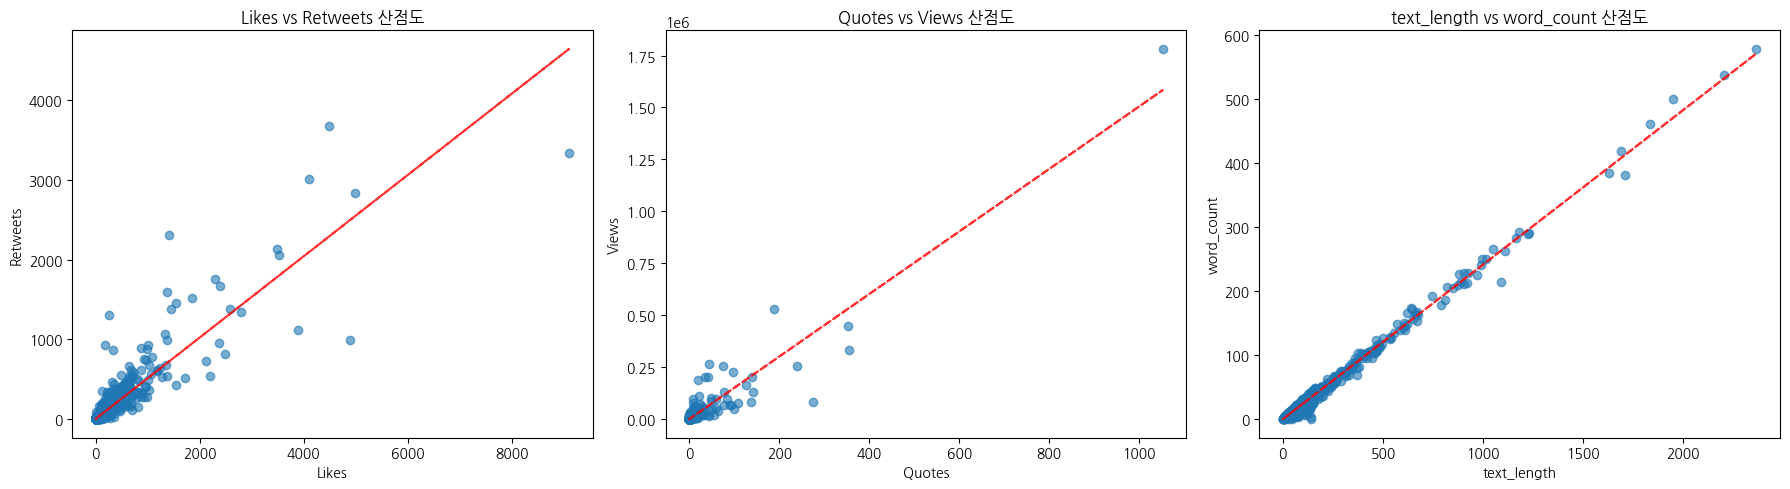

In [ ]:
# Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî Î≥ÄÏàò ÏåçÎì§Ïùò ÏÇ∞Ï†êÎèÑ
strong_corr_pairs = [
    ('Likes', 'Retweets'),
    ('Quotes', 'Views'),
    ('text_length', 'word_count')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (x, y) in enumerate(strong_corr_pairs):
    axes[i].scatter(df[x], df[y], alpha=0.6)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y} ÏÇ∞Ï†êÎèÑ')

    # ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x], p(df[x]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

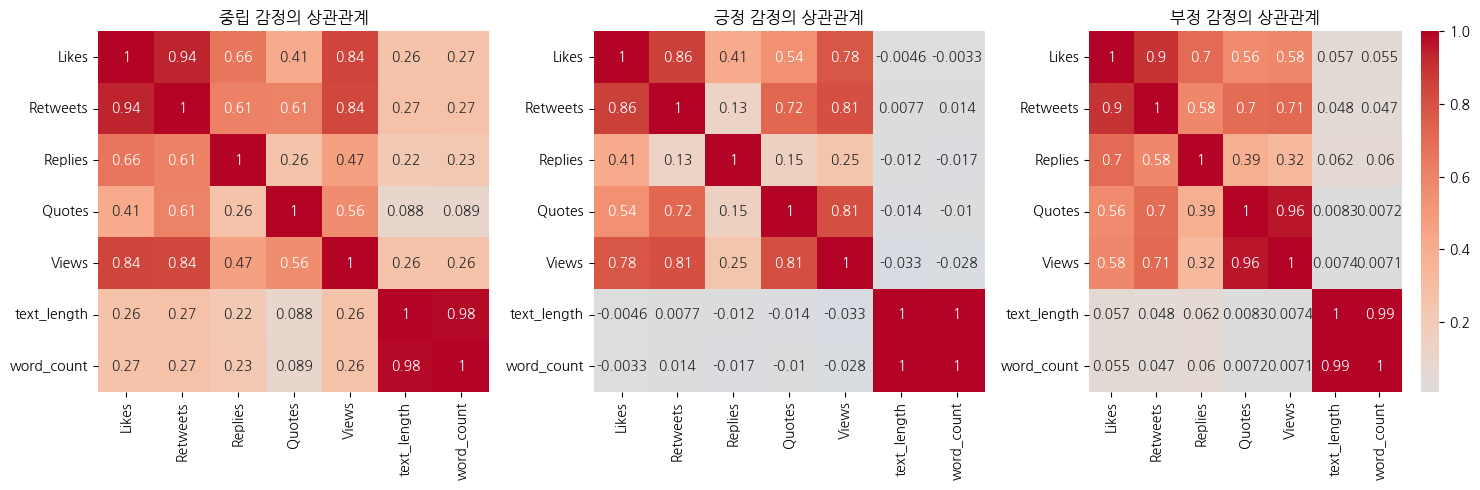

In [ ]:
# Í∞êÏ†ïÎ≥ÑÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Î∂ÑÏÑù
sentiments = df['target_sentiment'].unique()
fig, axes = plt.subplots(1, len(sentiments), figsize=(15, 5))

for i, sentiment in enumerate(sentiments):
    sentiment_data = df[df['target_sentiment'] == sentiment]
    corr_matrix = sentiment_data[numeric_cols].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                ax=axes[i], cbar=i==len(sentiments)-1)
    axes[i].set_title(f'{sentiment} Í∞êÏ†ïÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')

plt.tight_layout()
plt.show()


### Ï∞∏Ïó¨ÎèÑ Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ï∞∏Ïó¨ÎèÑ:
                          Likes     Retweets    Replies       Quotes  \
engagement_cluster                                                     
0                     28.613915    17.295797   0.693545     0.569877   
1                   4484.000000  3679.000000   0.000000  1052.000000   
2                   2545.538462  1433.346154  65.500000    95.730769   

                           Views  
engagement_cluster                
0                   1.137607e+03  
1                   1.781898e+06  
2                   1.538365e+05  


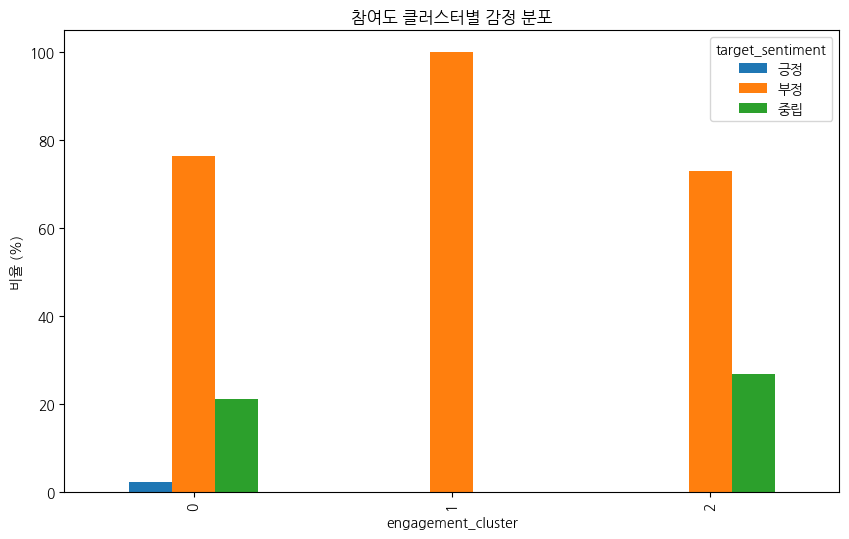

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ï∞∏Ïó¨ÎèÑ Î≥ÄÏàòÎì§Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
engagement_vars = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[engagement_vars])

# K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=3, random_state=42)
df['engagement_cluster'] = kmeans.fit_predict(scaled_data)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù
cluster_summary = df.groupby('engagement_cluster')[engagement_vars].mean()
print("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ï∞∏Ïó¨ÎèÑ:")
print(cluster_summary)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞êÏ†ï Î∂ÑÌè¨
cluster_sentiment = pd.crosstab(df['engagement_cluster'], df['target_sentiment'], normalize='index') * 100
cluster_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Ï∞∏Ïó¨ÎèÑ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞êÏ†ï Î∂ÑÌè¨')
plt.ylabel('ÎπÑÏú® (%)')
plt.show()


In [ ]:
# ÎÜíÏùÄ Ï∞∏Ïó¨ÎèÑÎ•º Î≥¥Ïù∏ Ìä∏ÏúóÎì§Ïùò ÌäπÏÑ± Î∂ÑÏÑù
df['total_engagement'] = df['Likes'] + df['Retweets'] + df['Replies'] + df['Quotes']
top_engagement = df.nlargest(20, 'total_engagement')

print("Í≥†Ï∞∏Ïó¨ÎèÑ Ìä∏ÏúóÏùò Í∞êÏ†ï Î∂ÑÌè¨:")
print(top_engagement['target_sentiment'].value_counts())

print("\nÍ≥†Ï∞∏Ïó¨ÎèÑ Ìä∏ÏúóÏùò Í∏∞Í∞ÑÎ≥Ñ Î∂ÑÌè¨:")
print(top_engagement['period'].value_counts())

Í≥†Ï∞∏Ïó¨ÎèÑ Ìä∏ÏúóÏùò Í∞êÏ†ï Î∂ÑÌè¨:
target_sentiment
Î∂ÄÏ†ï    16
Ï§ëÎ¶Ω     4
Name: count, dtype: int64

Í≥†Ï∞∏Ïó¨ÎèÑ Ìä∏ÏúóÏùò Í∏∞Í∞ÑÎ≥Ñ Î∂ÑÌè¨:
period
ÎåÄÏÑ†ÌÜ†Î°† Ïù¥ÌõÑ ~ Î≥∏Ìà¨Ìëú       8
Ïú§ÎåÄÌÜµÎ†π ÌååÎ©¥ ~ ÏÑ†Í±∞Ïö¥Îèô Ï†Ñ    7
ÏÑ†Í±∞Ïö¥Îèô ~ ÎåÄÏÑ†ÌÜ†Î°†         4
Î≥∏Ìà¨Ìëú Ïù¥ÌõÑ              1
Name: count, dtype: int64
